# Analysis for Differential Jet Mass in Z+Jets events with NanoAODv9

In [1]:
import awkward as ak
import numpy as np
import time
import coffea
import uproot
import hist
import vector
print("awkward version ", ak.__version__)
print("coffea version ", coffea.__version__)
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle
from distributed.diagnostics.plugin import UploadDirectory
import os

awkward version  1.10.2
coffea version  0.7.20


### Automatically reload any modules used

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from smp_utils import *
from response_maker_nanov9_lib import *
from response_maker_nanov9 import *

In [4]:
from dask.distributed import Client

client = Client("tls://rappoccio-40gmail-2ecom.dask.cmsaf-prod.flatiron.hollandhpc.org:8786")
client

/opt/conda/lib/python3.8/site-packages/distributed/client.py:1288: VersionMismatchWarning: Mismatched versions found

+---------+----------------+----------------+----------------+
| Package | client         | scheduler      | workers        |
+---------+----------------+----------------+----------------+
| python  | 3.8.16.final.0 | 3.8.16.final.0 | 3.8.15.final.0 |
+---------+----------------+----------------+----------------+
  warnings.warn(version_module.VersionMismatchWarning(msg[0]["warning"]))


<Client: 'tls://192.168.187.10:8786' processes=2 threads=4, memory=12.72 GiB>

In [5]:
client.register_worker_plugin(UploadDirectory("/home/cms-jovyan/QJetMassUproot", restart=True, update_path=True), nanny=True)
print(client.run(os.listdir, "dask-worker-space") )

OSError: Timed out trying to connect to tls://172.19.0.3:37955 after 30 s

### If desired, uncomment these to move or remove old pkl files

In [ ]:
#! mv qjetmass_zjets_gen.pkl qjetmass_zjets_gen_old.pkl
#! mv qjetmass_zjets_reco.pkl qjetmass_zjets_reco_old.pkl

In [ ]:
#f = uproot.open('/mnt/data/cms/store/data/Run2018A/SingleMuon/NANOAOD/UL2018_MiniAODv2_NanoAODv9_GT36-v1/2820000/FF8A3CD2-3F51-7A43-B56C-7F7B7B3158E3.root')

### If you want to rerun, here is the line. Otherwise keep it commented to just read the pkl file. 

In [6]:
#response_maker_nanov9(testing=False, do_gen=False, client=None, prependstr="/mnt/data/cms")
response_maker_nanov9(testing=False, do_gen=True, client=client)

In [49]:
response_maker_nanov9(testing=False, do_gen=False, client=client)

OSError: XRootD error: [FATAL] Hand shake failed
in file root://xcache//store/data/Run2017F/SingleMuon/NANOAOD/UL2017_MiniAODv2_NanoAODv9-v1/70000/F1DADF35-E4FE-0549-B061-AA63FE0AE9BF.root

In [50]:
f = uproot.open("root://xcache//store/data/Run2017F/SingleMuon/NANOAOD/UL2017_MiniAODv2_NanoAODv9-v1/70000/F1DADF35-E4FE-0549-B061-AA63FE0AE9BF.root")

In [51]:
f["Events"]

<TTree 'Events' (1654 branches) at 0x7f8d77a179a0>

### Open pkl file for the output histograms

In [7]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output = pickle.load( f )

In [8]:
output.keys()

dict_keys(['njet_gen', 'njet_reco', 'ptjet_gen_pre', 'ptjet_mjet_u_gen', 'ptjet_mjet_u_reco', 'ptjet_mjet_g_gen', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow'])

In [9]:
output["cutflow"]

{'UL16NanoAODv9': defaultdict(int,
             {'all events': 23823046,
              'weights cut': 23045806,
              'oneGenJet': 15021673,
              'twoGen_ee': 2187514,
              'twoGen_mm': 3417407,
              'twoGen_leptons': 5604747,
              'z_gen_pt': 3819241,
              'z_gen_jet_dphi': 13231248,
              'z_pt_asym_gen_sel': 5006876,
              'all_gen_cuts': 1644951,
              'twoReco_ee': 1180055,
              'twoReco_mm': 2332846,
              'twoReco_leptons': 3501253,
              'z_reco_pt': 2279901,
              'oneRecoJet': 11865698,
              'jet_genjet_matching_cuts': 11861834,
              'reco_preselection': 617369,
              'z_dphi_reco_sel': 6956212,
              'z_pt_asym_reco_sel': 1788014,
              'final_selection': 577125}),
 'UL18NanoAODv9': defaultdict(int,
             {'all events': 74875817,
              'weights cut': 72520598,
              'oneGenJet': 46931688,
              

In [10]:
datasets = list( output["cutflow"].keys() )

In [11]:
histnames = output.keys()

In [12]:
print(histnames)

dict_keys(['njet_gen', 'njet_reco', 'ptjet_gen_pre', 'ptjet_mjet_u_gen', 'ptjet_mjet_u_reco', 'ptjet_mjet_g_gen', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow'])


### Normalize all of the histograms to the sum of the number of events

In [13]:
for ihist,ihistname in enumerate(histnames):
    if ihistname == "cutflow" : continue
    #print(ihist)
    #print(ihistname)
    for i,dataset in enumerate(datasets) :
        #print(i)
        #print(dataset)
        if np.sum(output[ihistname].values(flow=True)) > 0:
            output[ihistname].view(flow=True)[i] /= output["cutflow"][dataset]['all events']

# Make plots

In [14]:
import matplotlib.pyplot as plt

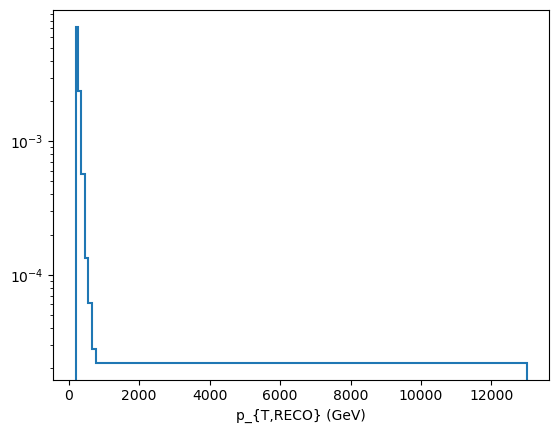

In [15]:
output['ptjet_mjet_u_gen'].project("ptgen").plot(density=True)
plt.yscale("log")
plt.show()

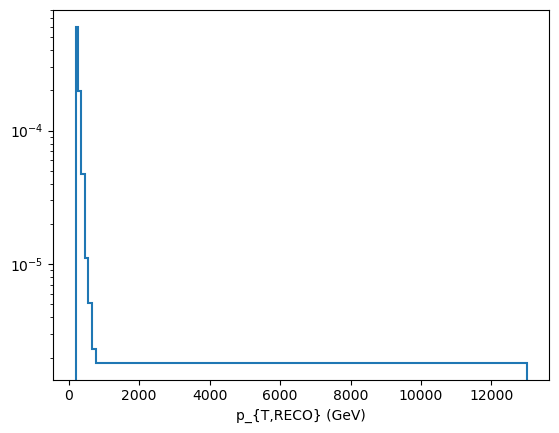

In [16]:
output['ptjet_mjet_u_gen'].project("ptgen").plot()
plt.yscale("log")
plt.show()

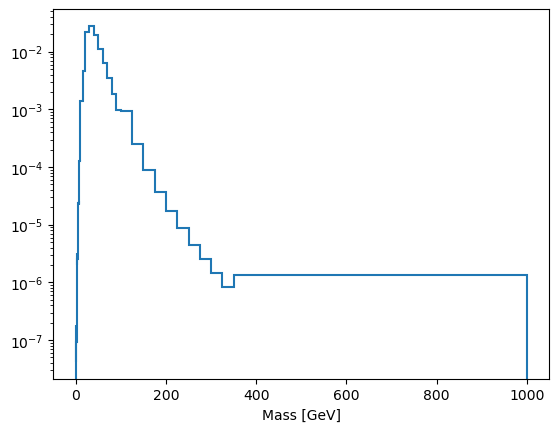

In [17]:
output['ptjet_mjet_u_gen'].project("mgen").plot(density=True)
plt.yscale("log")
plt.show()

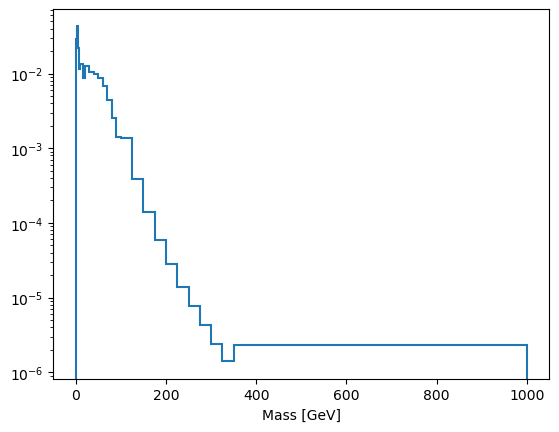

In [18]:
output['ptjet_mjet_g_gen'].project("mgen").plot(density=True)
plt.yscale("log")
plt.show()

In [19]:
response_matrix_u_values = output['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
response_matrix_g_values = output['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()

In [20]:
nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape
response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

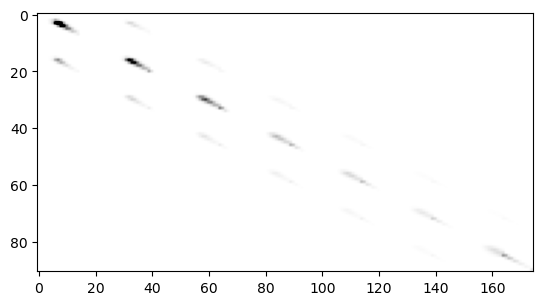

In [21]:
plt.imshow( np.log(response_matrix_u_final+1), vmax=1e-3, aspect="equal", cmap="binary" )

In [22]:
response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )

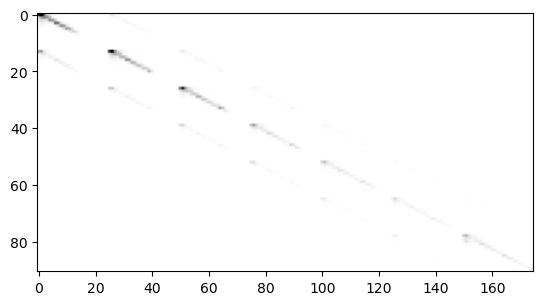

In [23]:
plt.imshow( np.log(response_matrix_g_final+1), vmax=1e-3, aspect="equal", cmap="binary" )

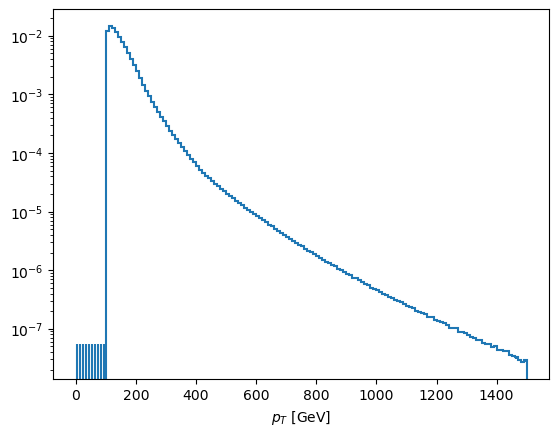

In [24]:
output['ptjet_gen_pre'].project("pt").plot(density=True)
plt.yscale("log")
plt.show()

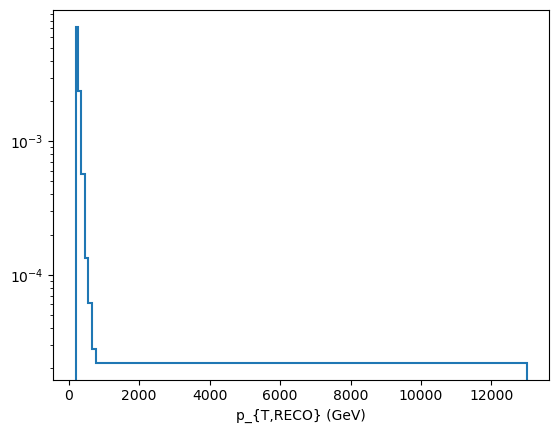

In [25]:
output['ptjet_mjet_u_gen'].project("ptgen").plot(density=True)
plt.yscale("log")
plt.show()

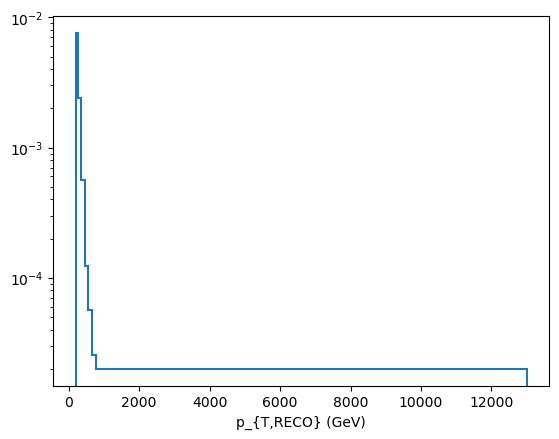

In [26]:
output['ptjet_mjet_u_reco'].project("ptreco").plot(density=True)
plt.yscale("log")
plt.show()

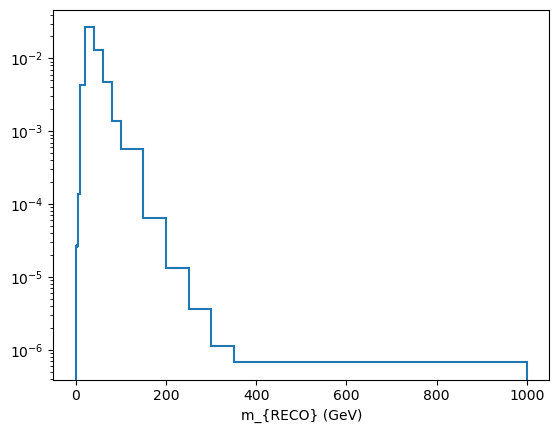

In [27]:
output['ptjet_mjet_u_reco'].project("mreco").plot(density=True)
plt.yscale("log")
plt.show()

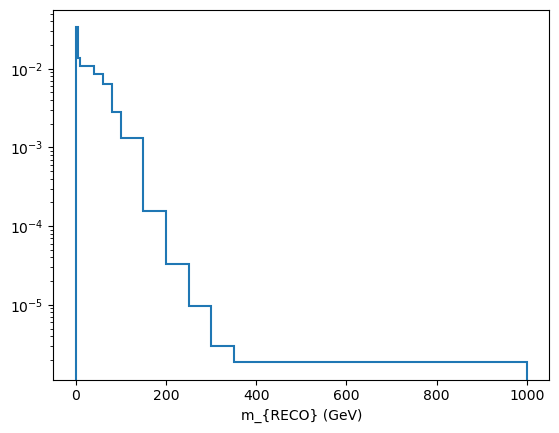

In [28]:
output['ptjet_mjet_g_reco'].project("mreco").plot(density=True)
plt.yscale("log")
plt.show()

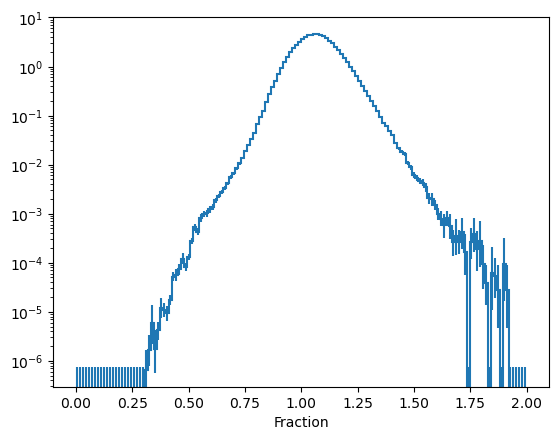

In [29]:
output['ptjet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

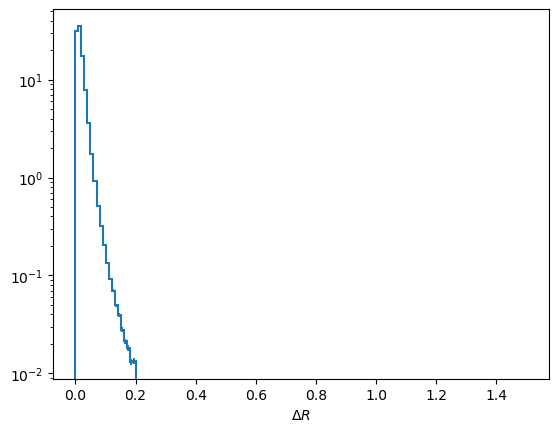

In [30]:
output['drjet_reco_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

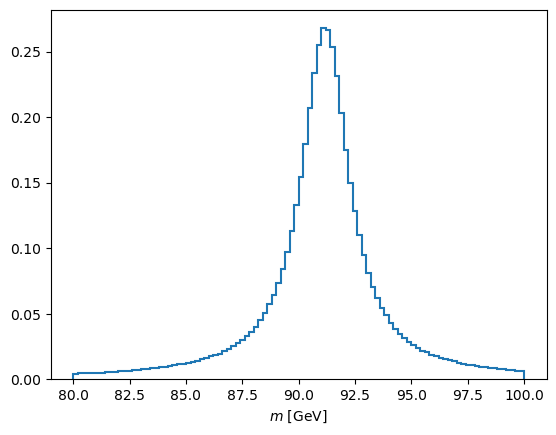

In [31]:
output['mz_gen'].project("mass").plot(density=True)
#plt.yscale("log")
plt.show()

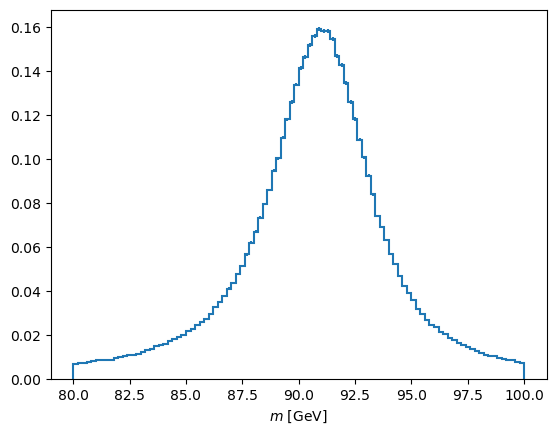

In [32]:
output['mz_reco'].project("mass").plot(density=True)
#plt.yscale("log")
plt.show()

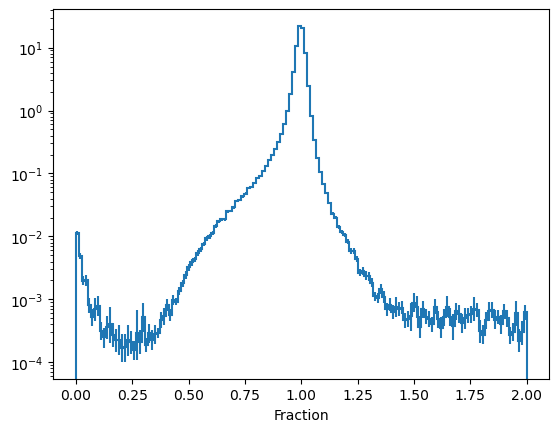

In [33]:
output['mz_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

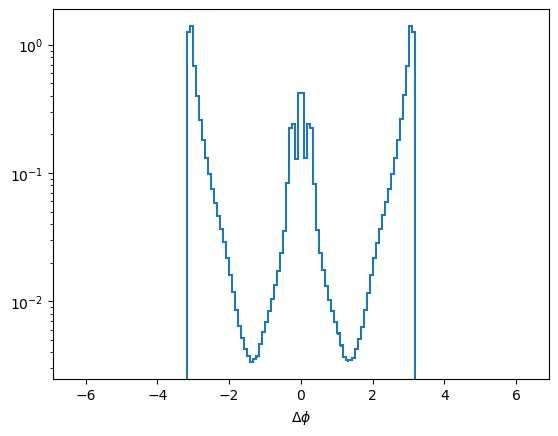

In [34]:
output['dphi_z_jet_gen'].project("dphi").plot(density=True)
plt.yscale("log")
plt.show()

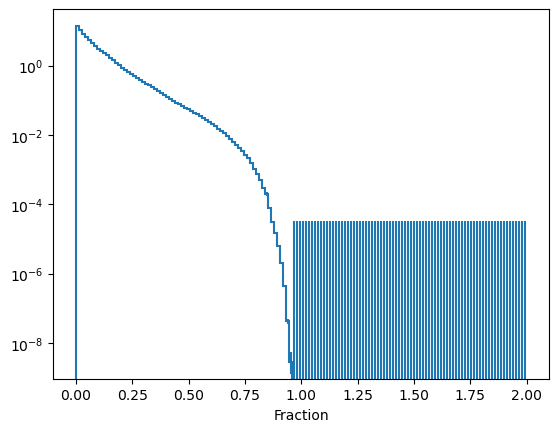

In [35]:
output['ptasym_z_jet_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

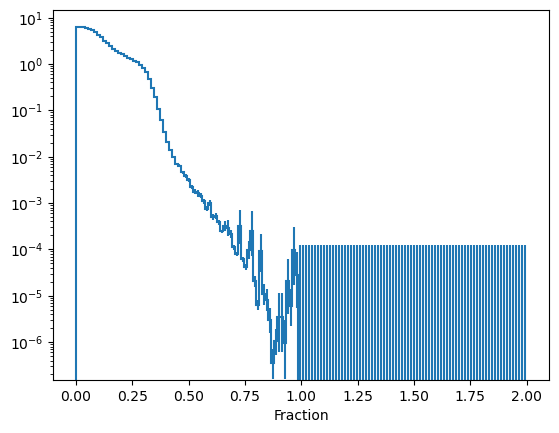

In [36]:
output['ptasym_z_jet_reco'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

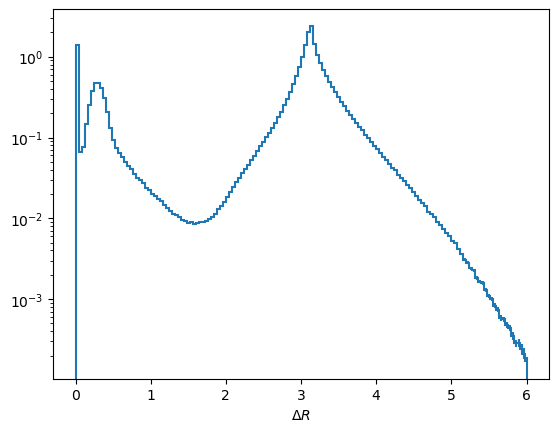

In [37]:
output['dr_z_jet_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

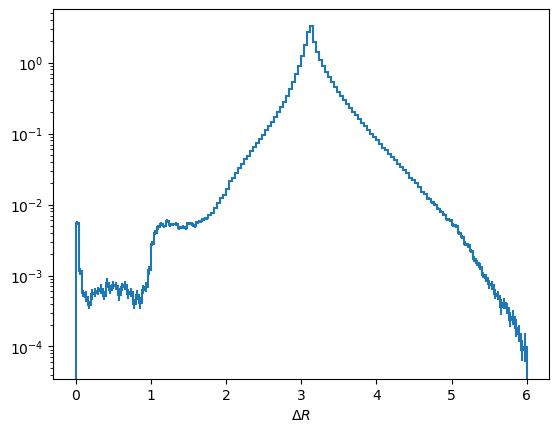

In [38]:
output['dr_z_jet_reco'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

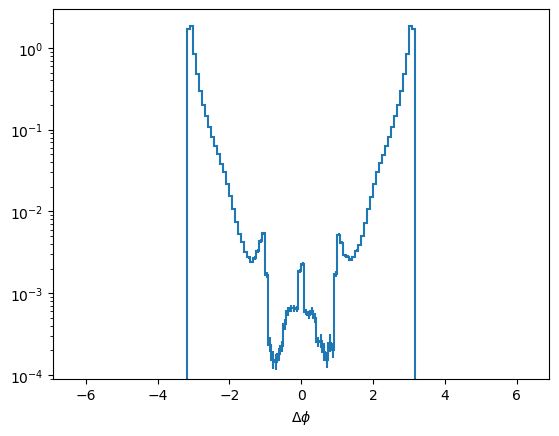

In [39]:
output['dphi_z_jet_reco'].project("dphi").plot(density=True)
plt.yscale("log")
plt.show()

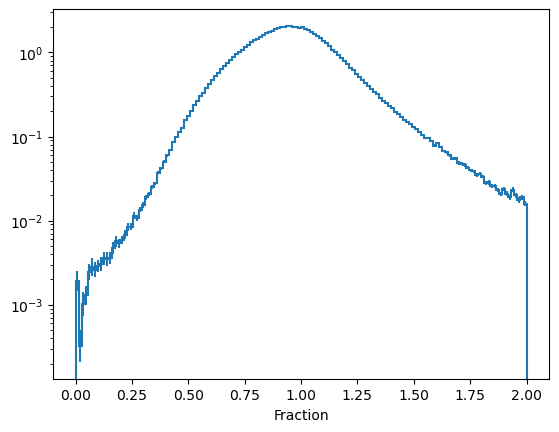

In [40]:
output['m_u_jet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

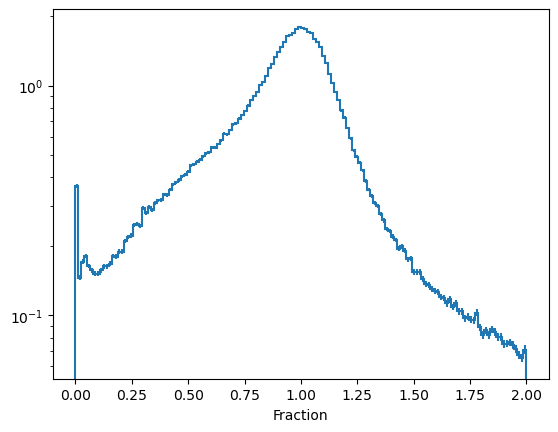

In [41]:
output['m_g_jet_reco_over_gen'].project("frac").plot(density=True)
plt.yscale("log")
plt.show()

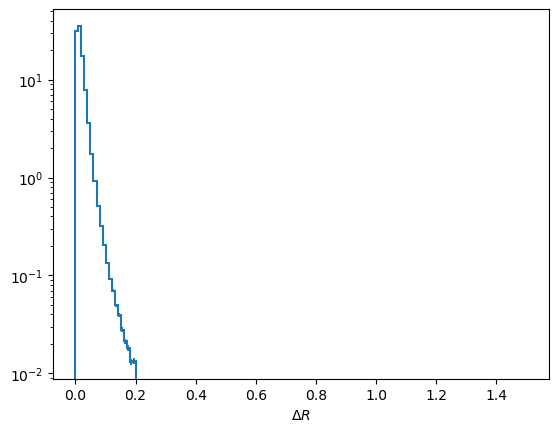

In [42]:
output['drjet_reco_gen'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

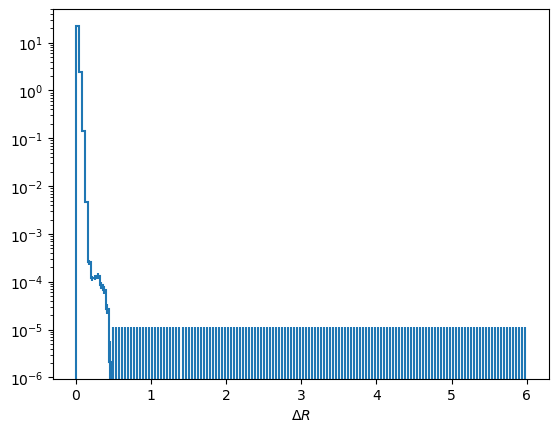

In [43]:
output['dr_gen_subjet'].project("dr").plot(density=True)
plt.yscale("log")
plt.show()

In [44]:
resolutions_u = output['m_u_jet_reco_over_gen'].project("ptgen", "mgen", "frac")
resolutions_g = output['m_g_jet_reco_over_gen'].project("ptgen", "mgen", "frac")

In [45]:
nptbins,nmassbins,nfracbins = resolutions_u.shape

In [46]:
ptvals = resolutions_u.axes['ptgen']
mvals = resolutions_u.axes['mgen']

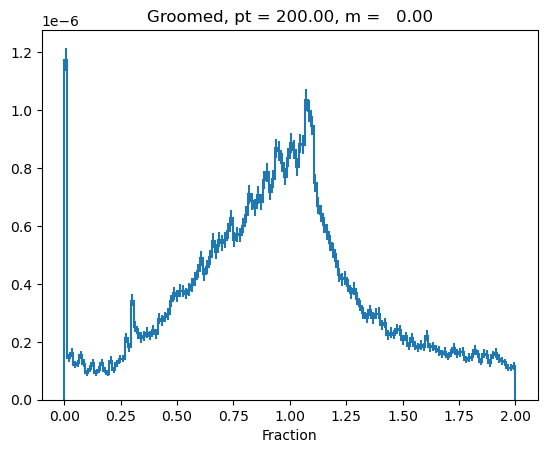

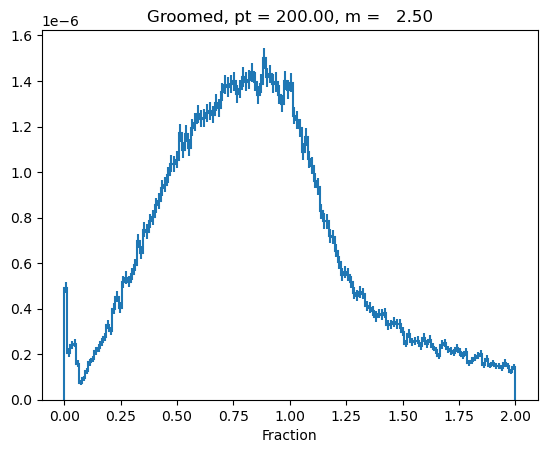

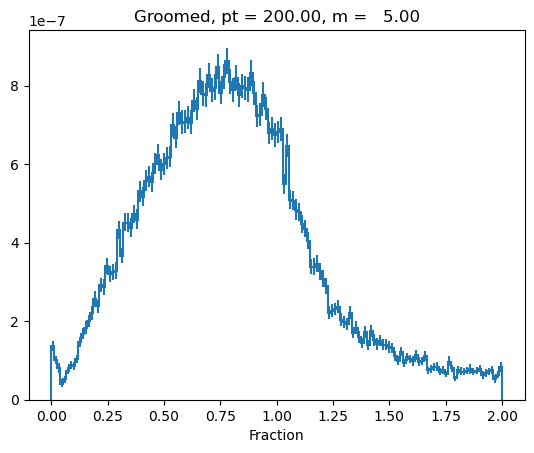

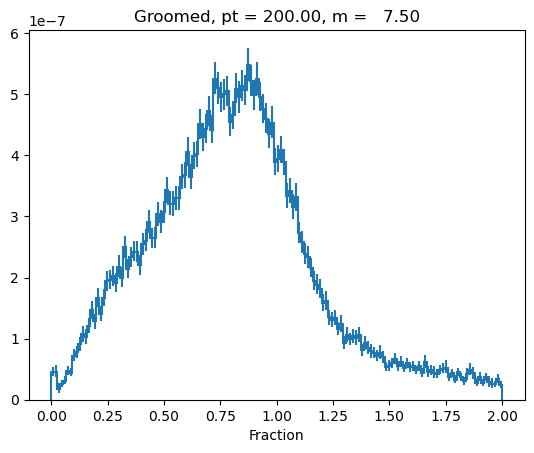

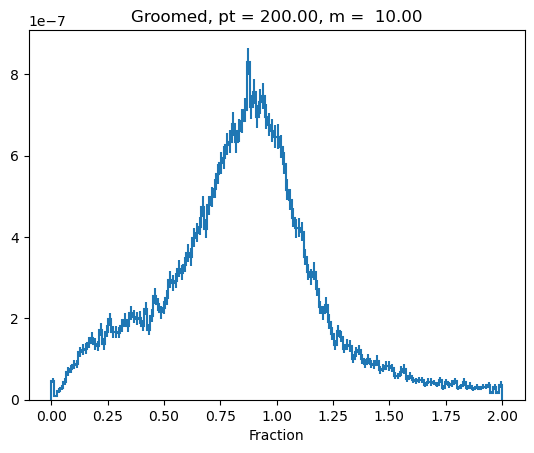

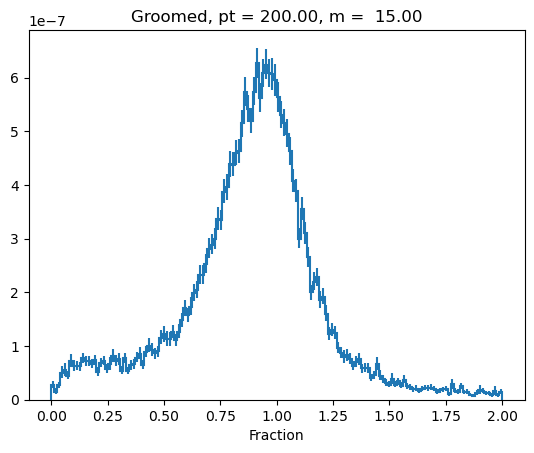

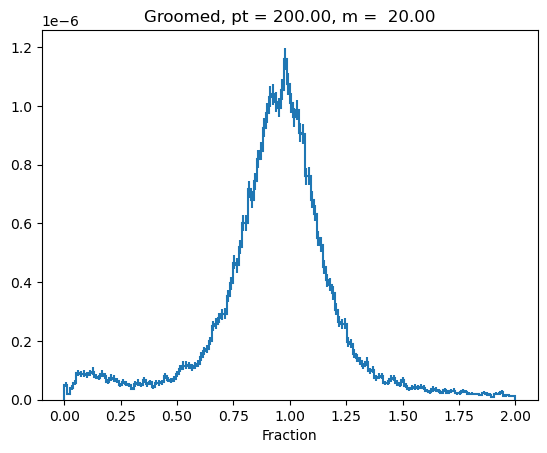

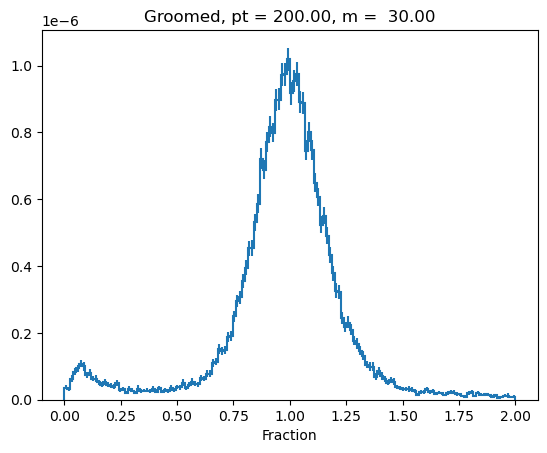

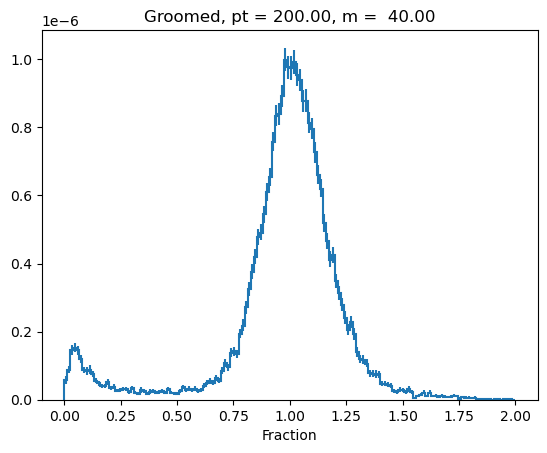

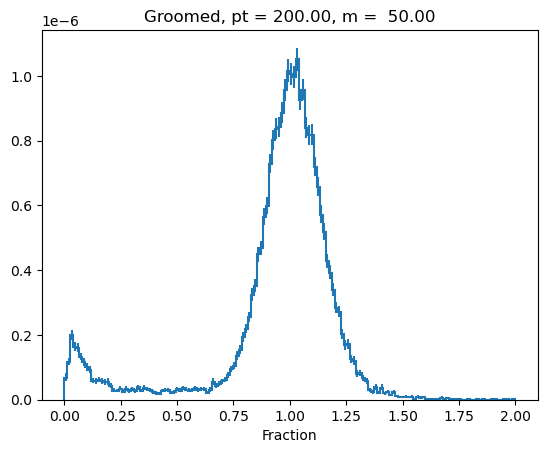

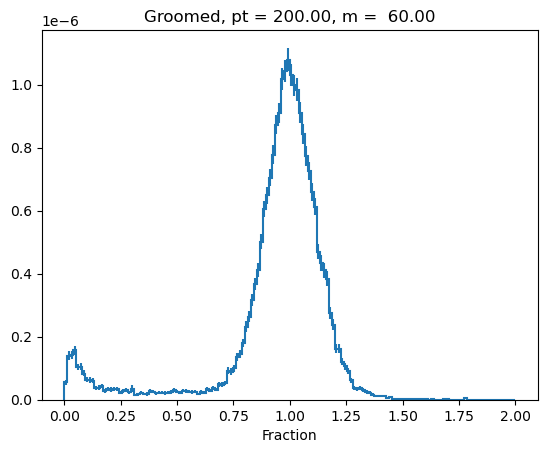

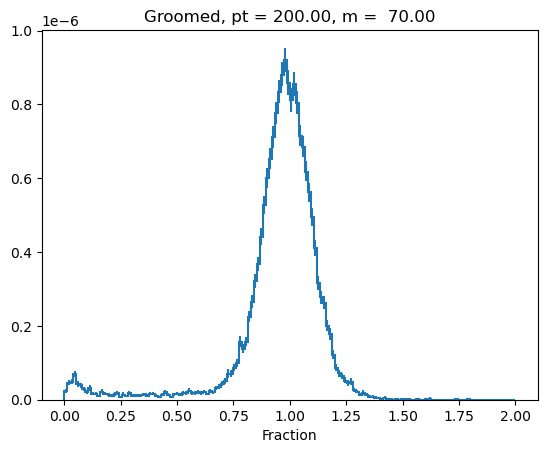

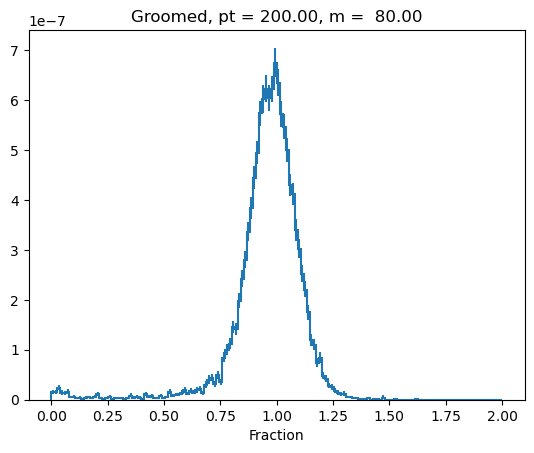

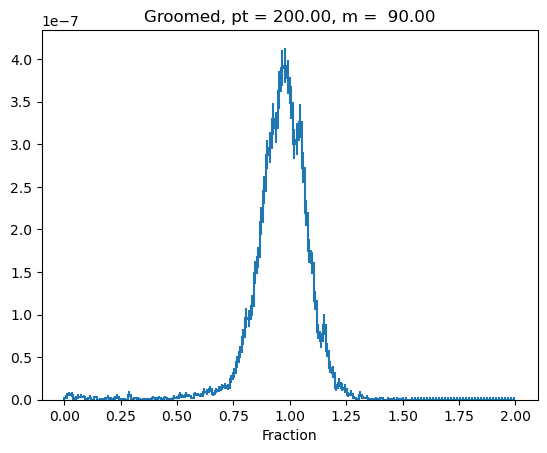

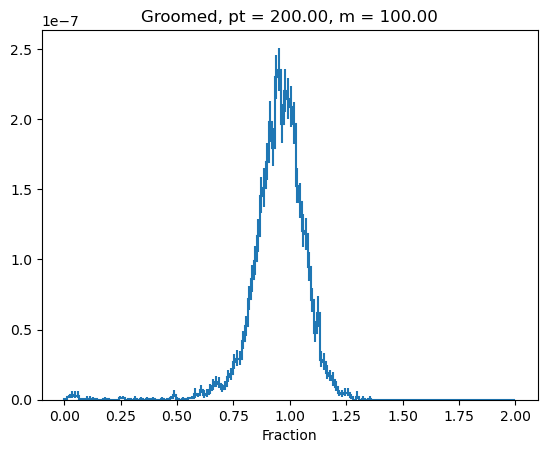

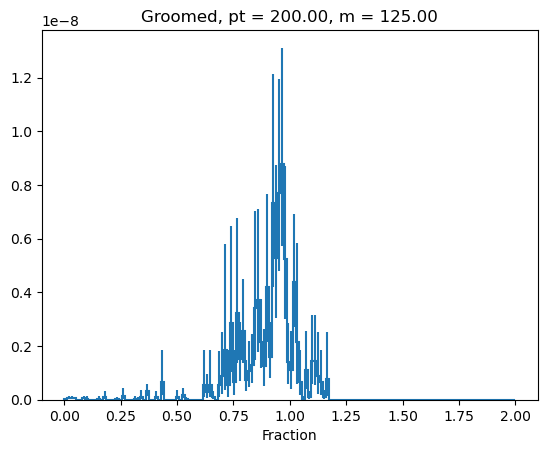

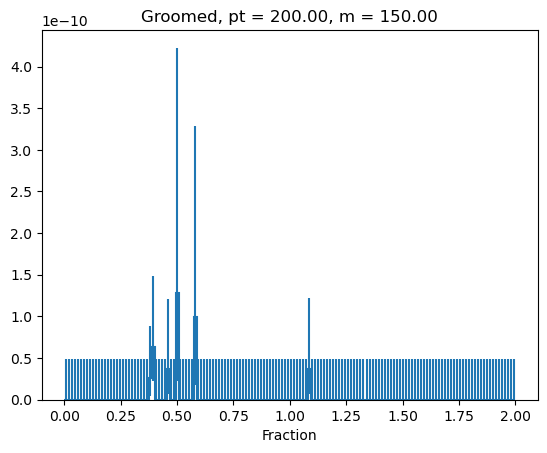

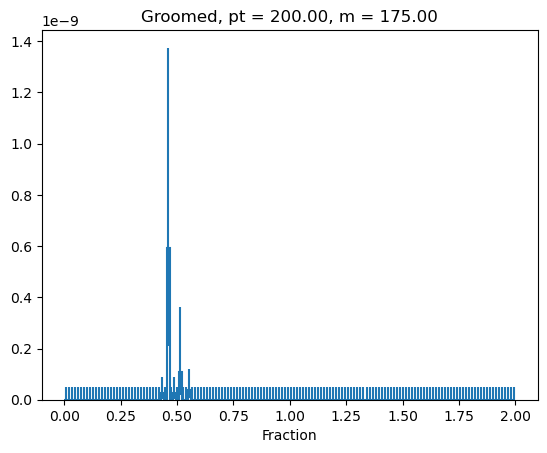

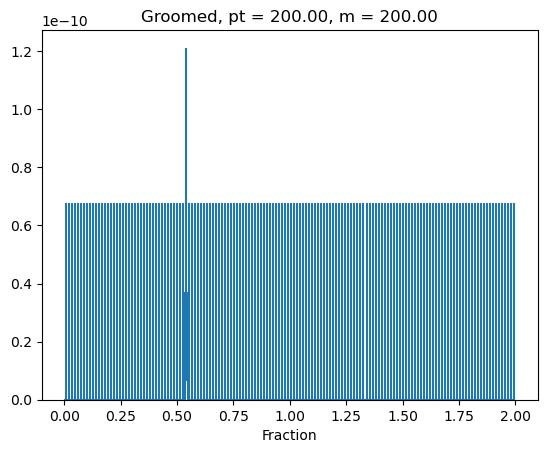

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


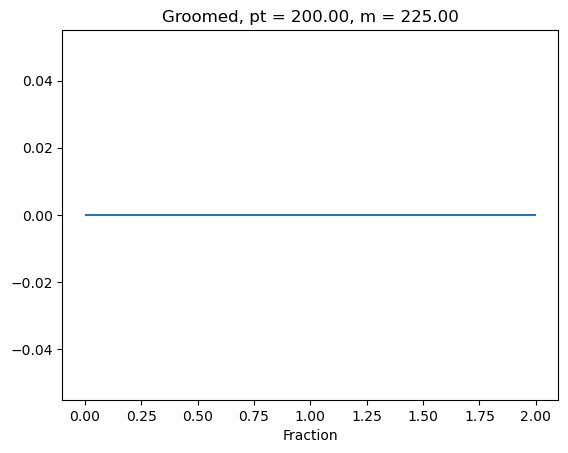

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


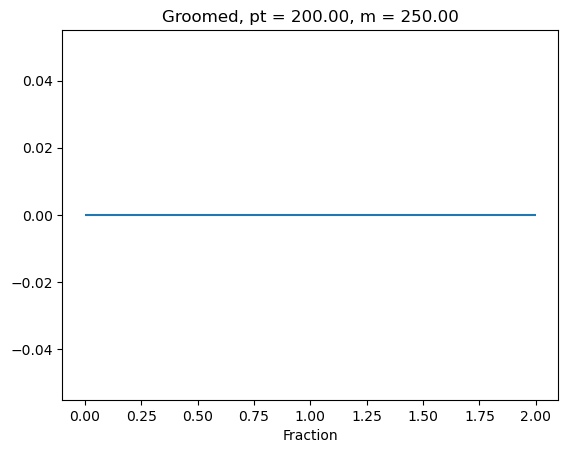

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


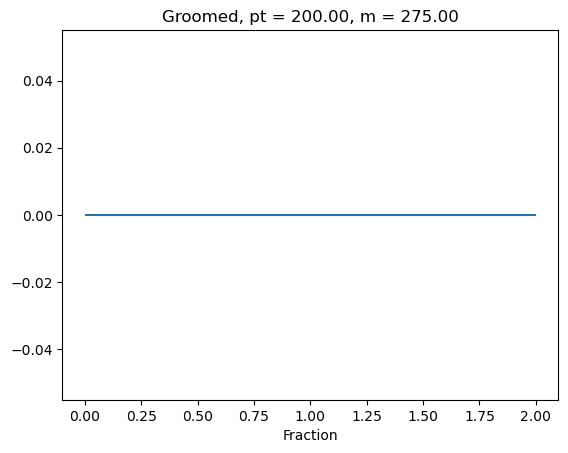

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


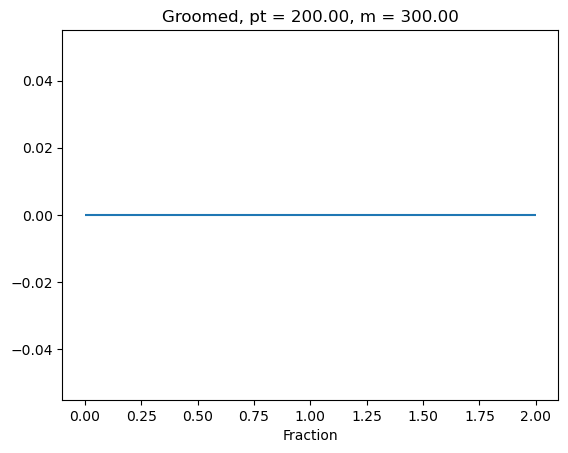

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


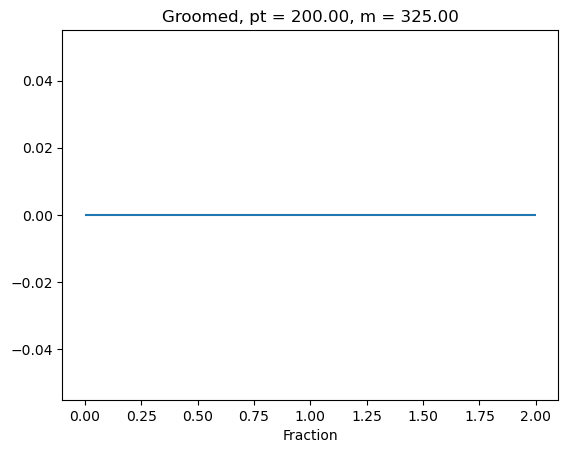

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


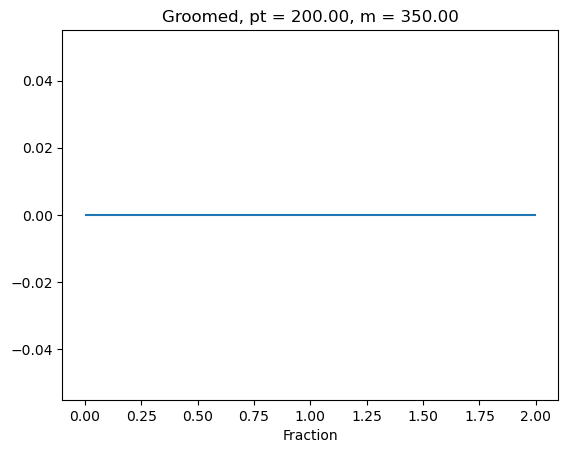

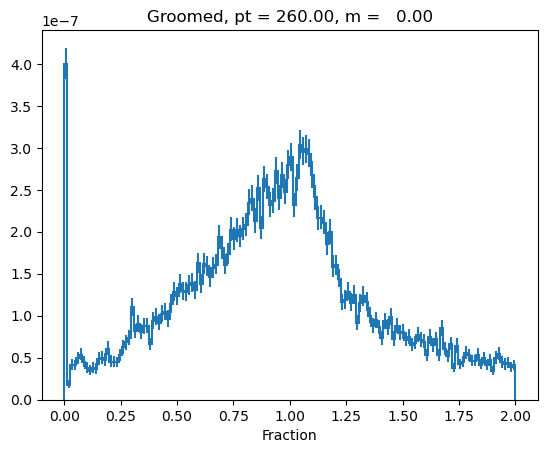

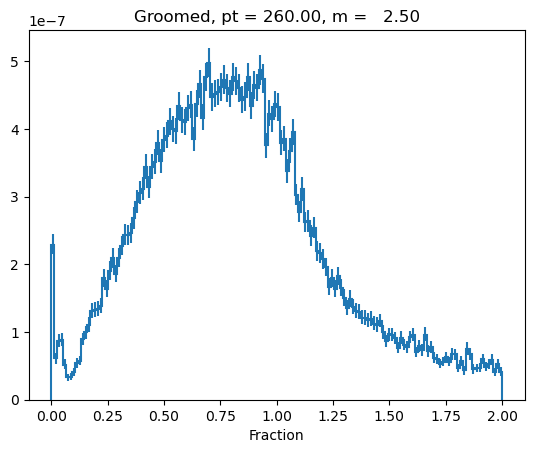

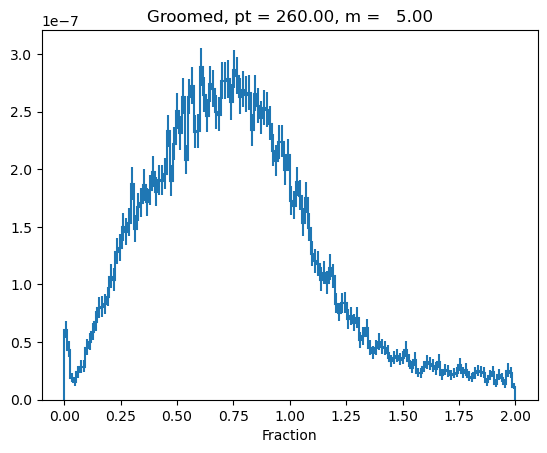

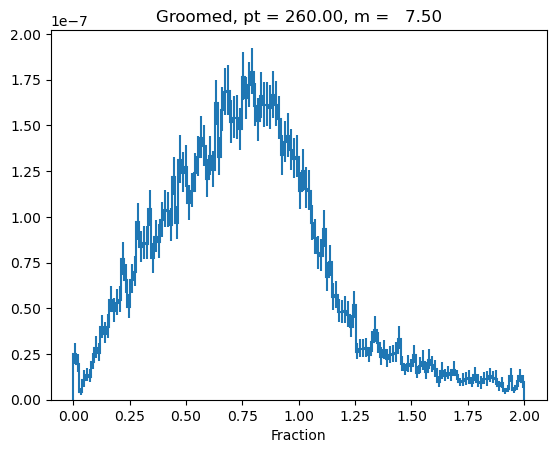

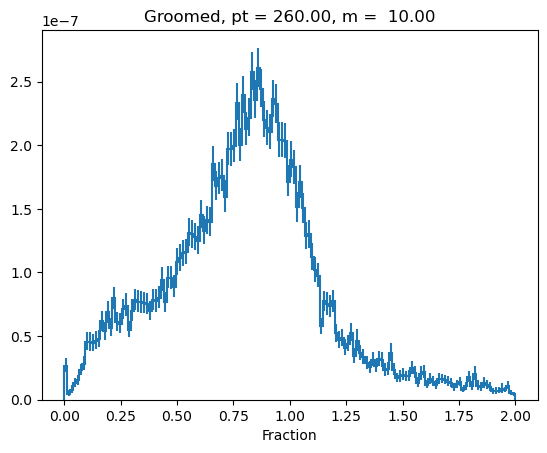

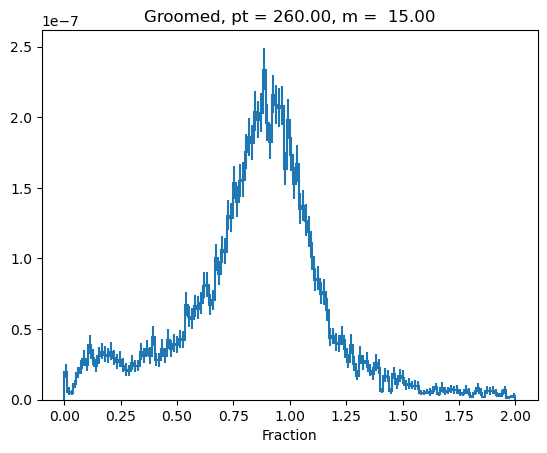

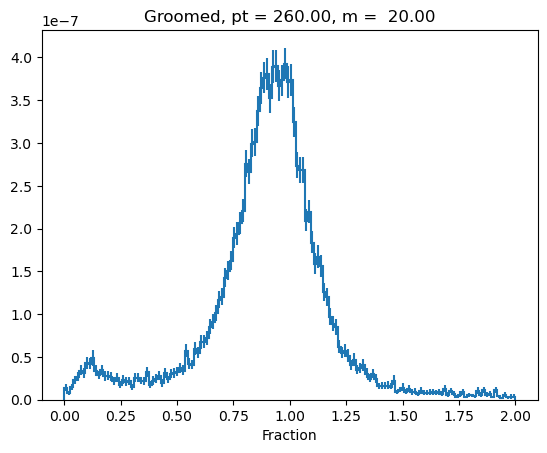

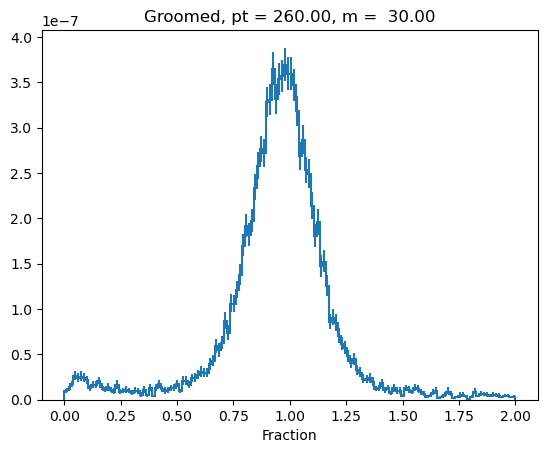

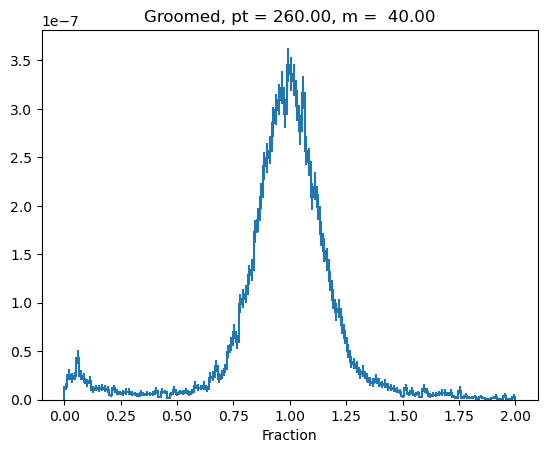

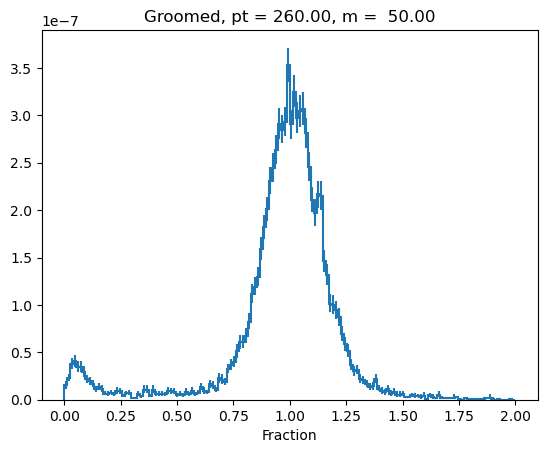

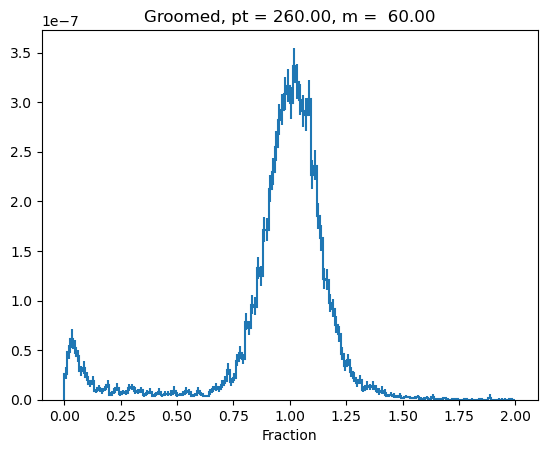

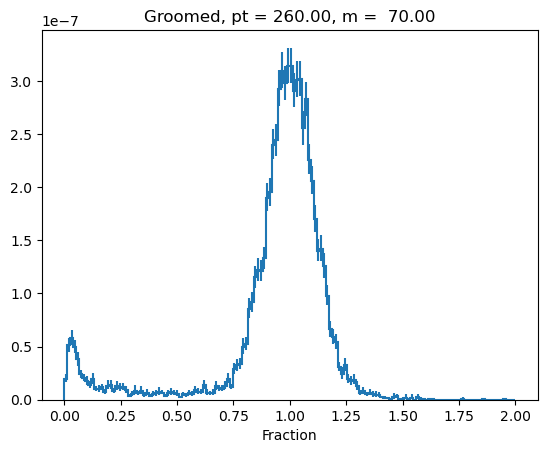

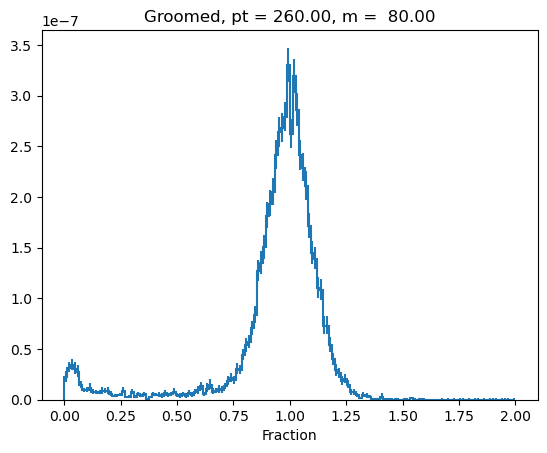

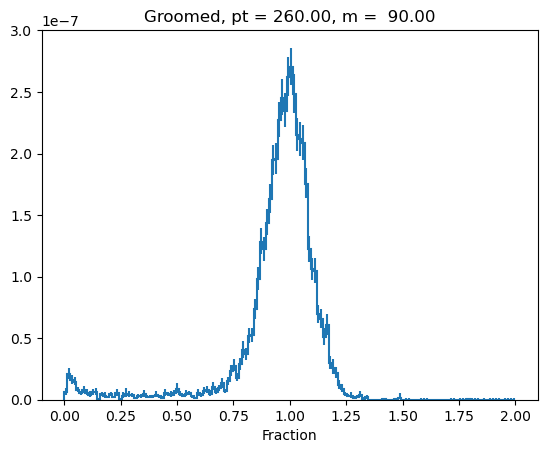

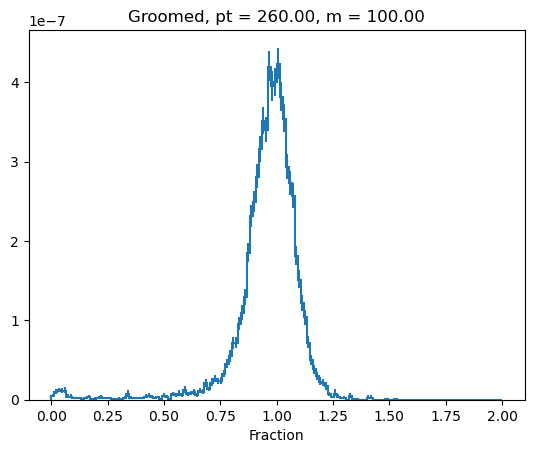

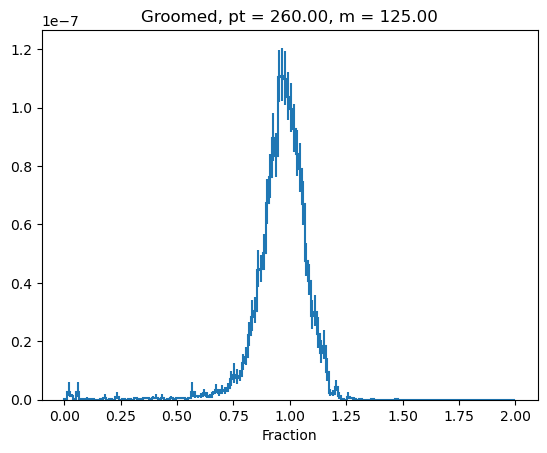

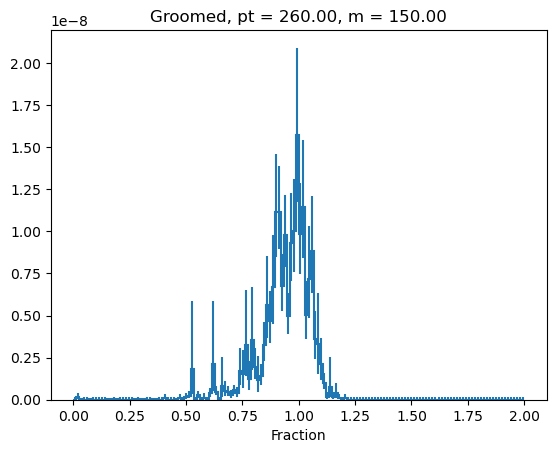

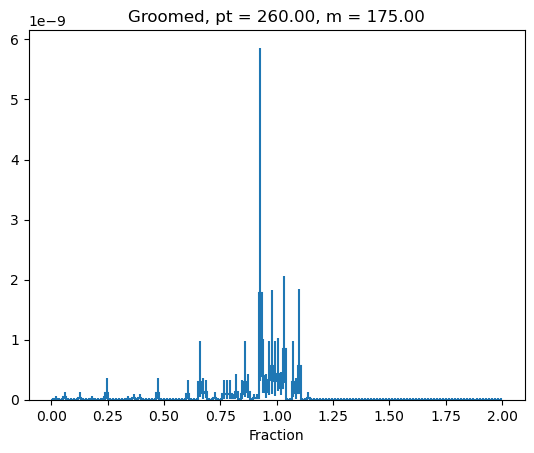

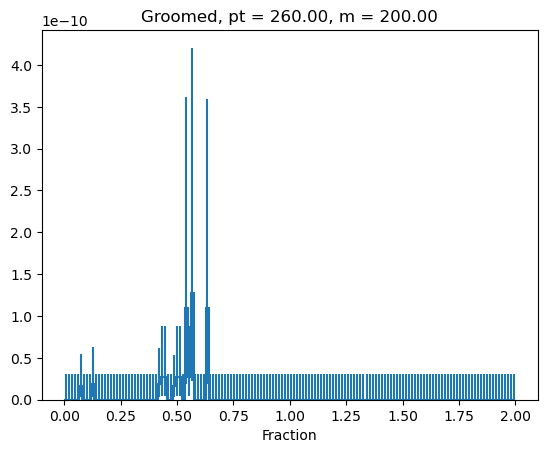

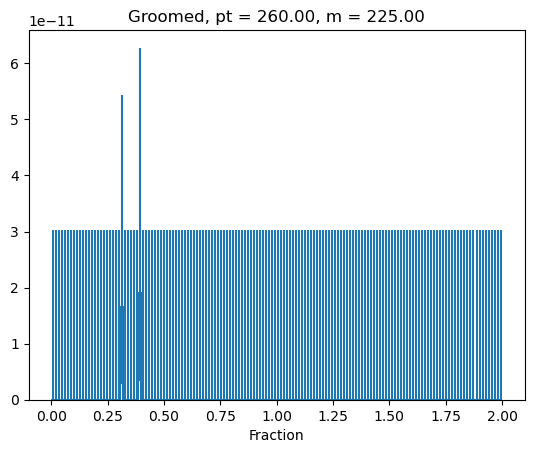

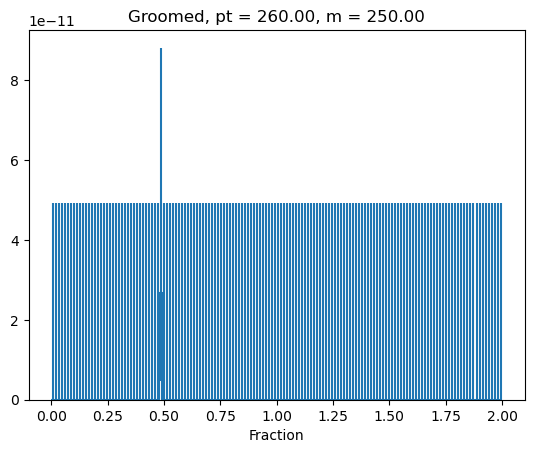

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


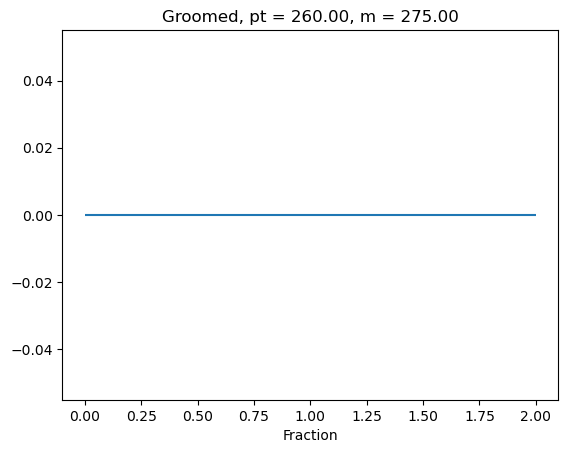

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


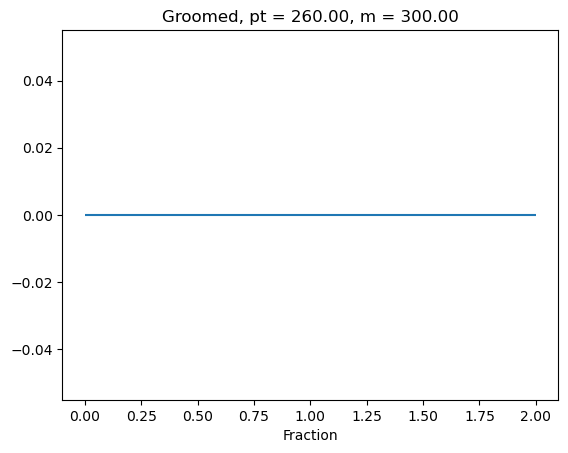

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


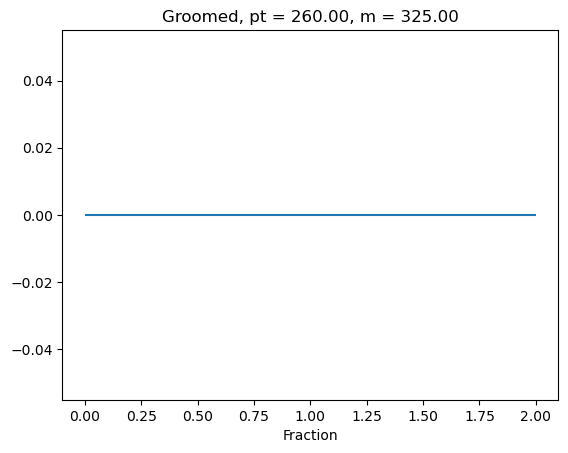

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


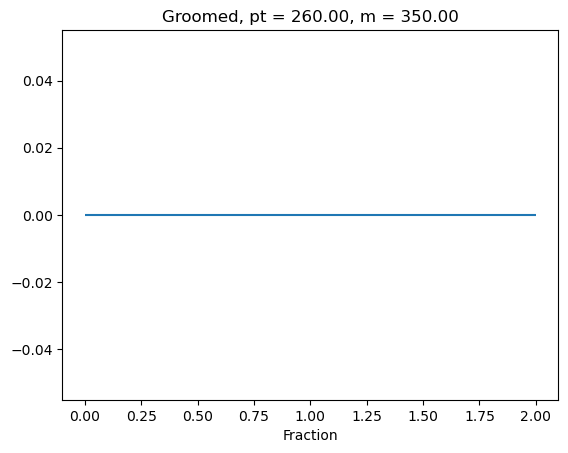

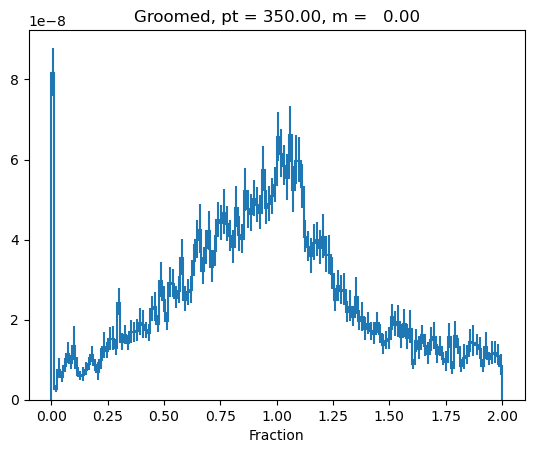

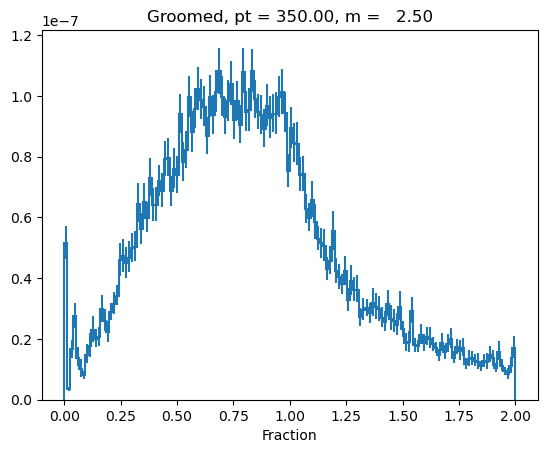

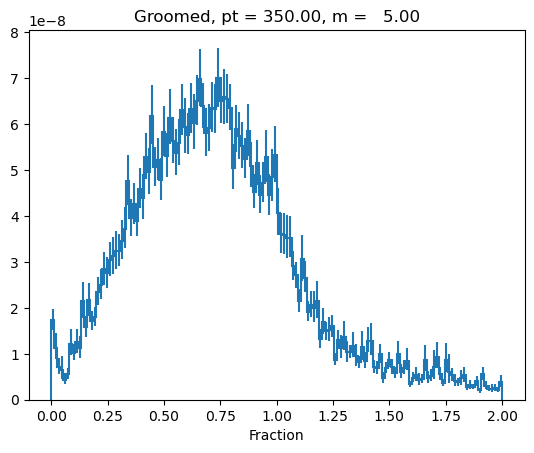

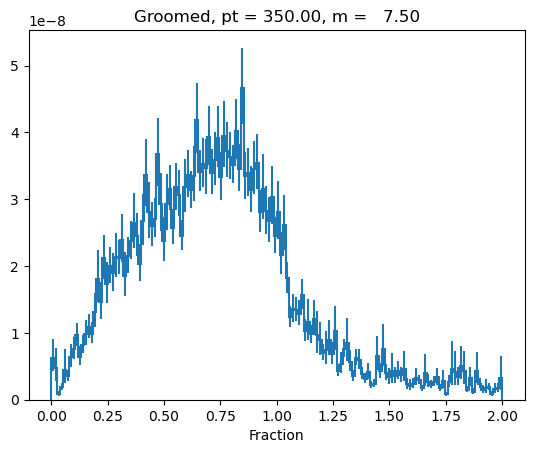

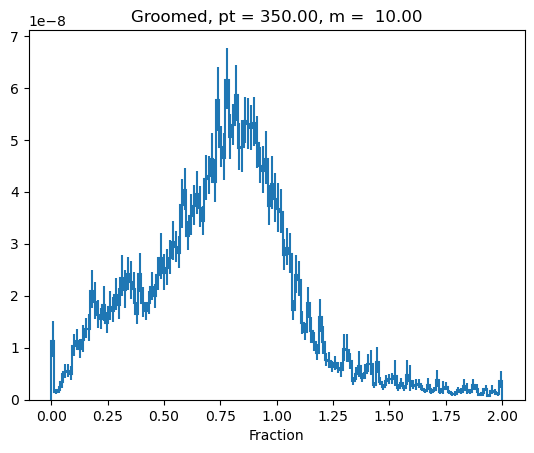

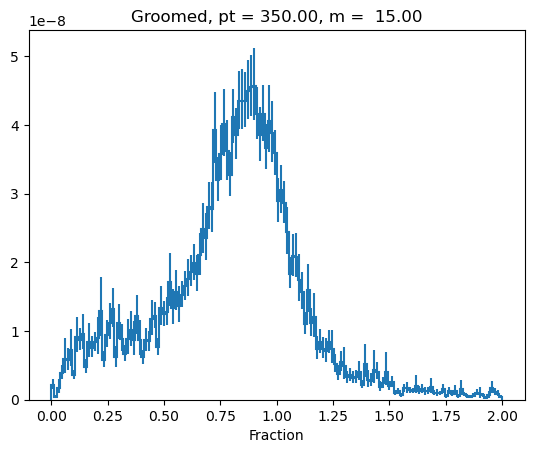

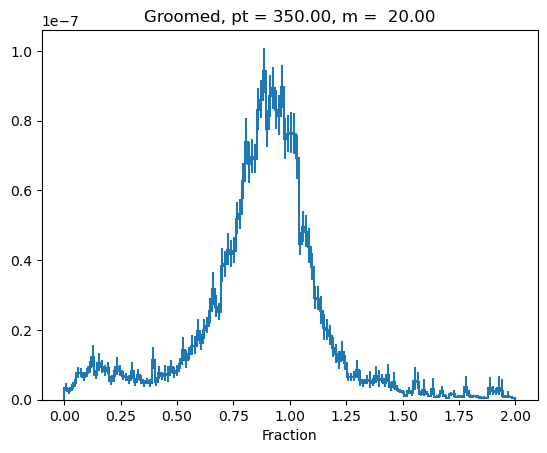

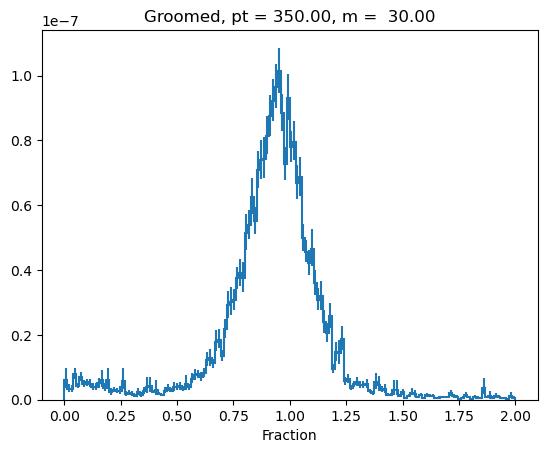

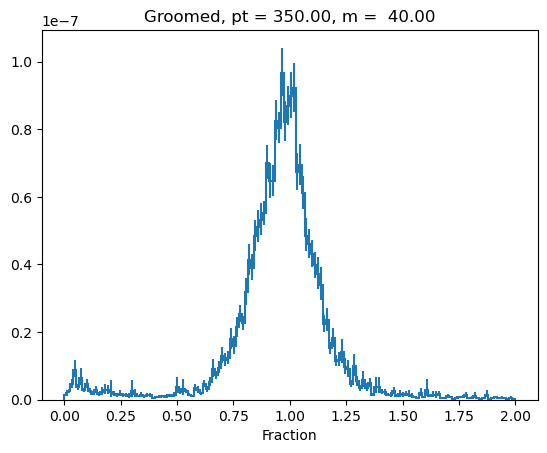

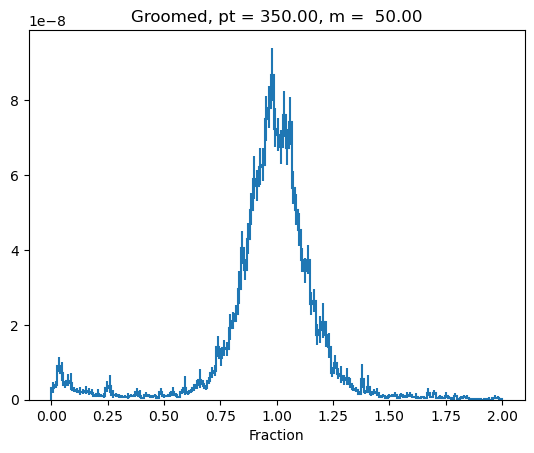

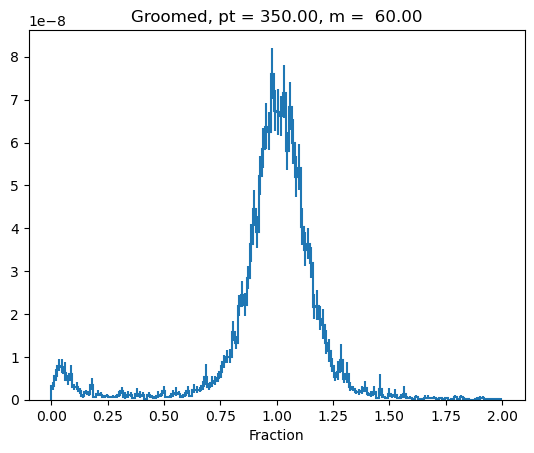

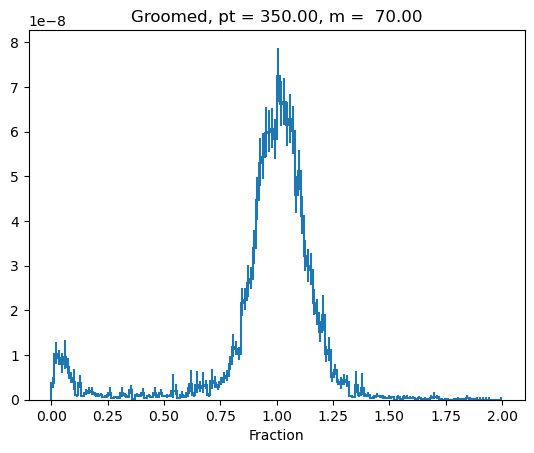

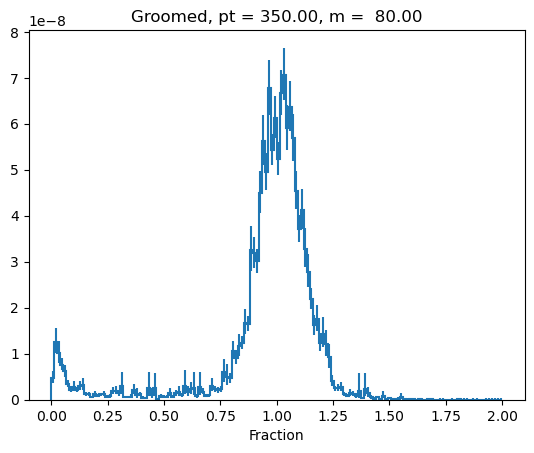

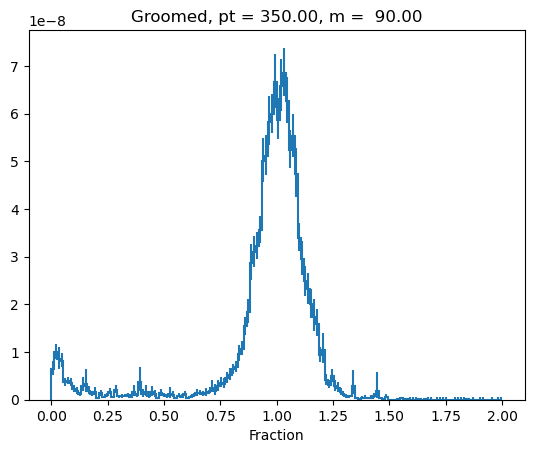

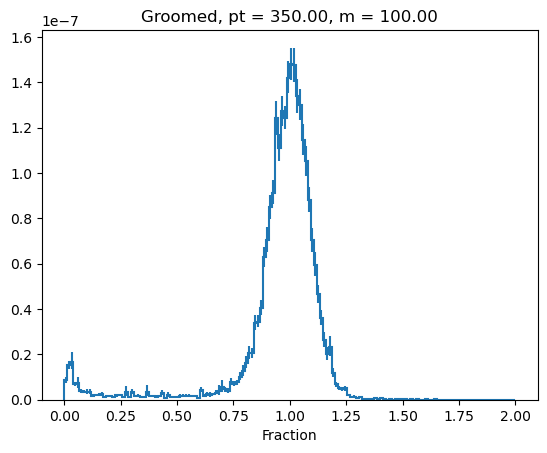

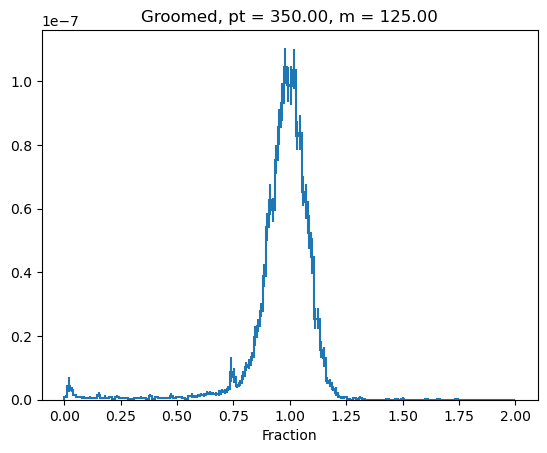

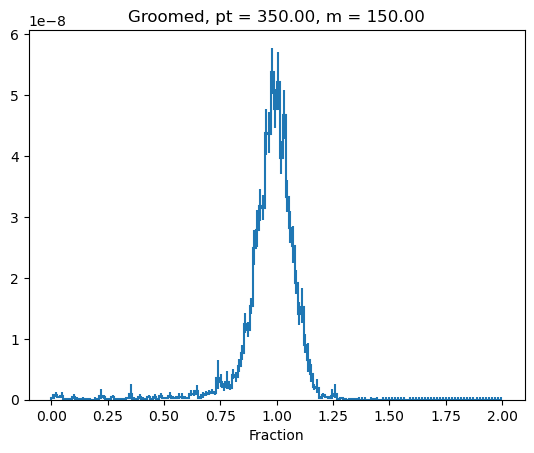

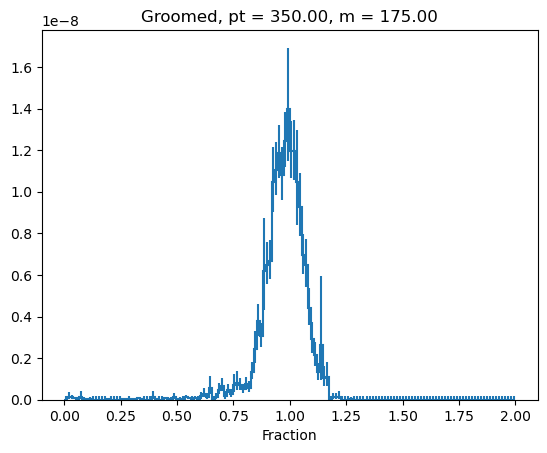

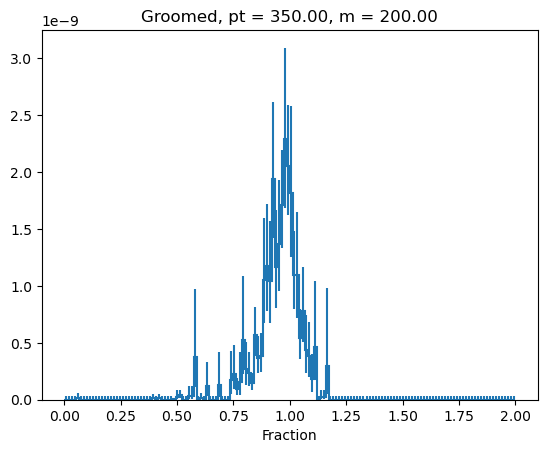

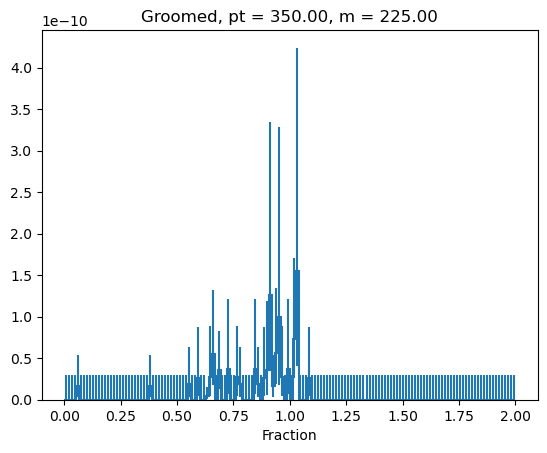

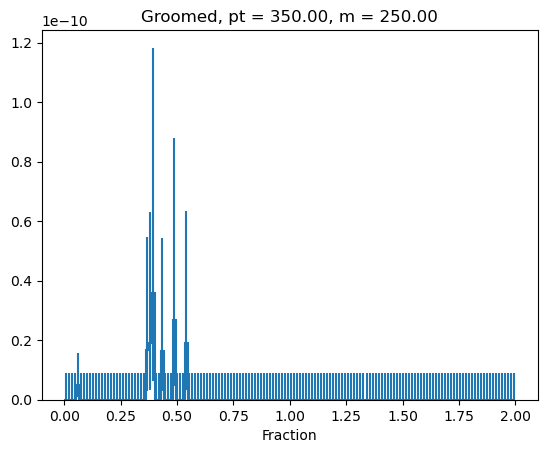

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


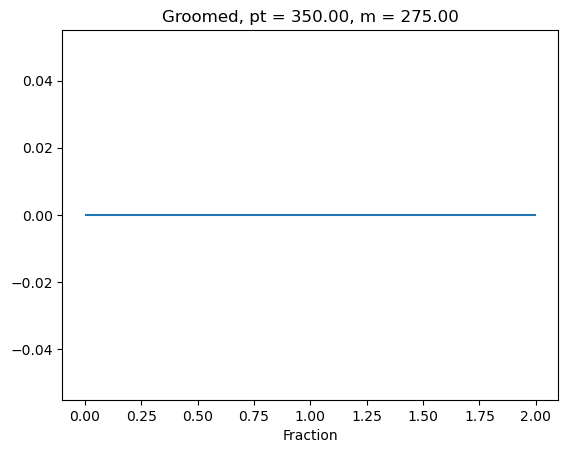

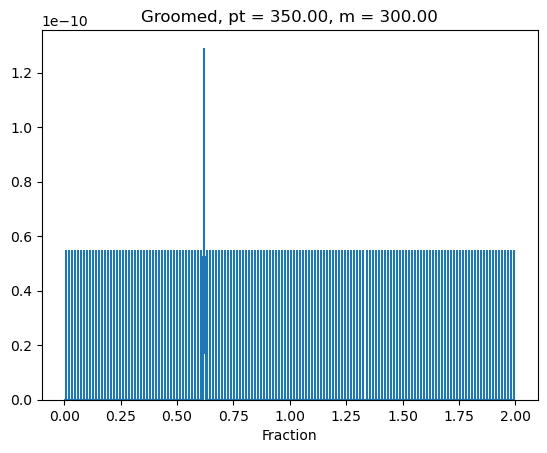

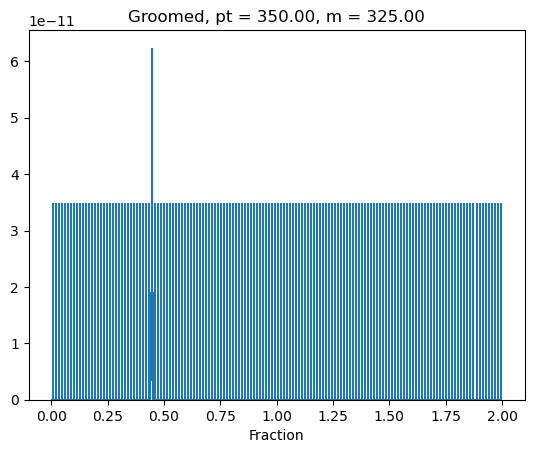

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


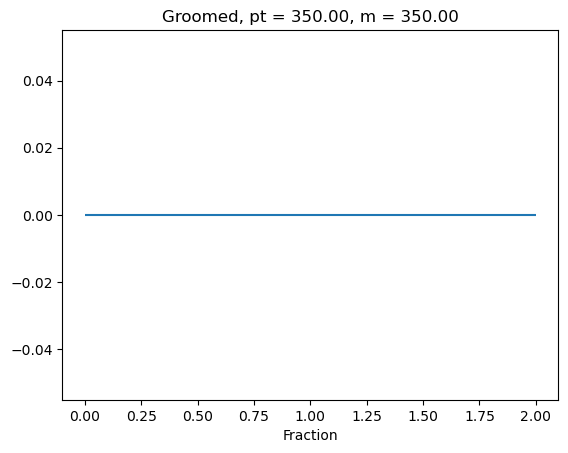

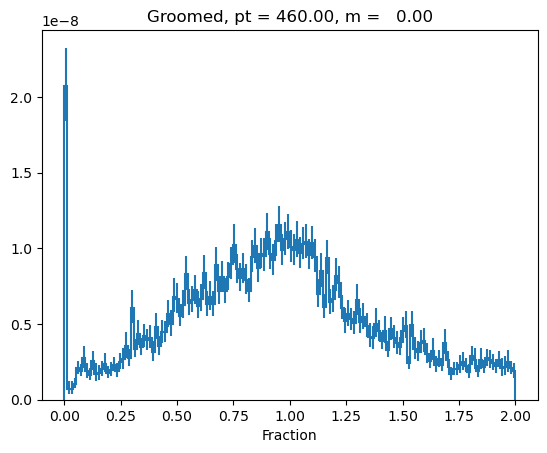

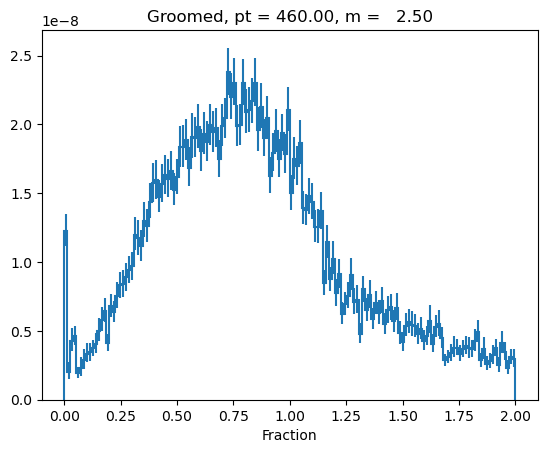

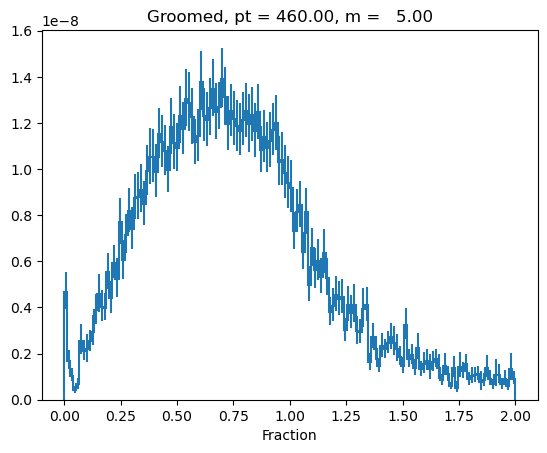

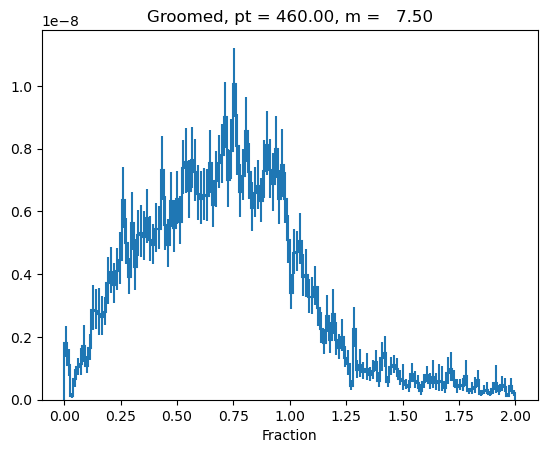

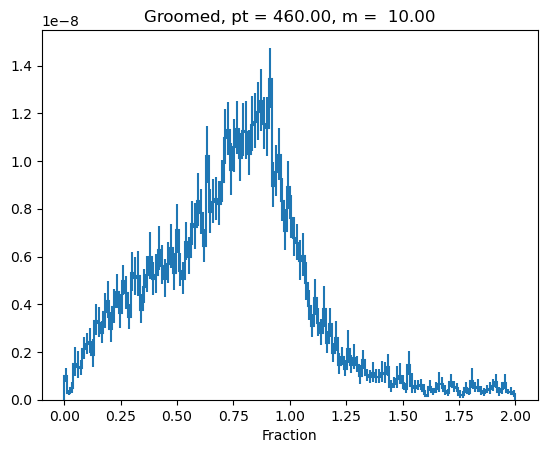

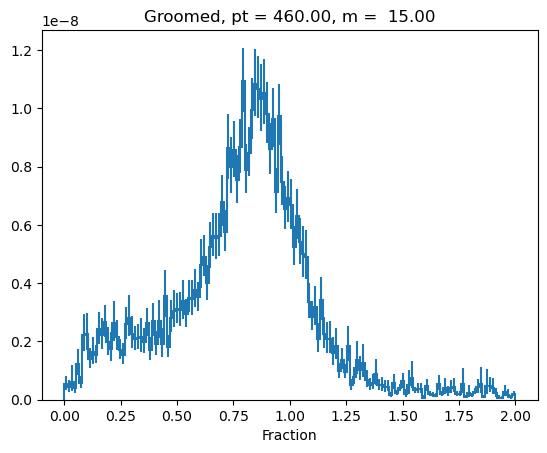

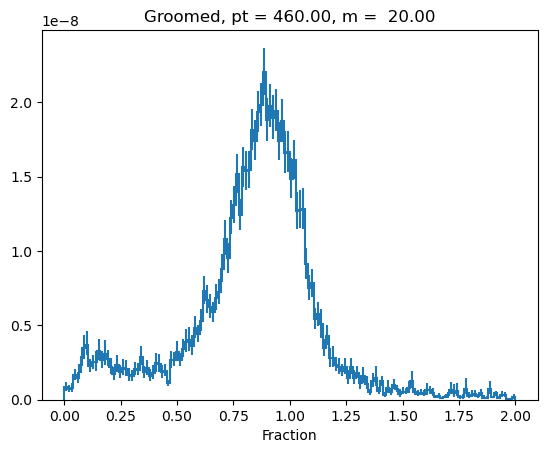

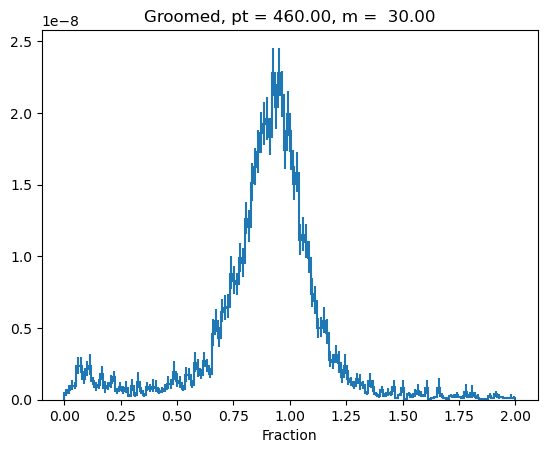

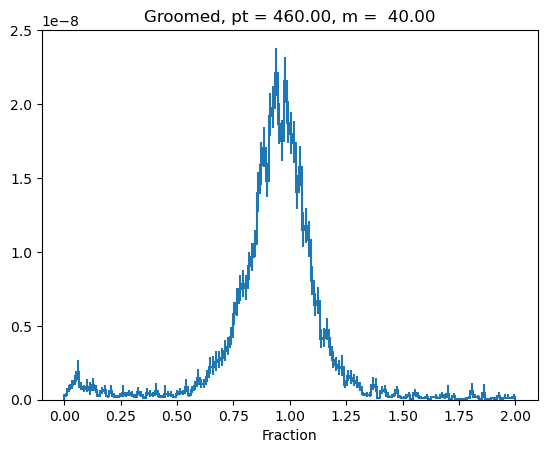

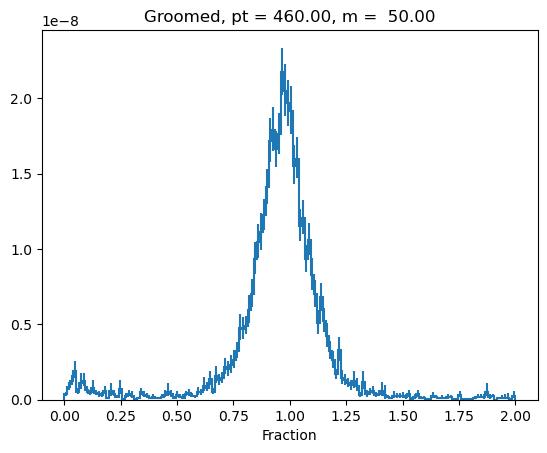

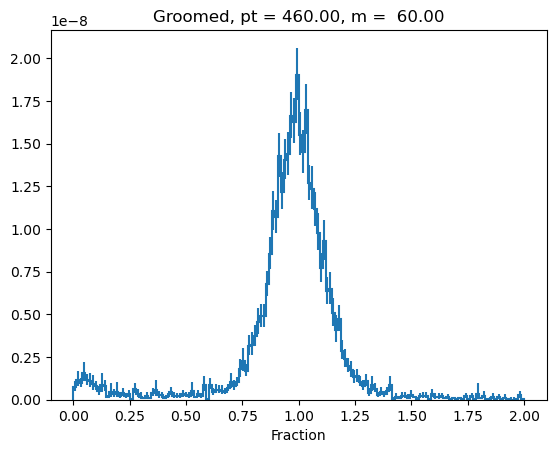

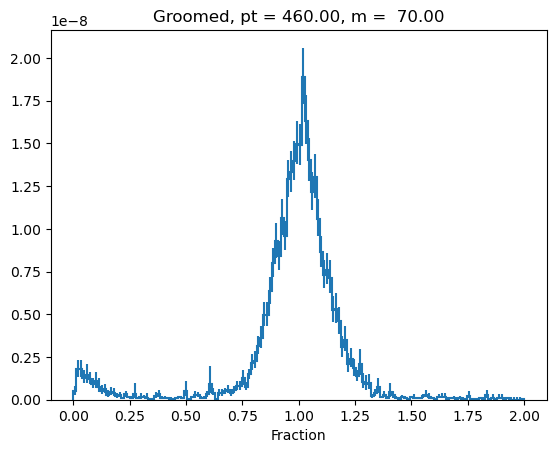

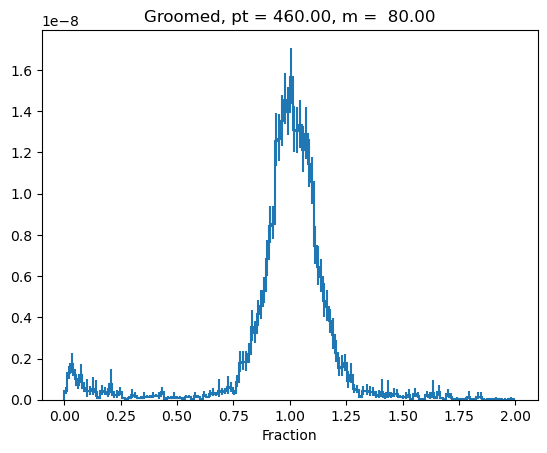

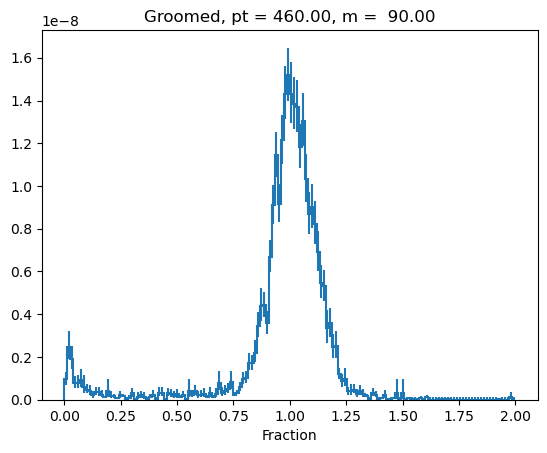

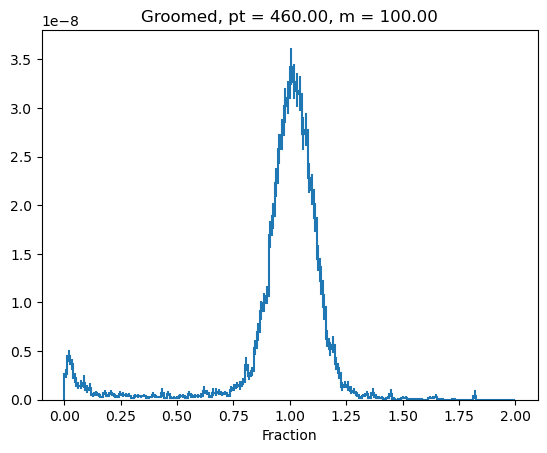

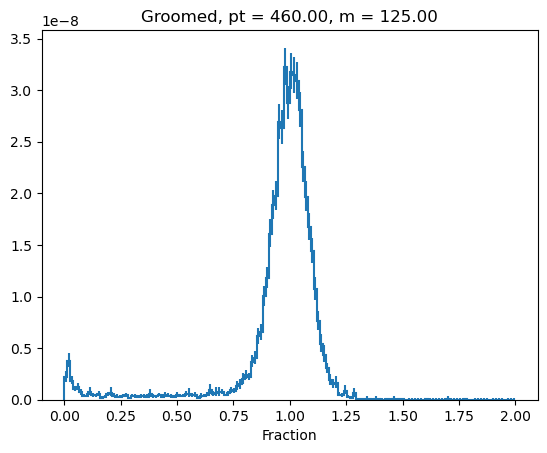

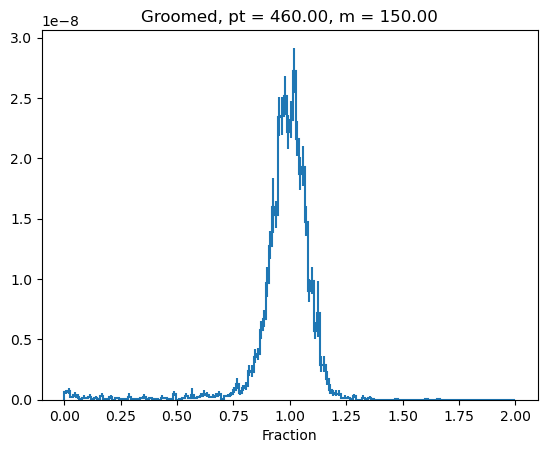

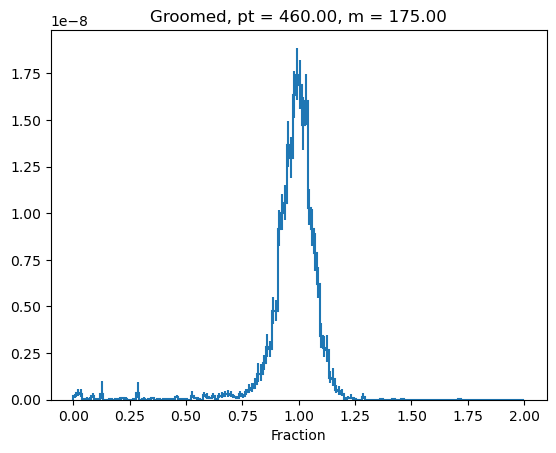

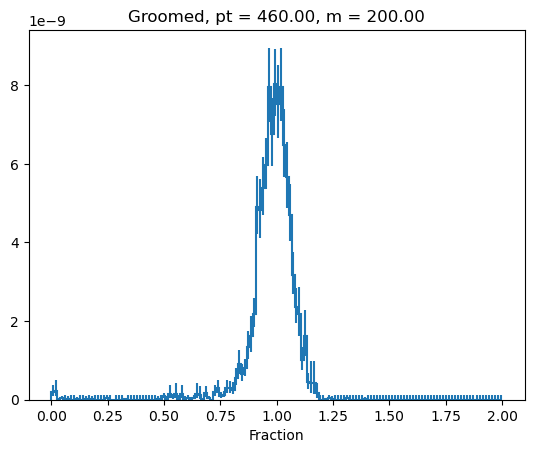

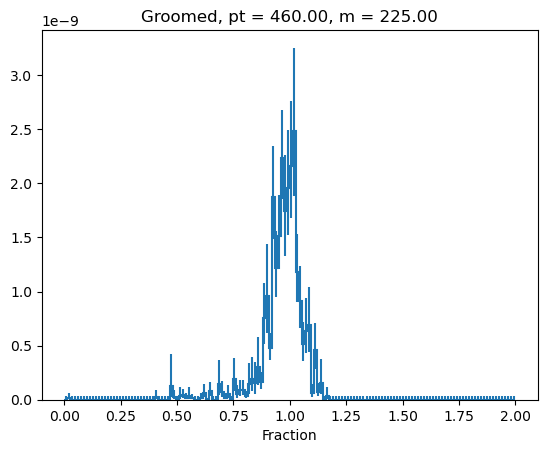

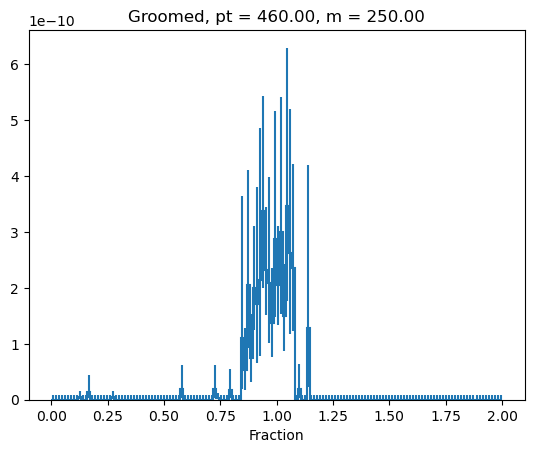

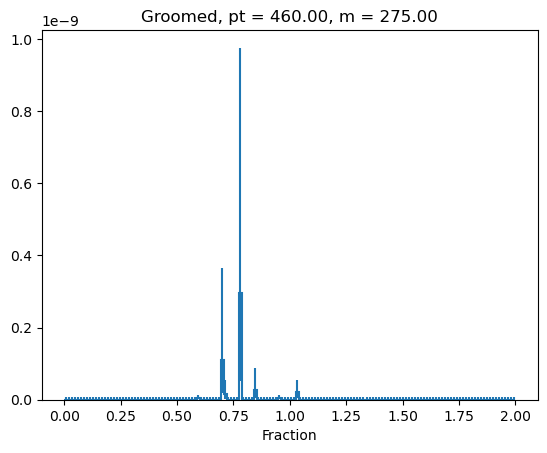

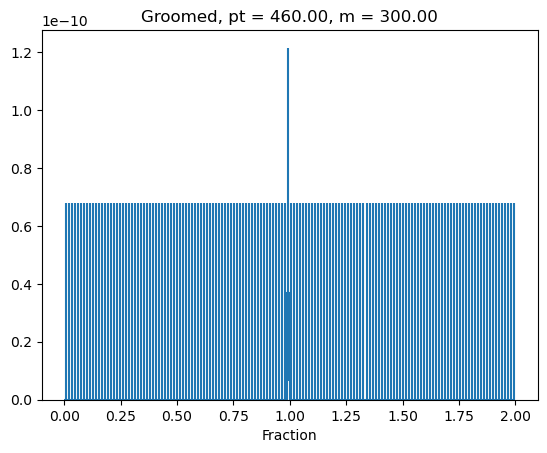

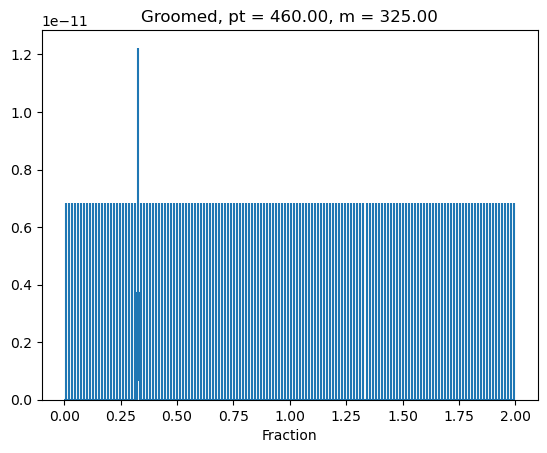

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


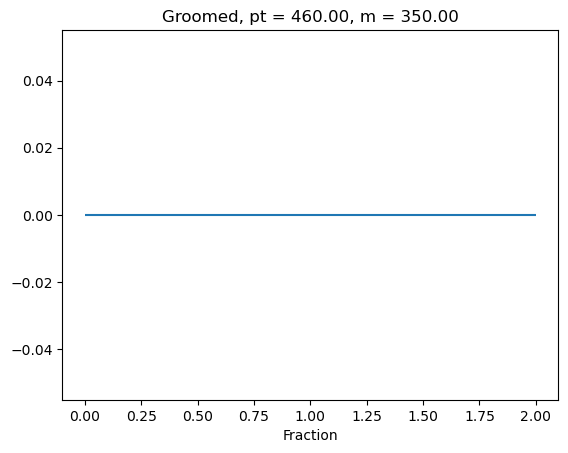

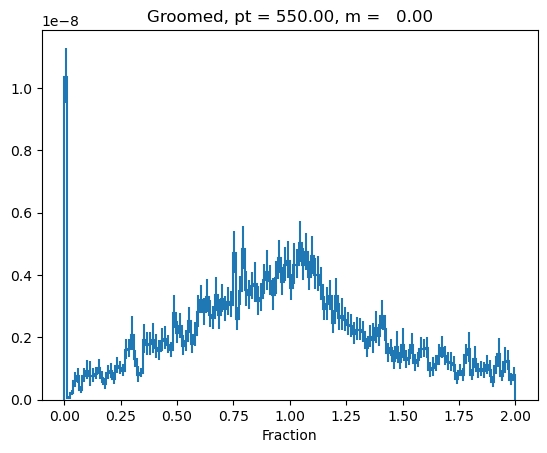

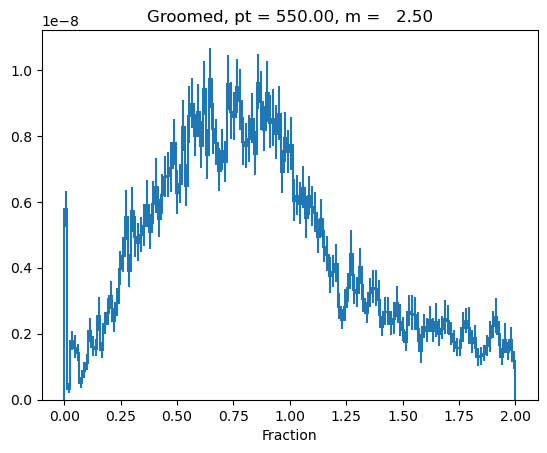

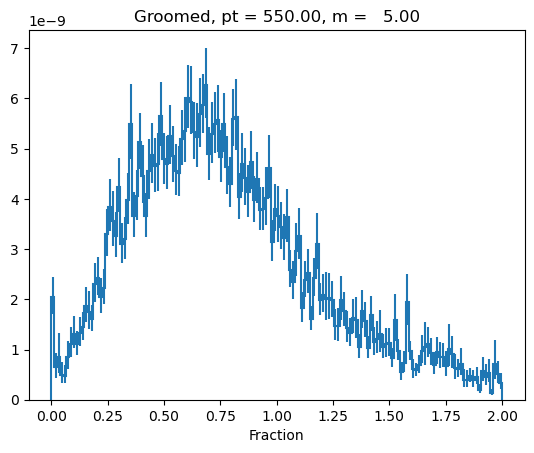

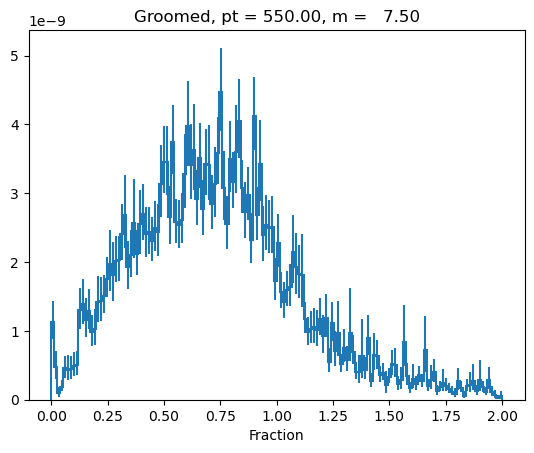

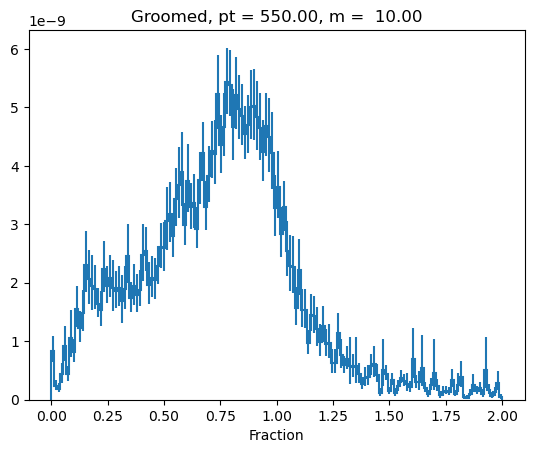

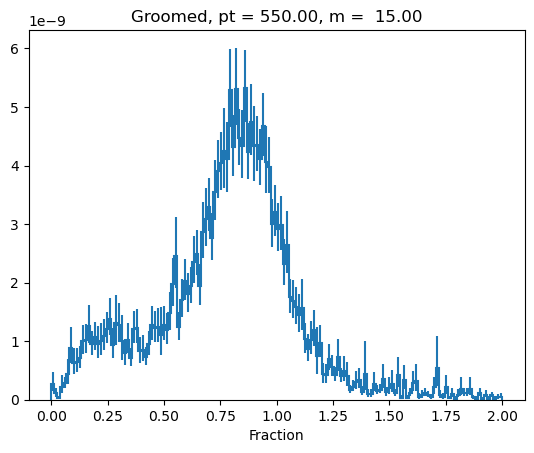

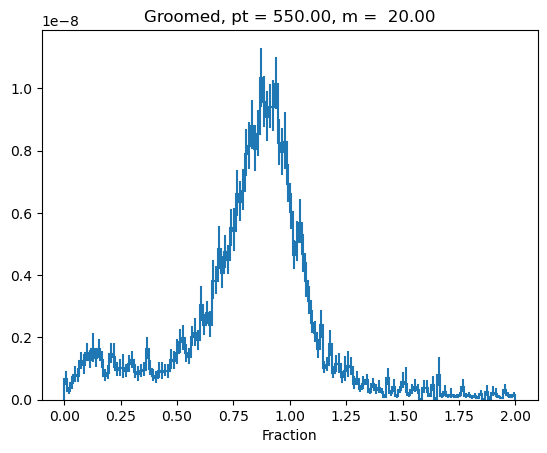

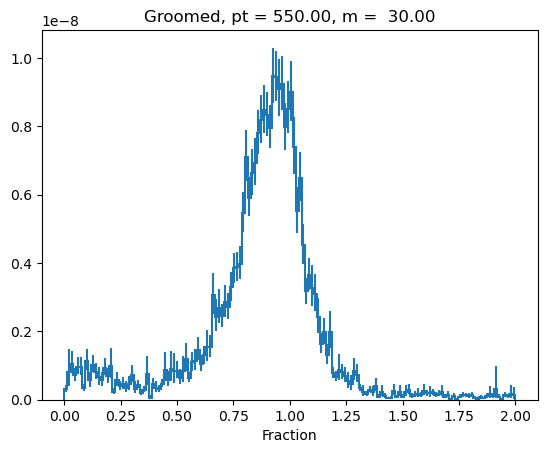

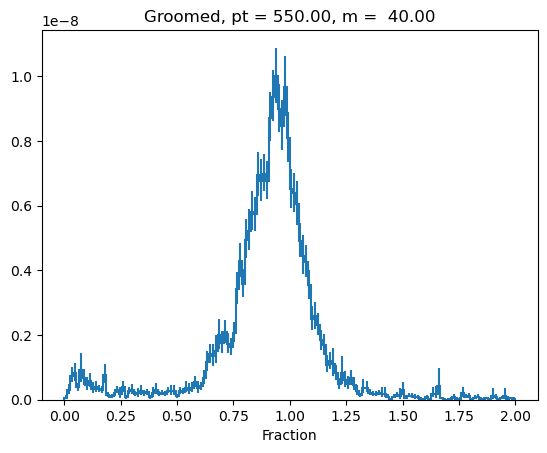

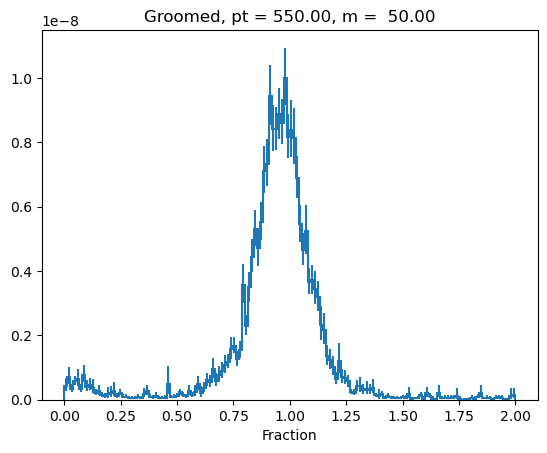

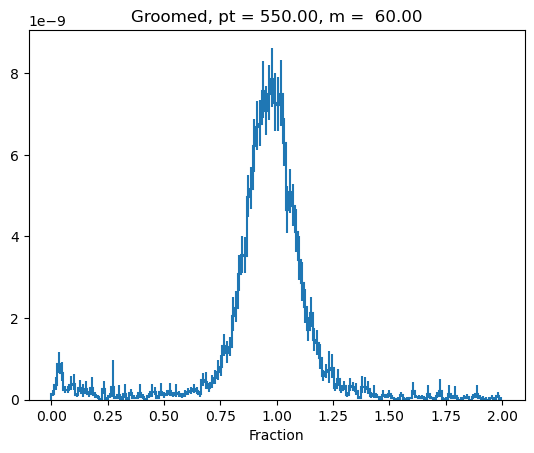

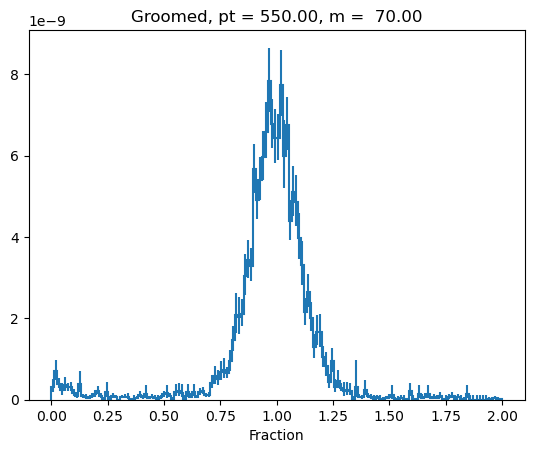

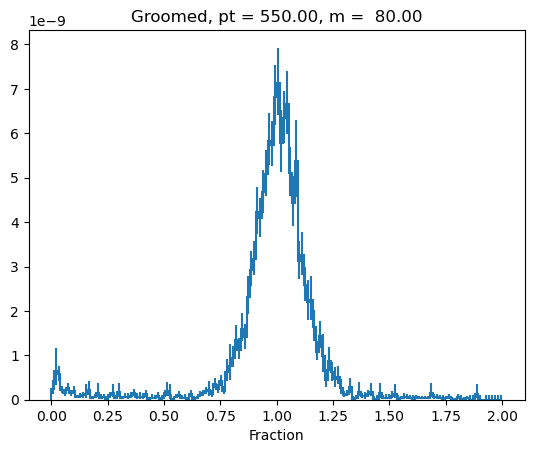

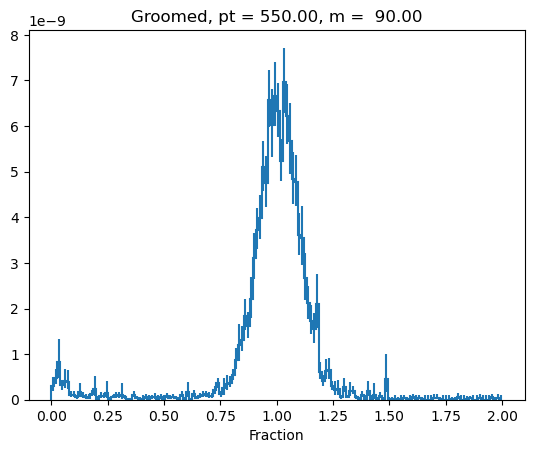

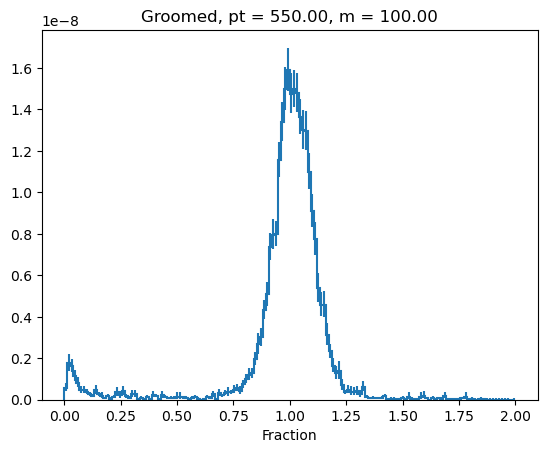

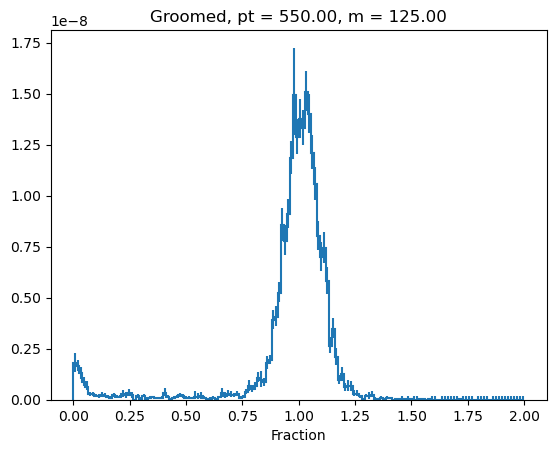

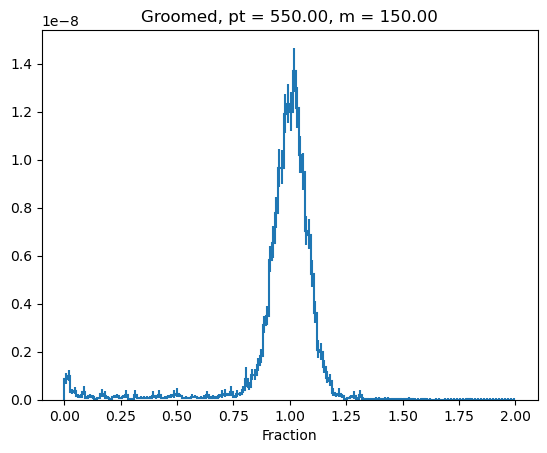

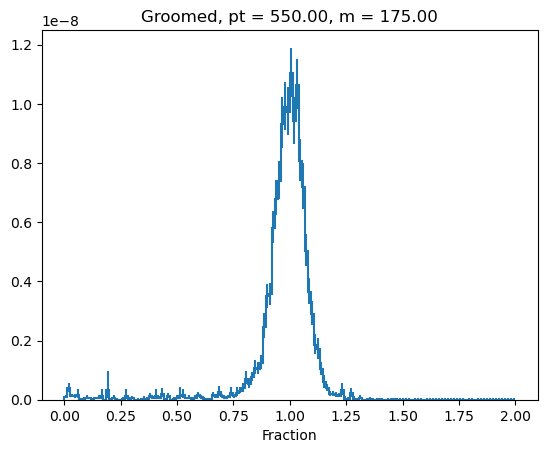

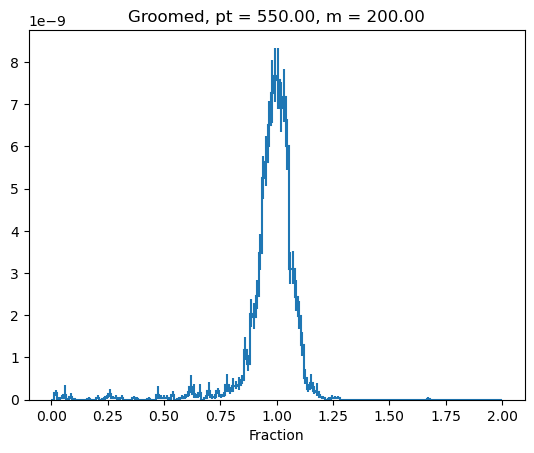

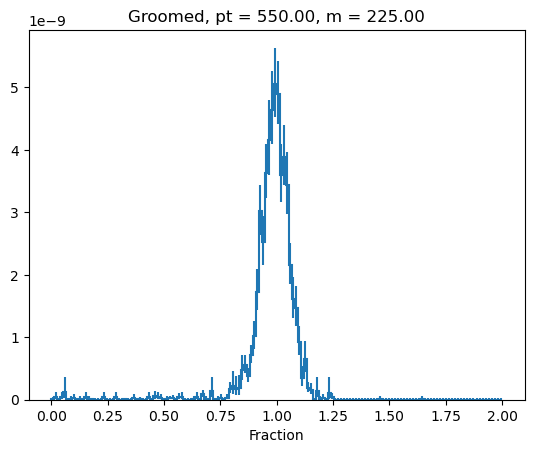

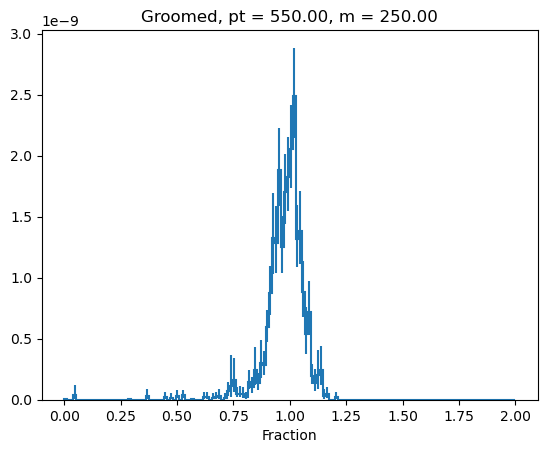

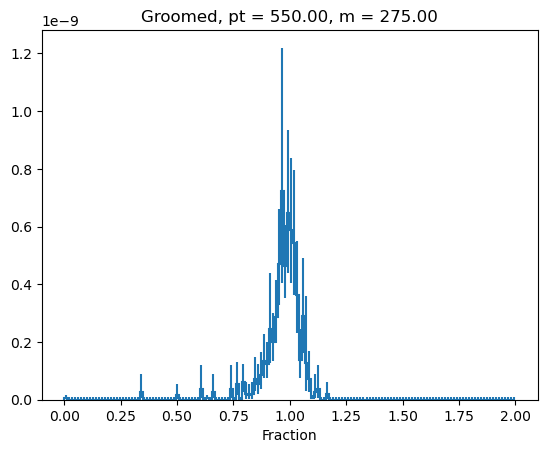

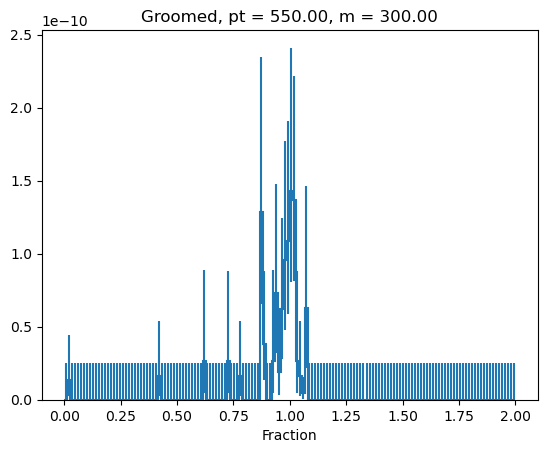

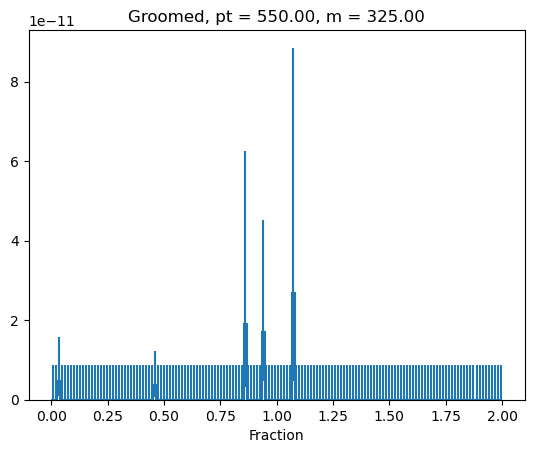

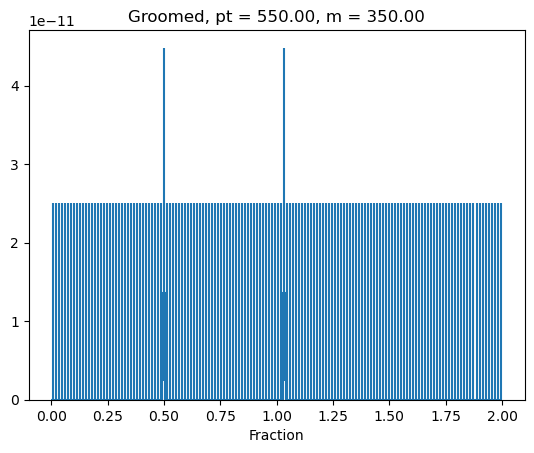

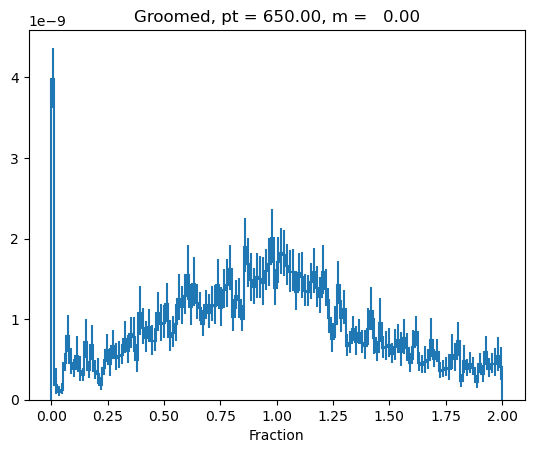

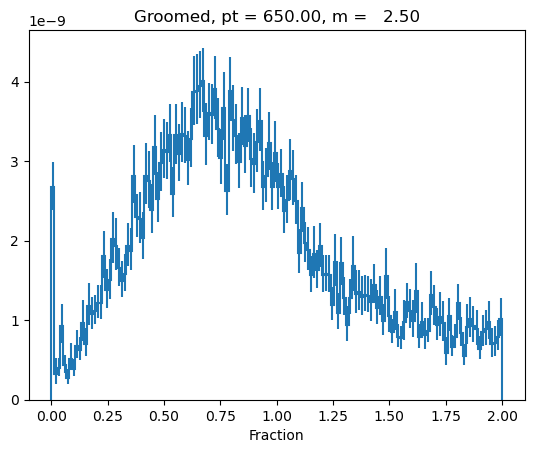

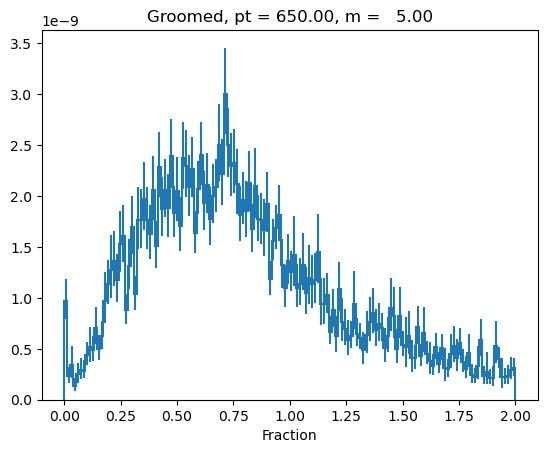

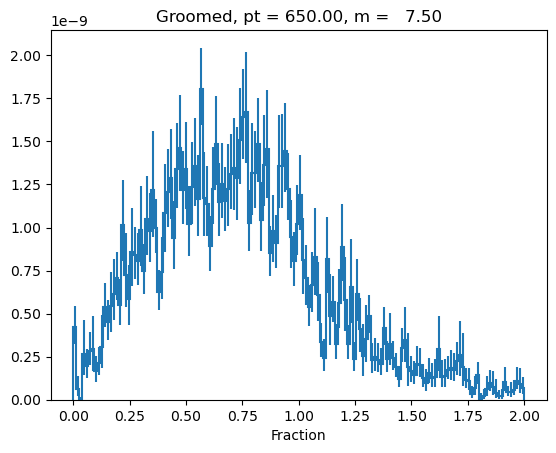

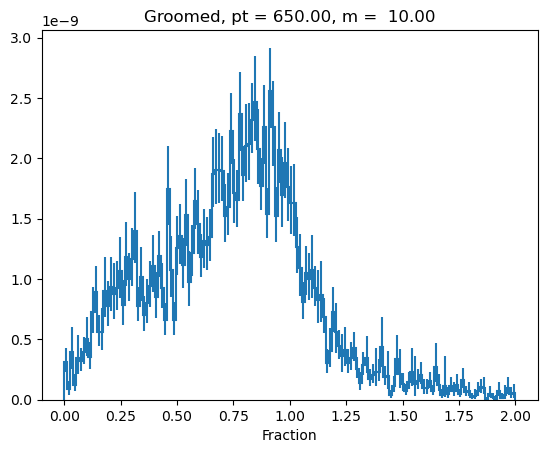

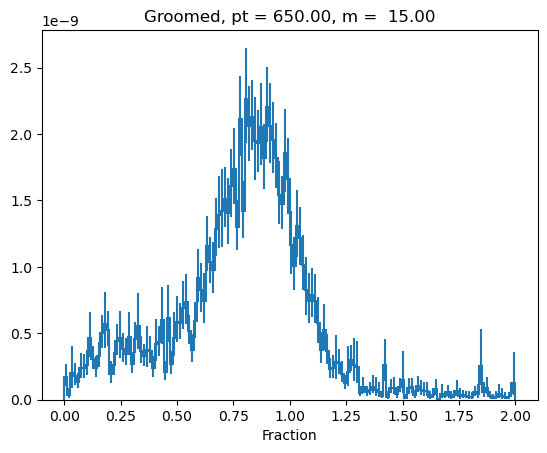

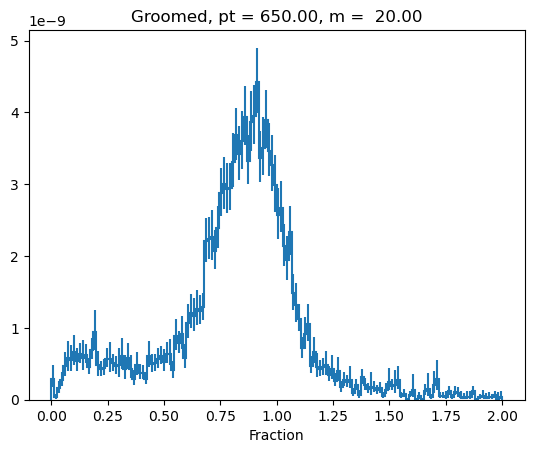

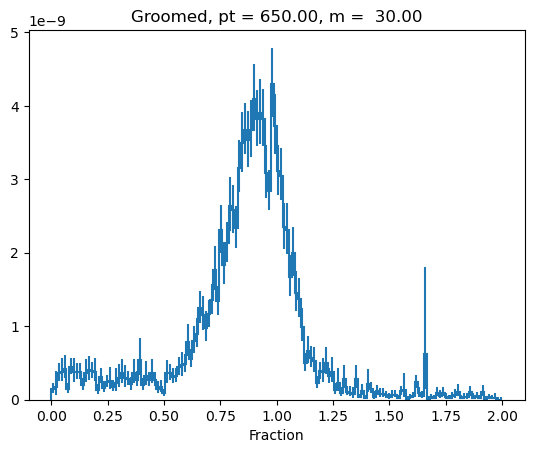

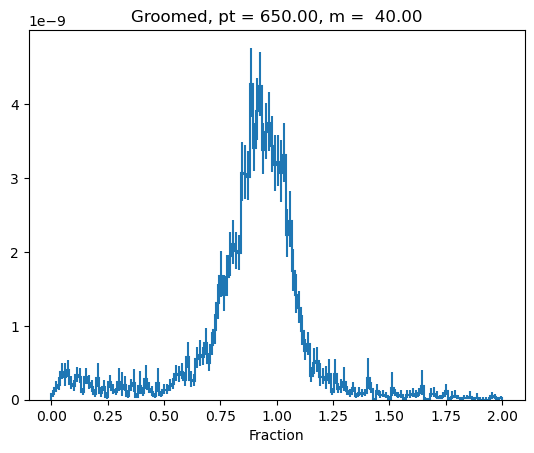

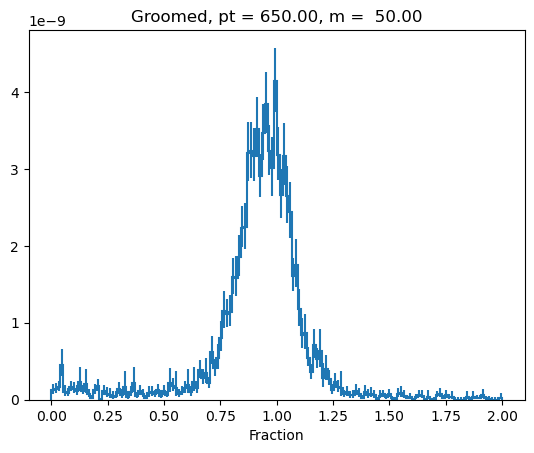

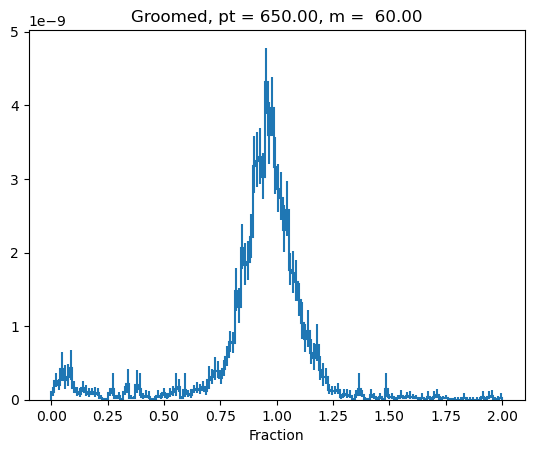

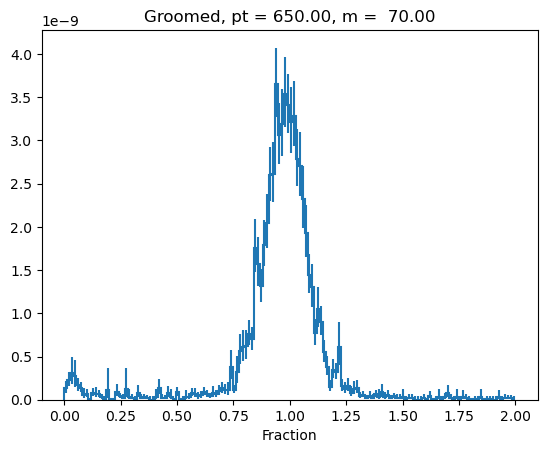

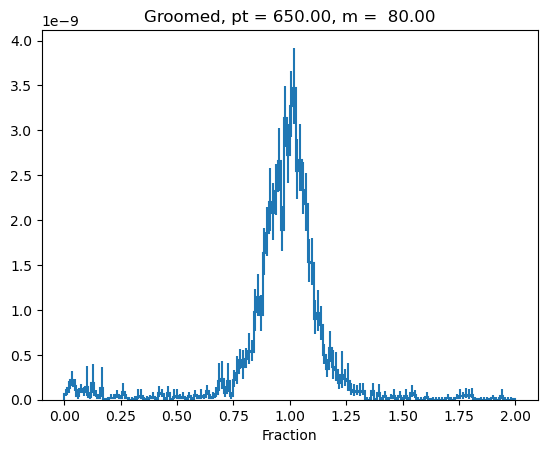

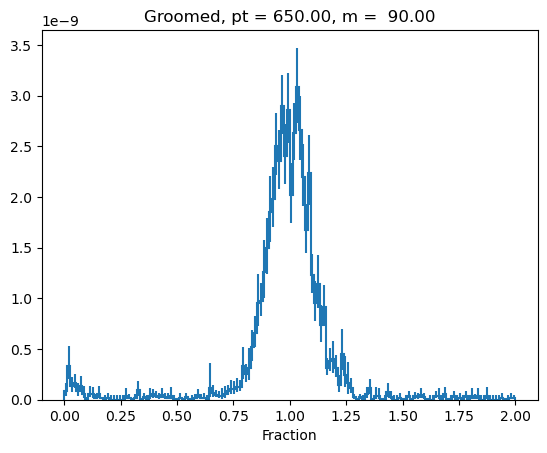

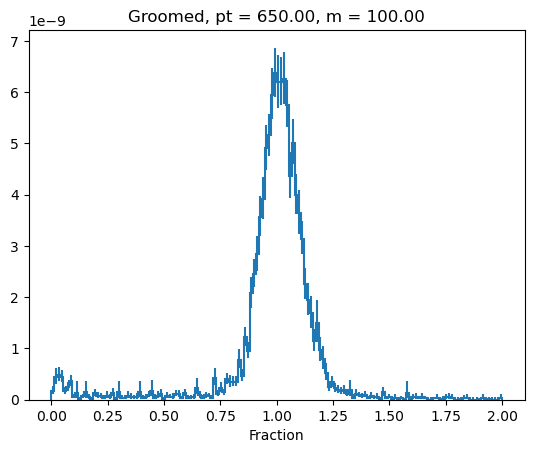

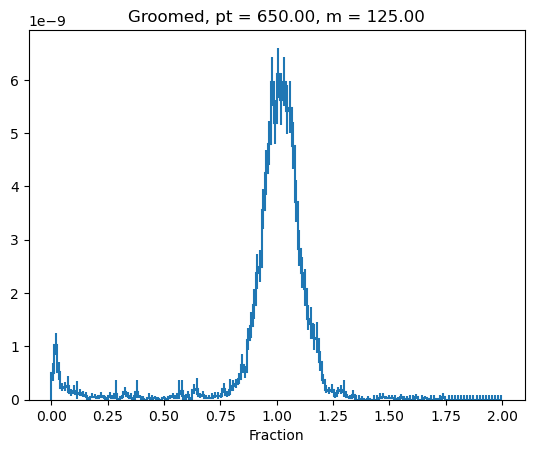

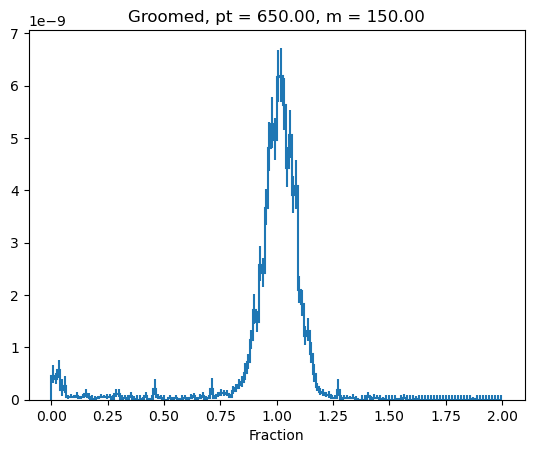

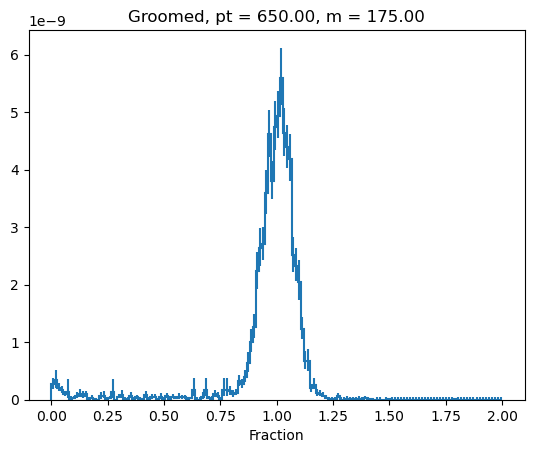

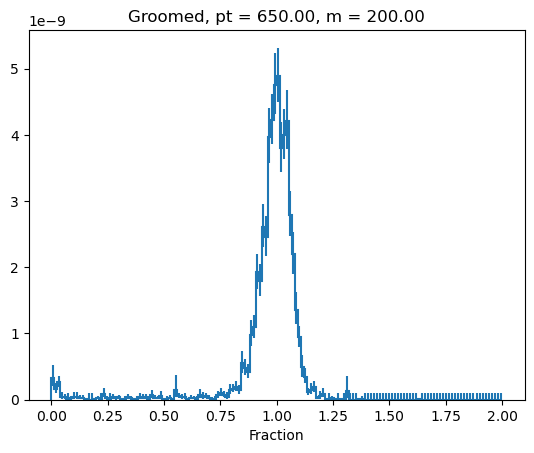

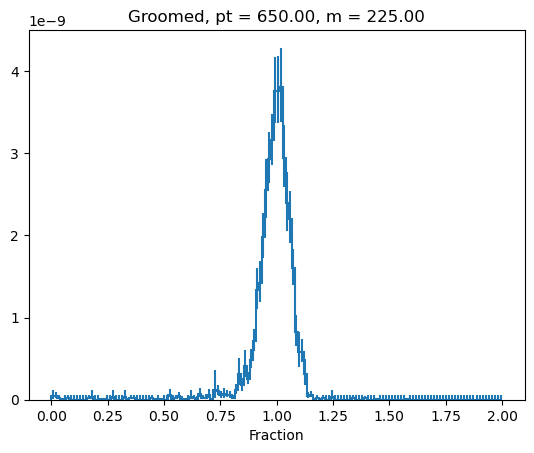

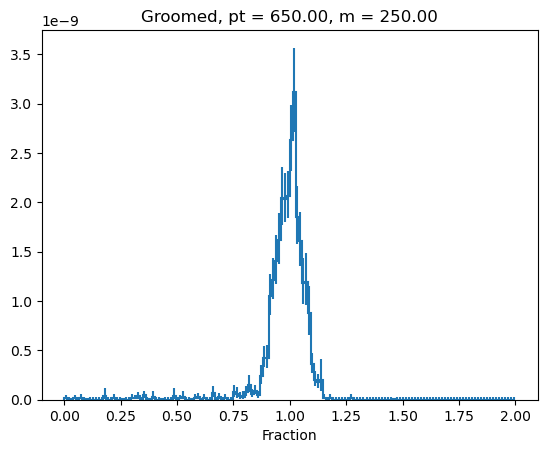

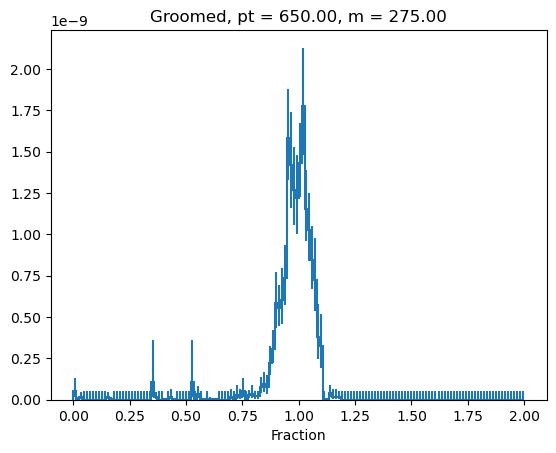

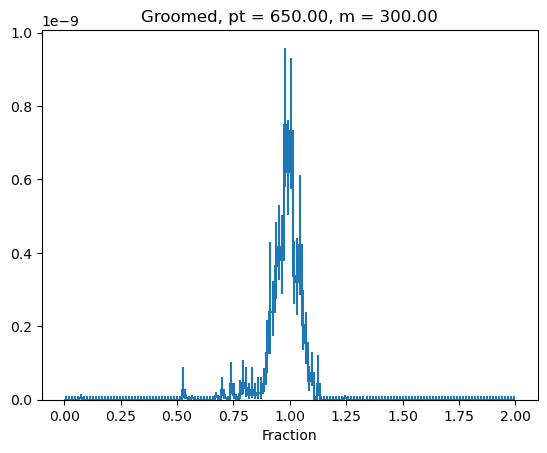

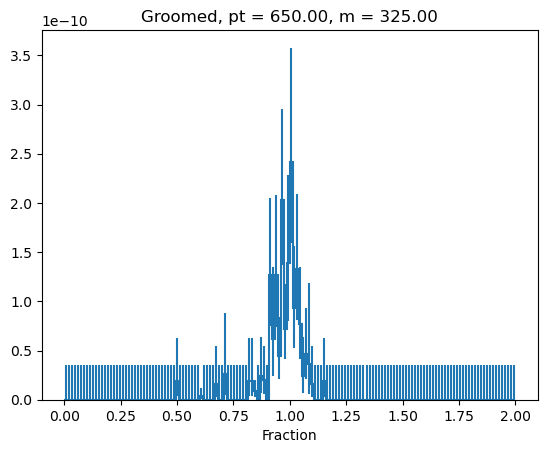

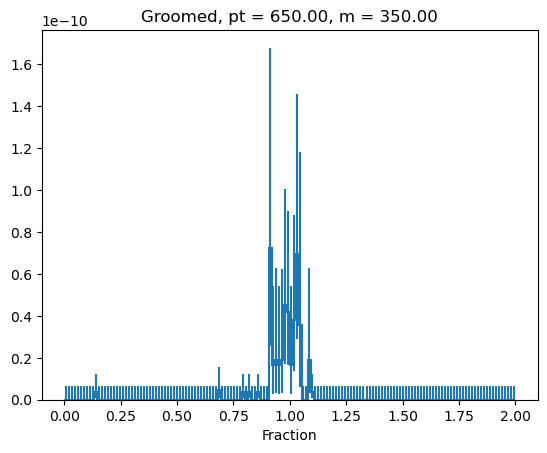

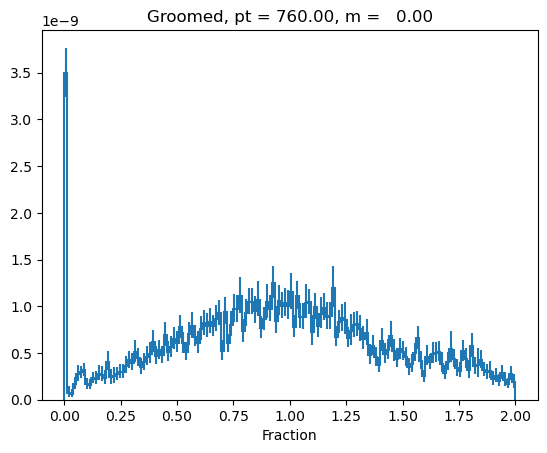

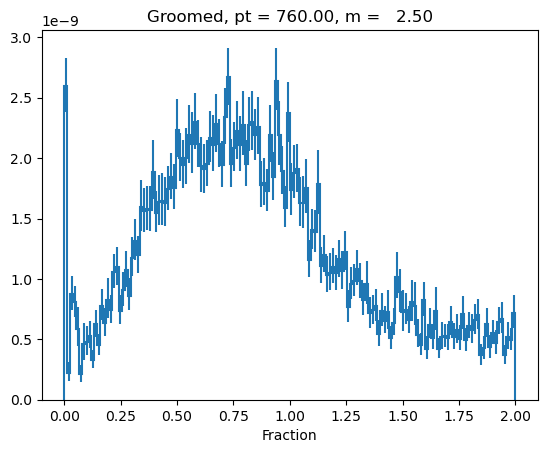

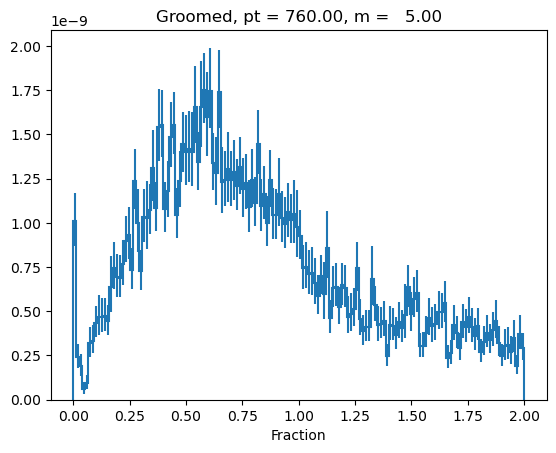

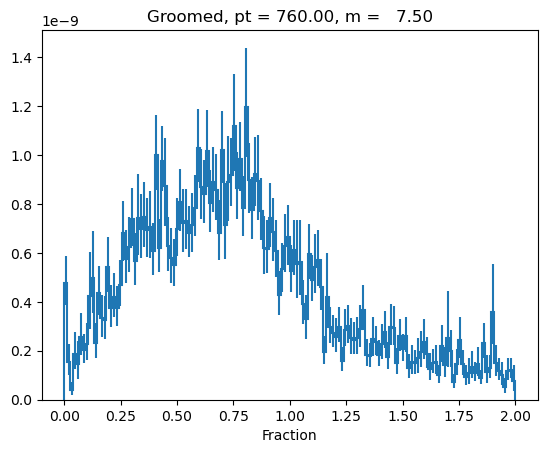

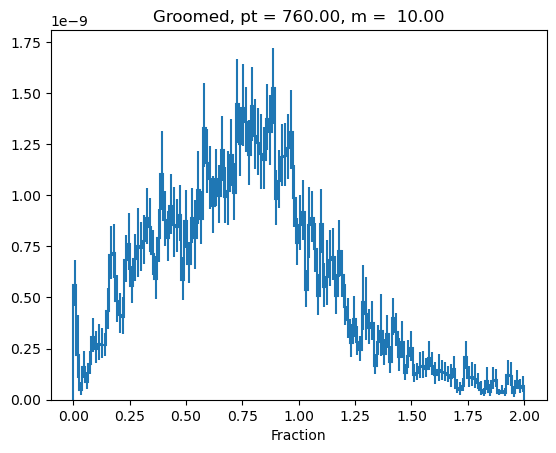

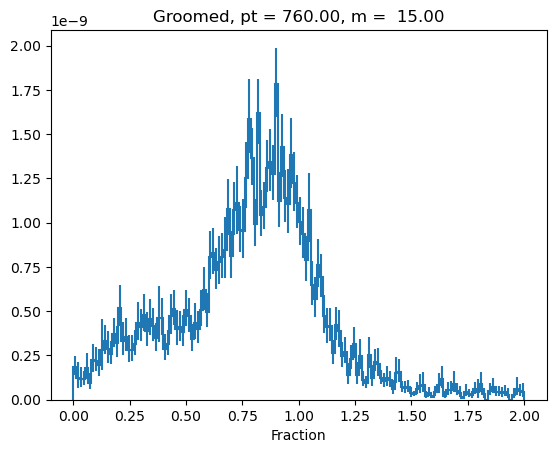

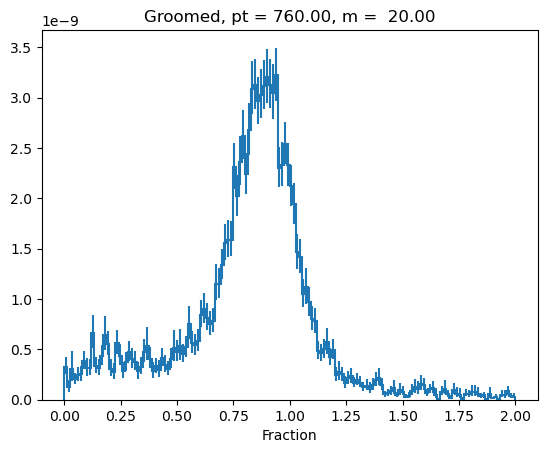

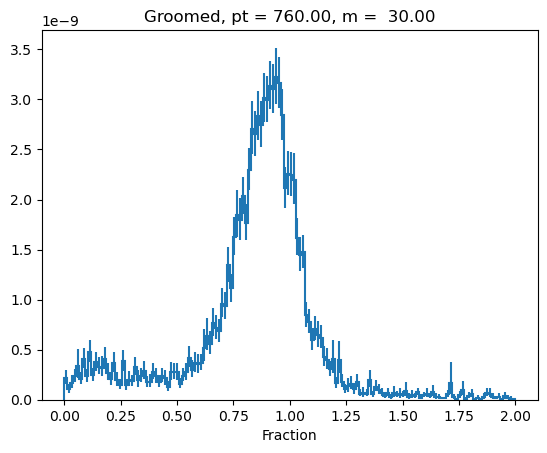

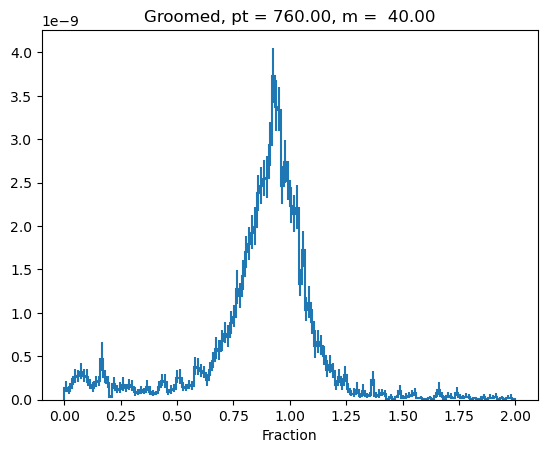

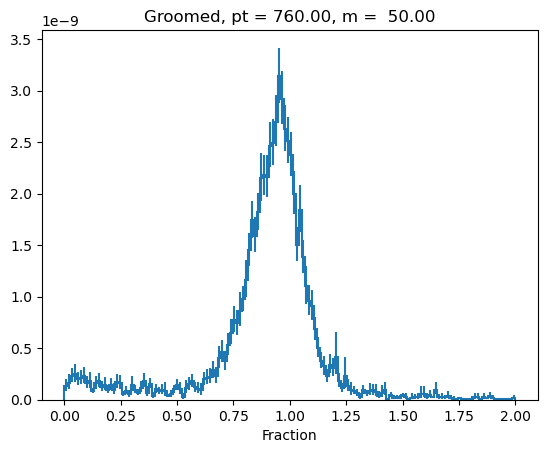

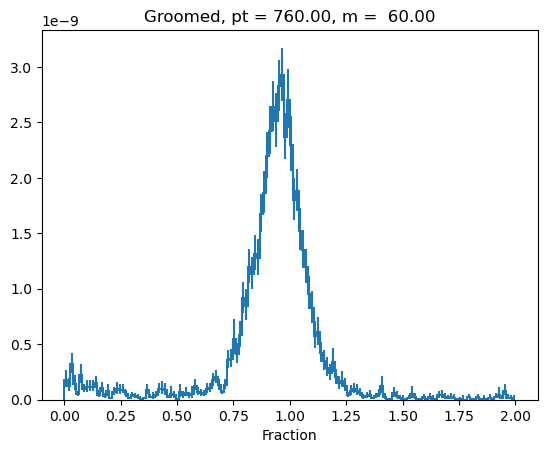

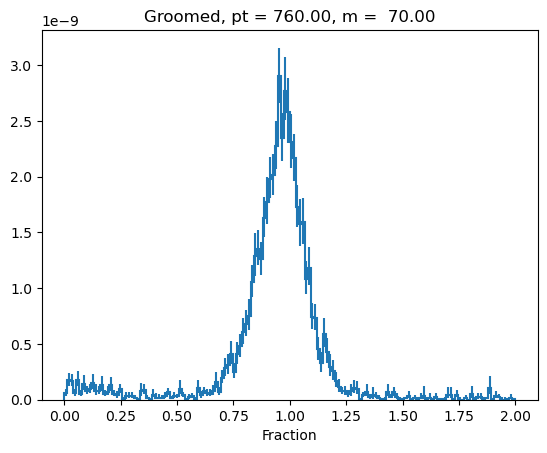

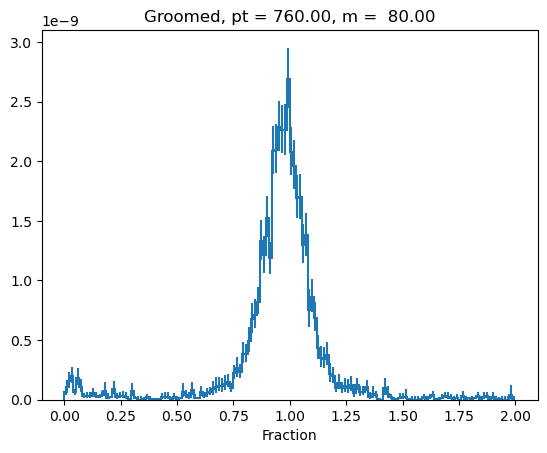

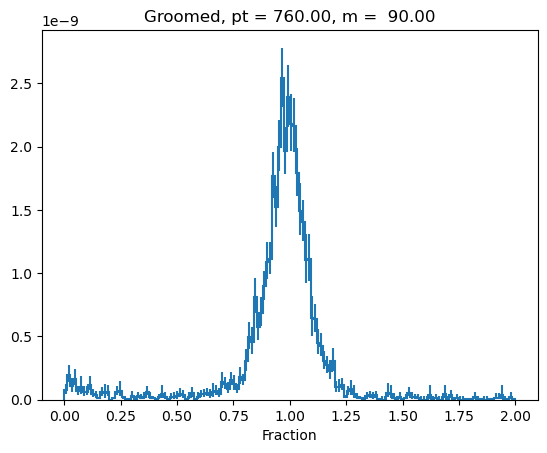

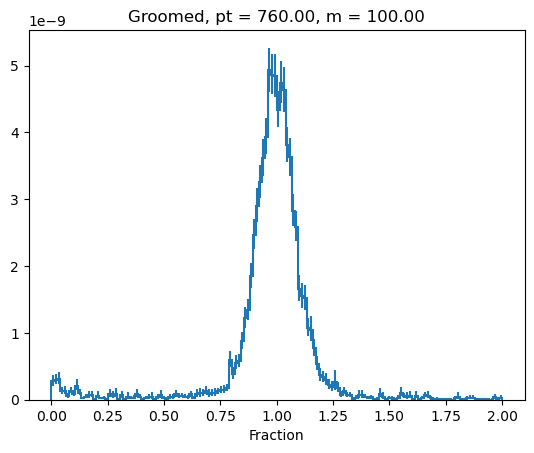

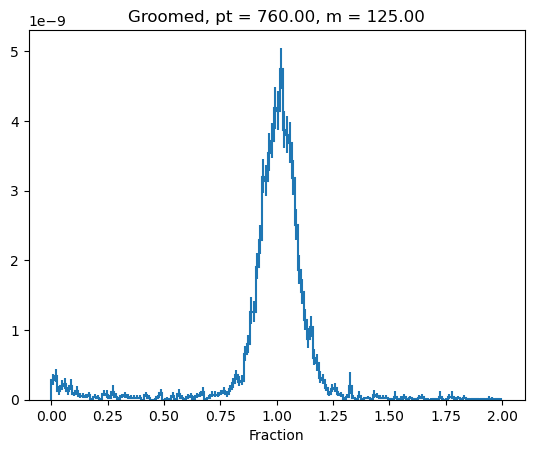

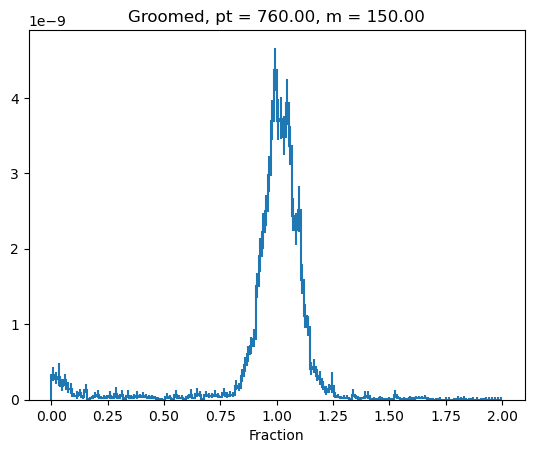

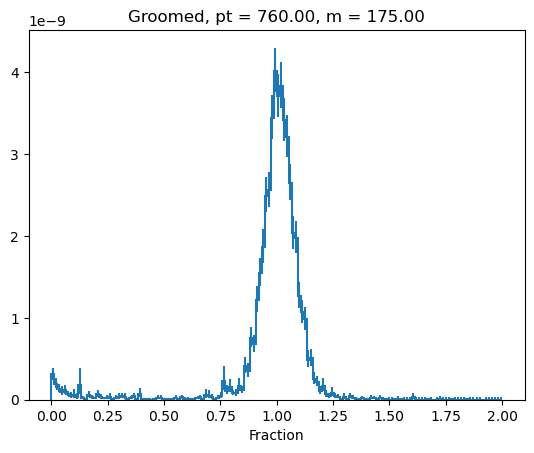

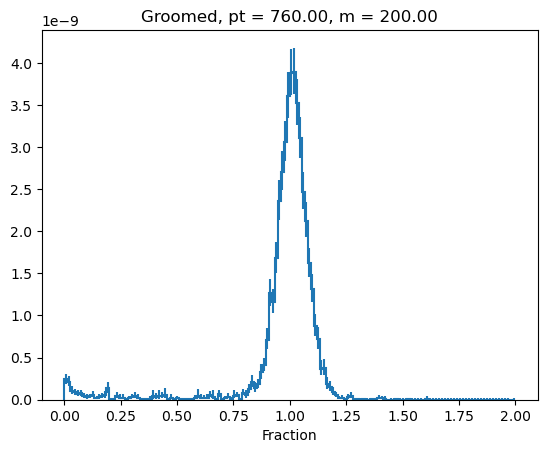

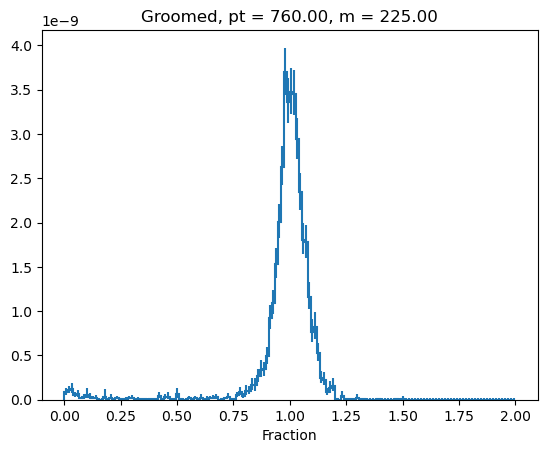

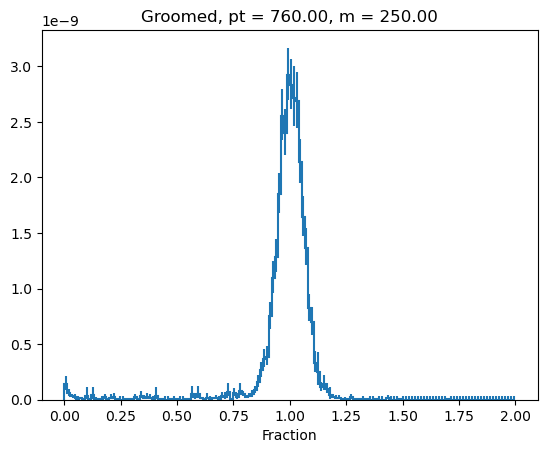

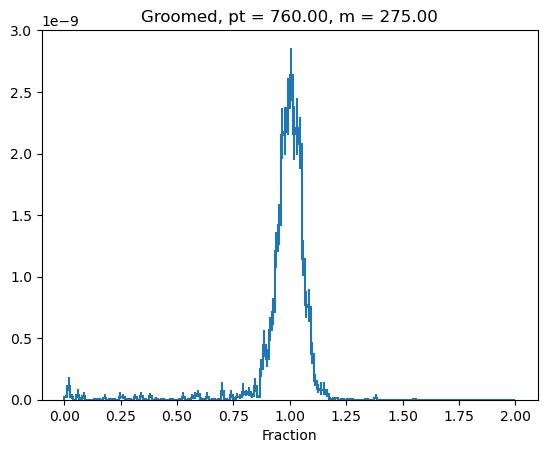

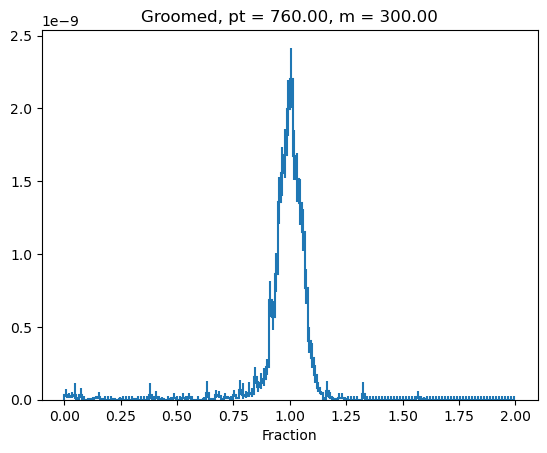

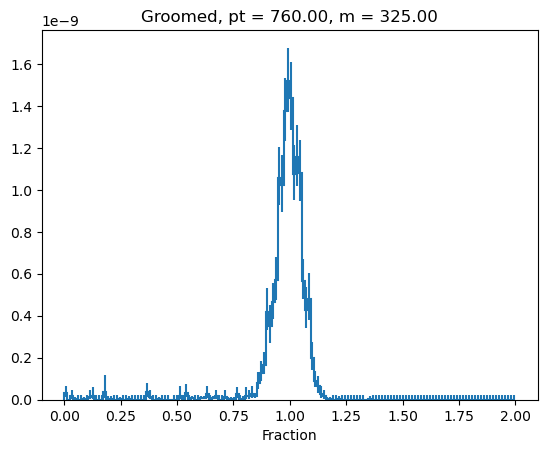

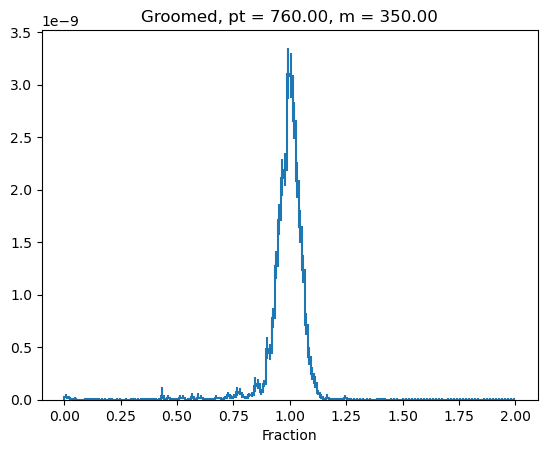

In [47]:
for i in range(nptbins):
    for j in range(nmassbins): 
        resolutions_g[i,j,:].plot()
        plt.title("Groomed, pt = %6.2f, m = %6.2f" % (ptvals.value(i), mvals.value(j)) )
        plt.show()

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


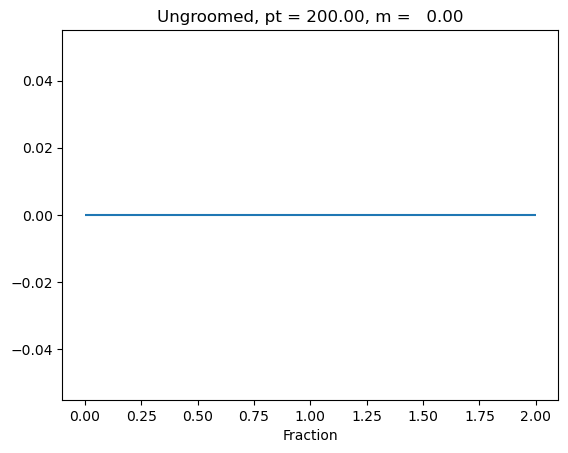

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


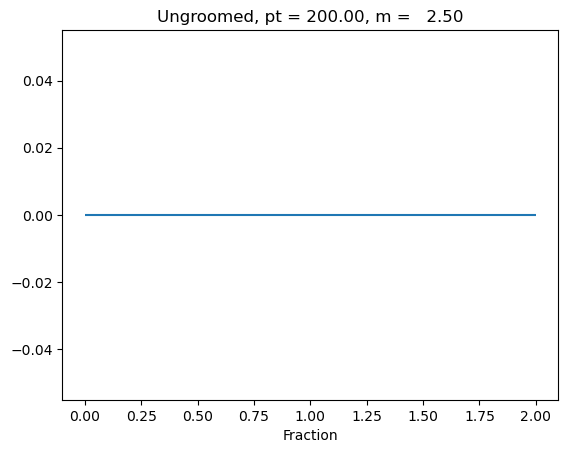

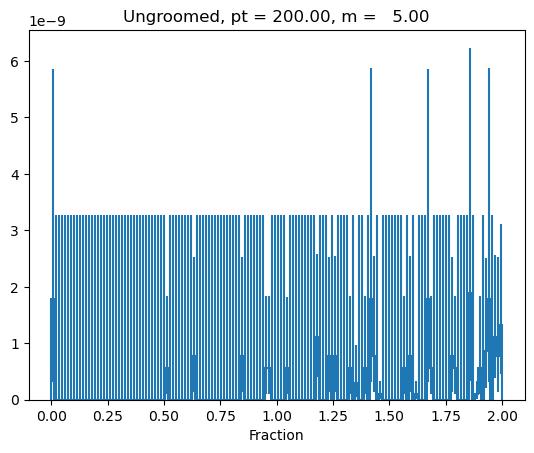

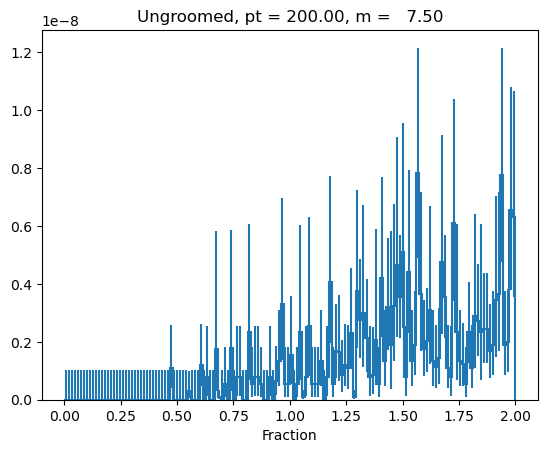

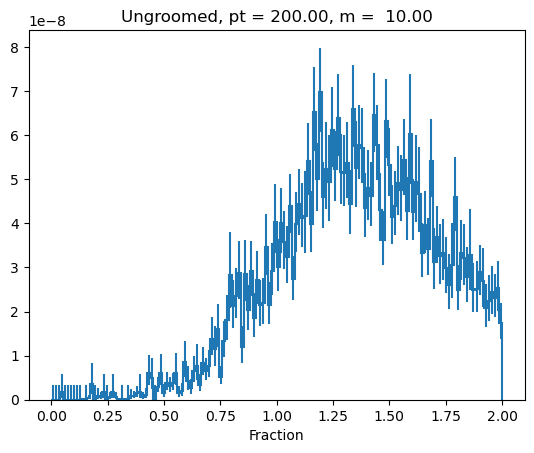

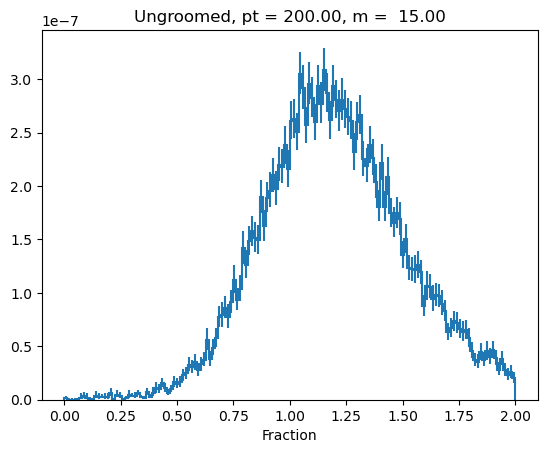

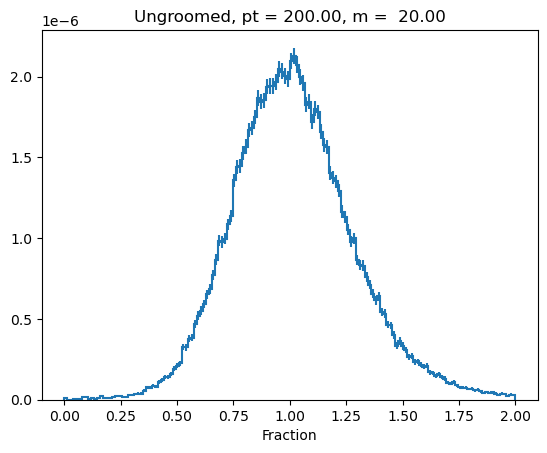

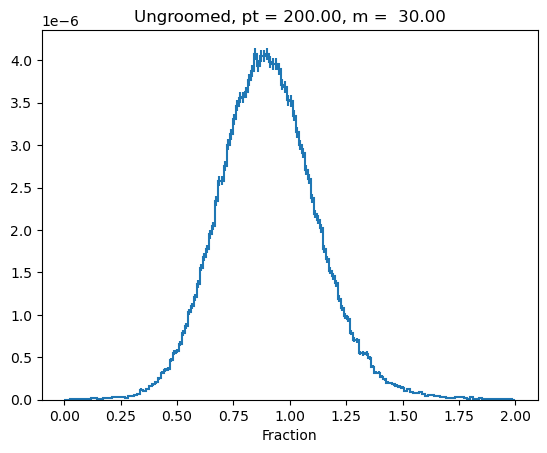

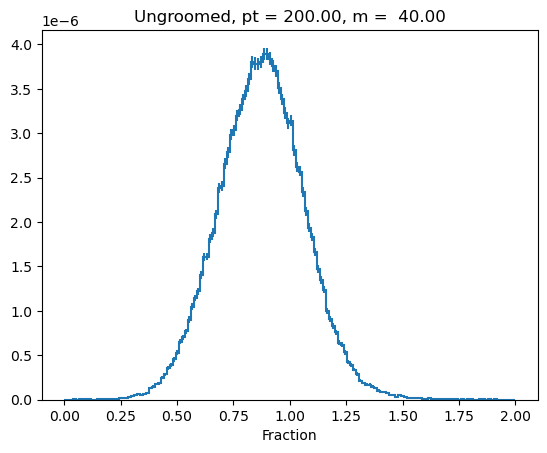

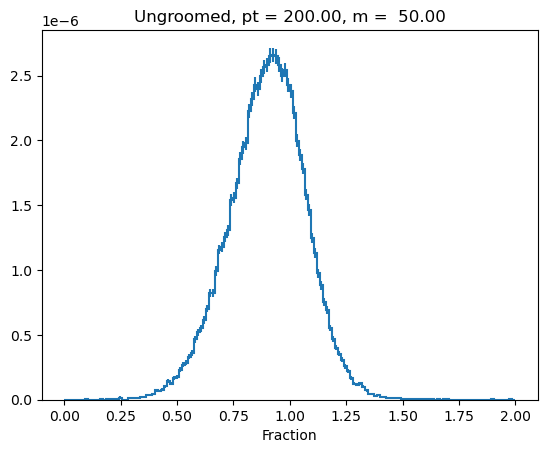

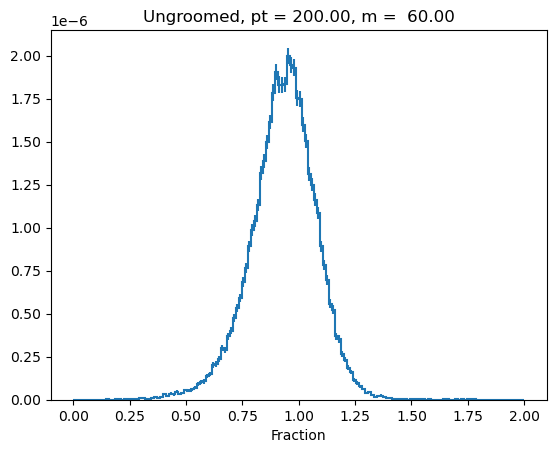

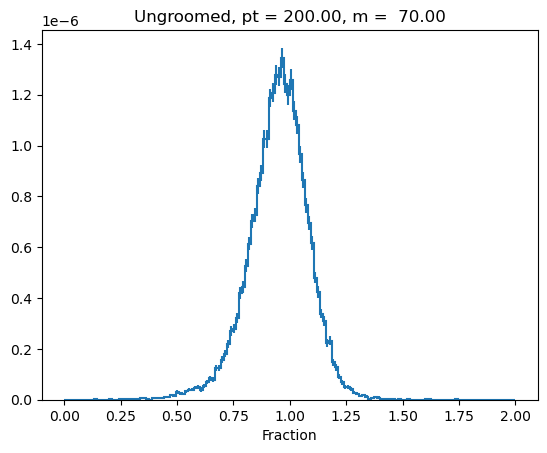

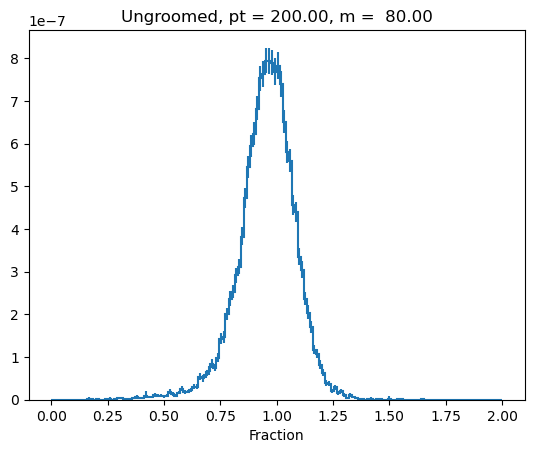

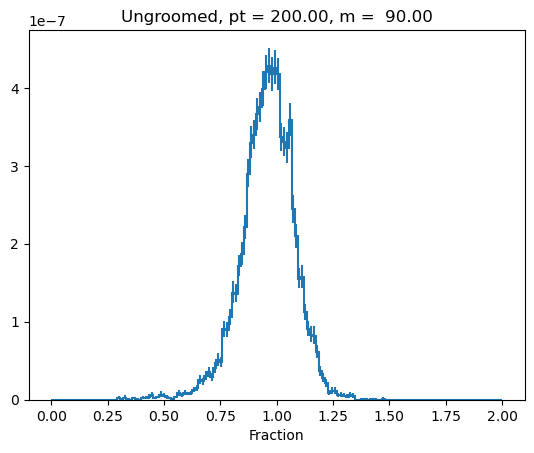

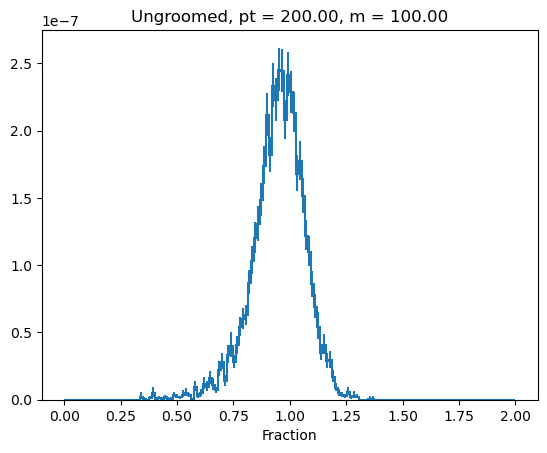

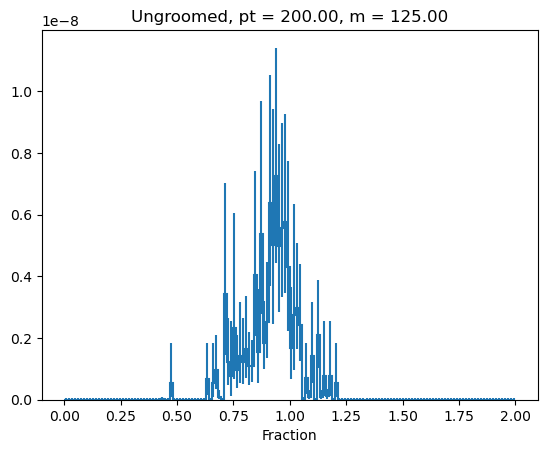

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


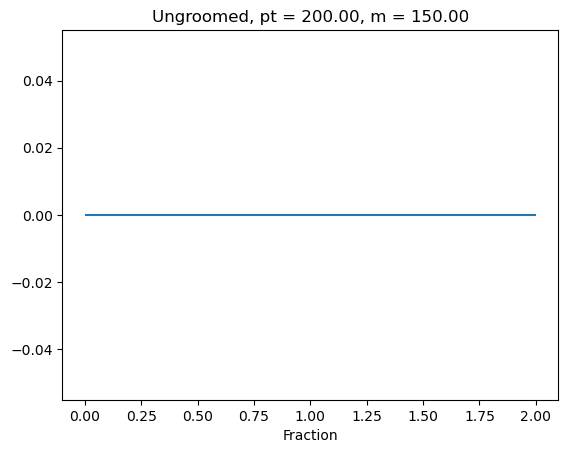

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


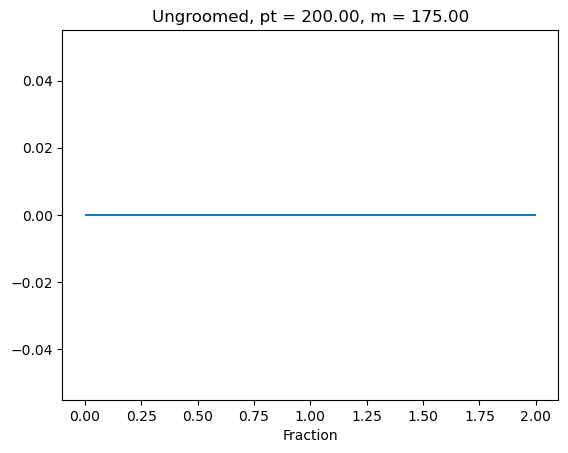

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


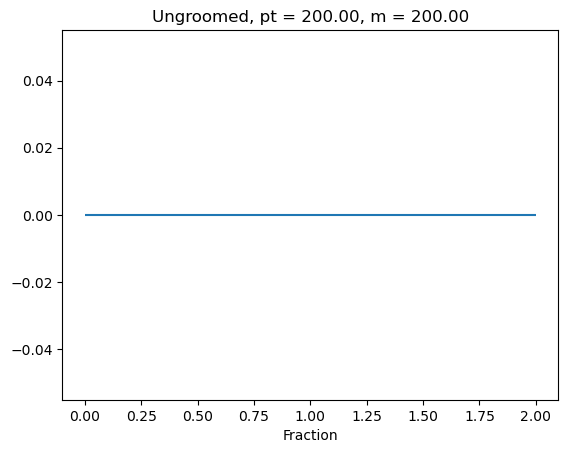

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


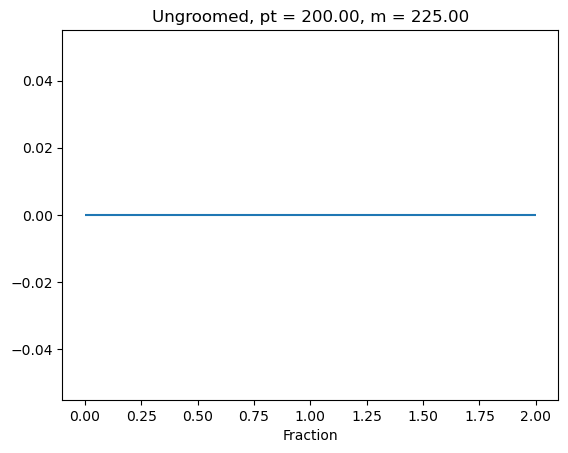

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


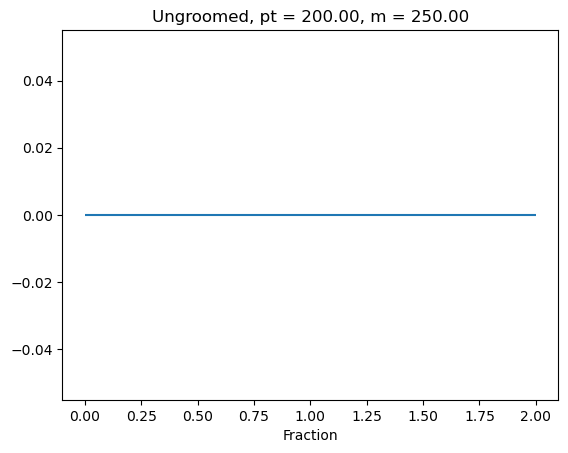

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


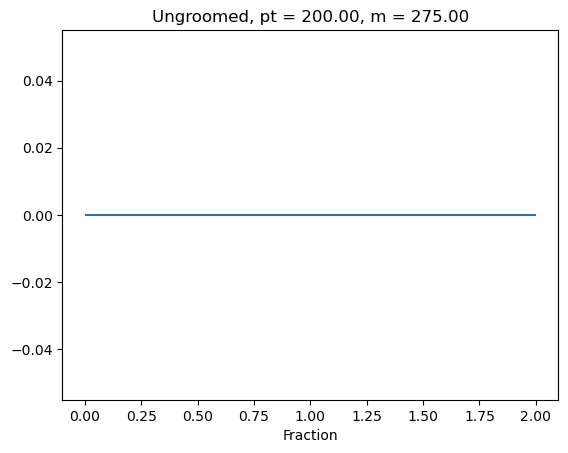

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


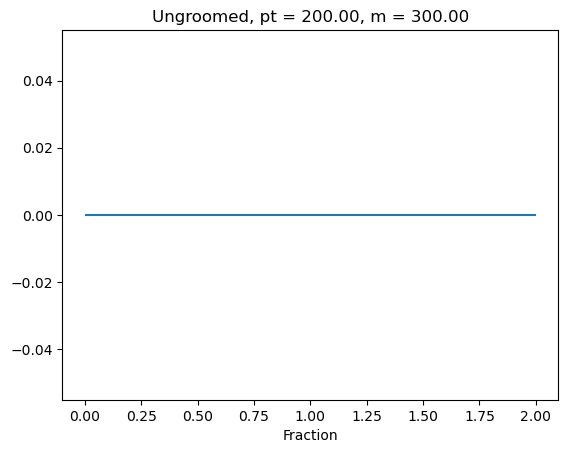

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


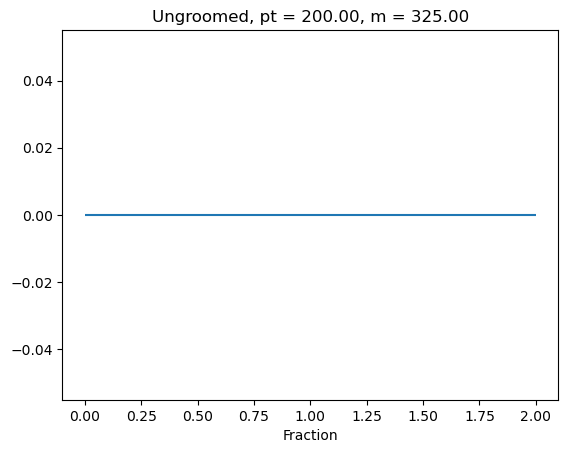

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


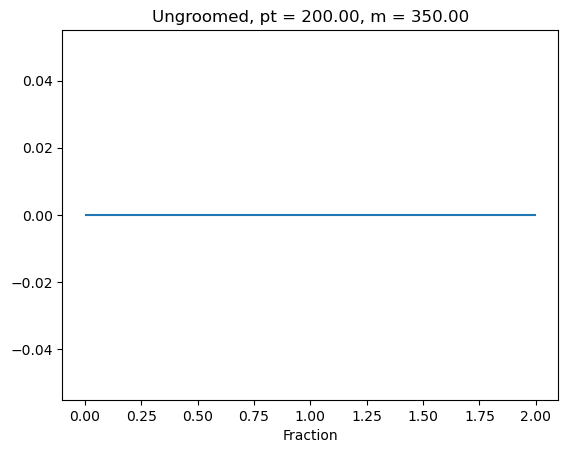

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


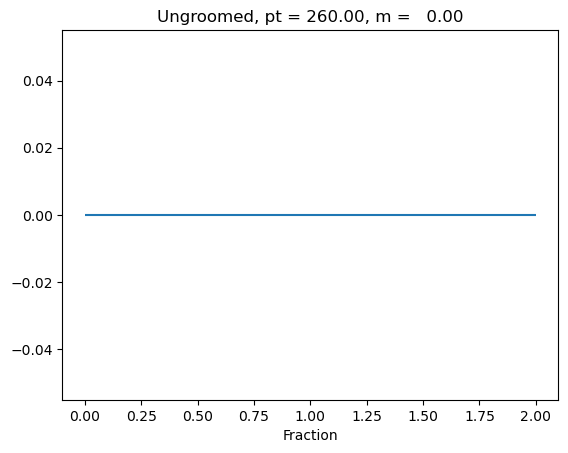

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


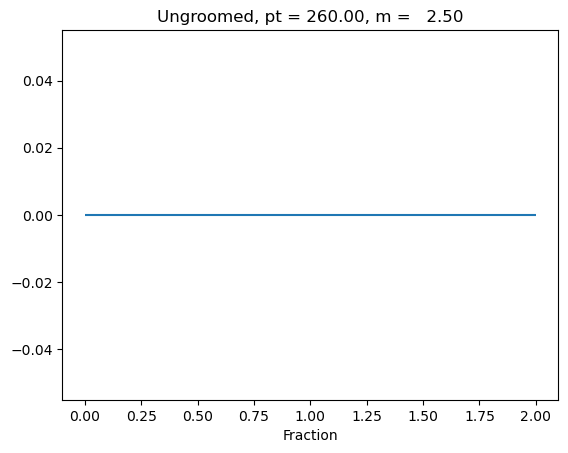

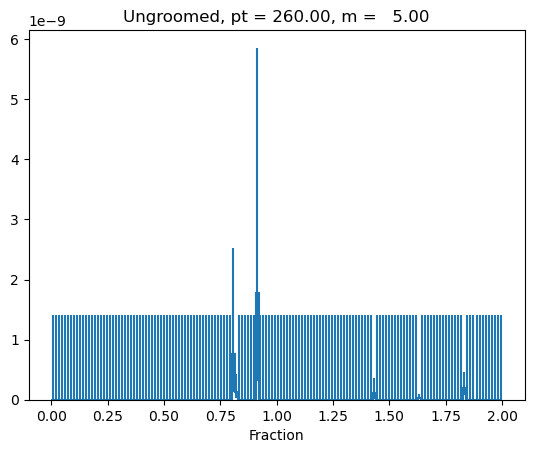

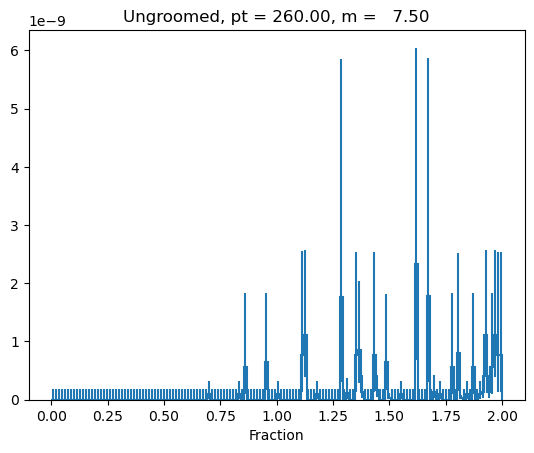

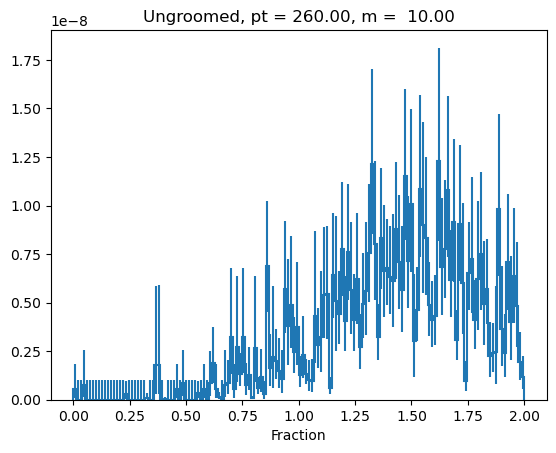

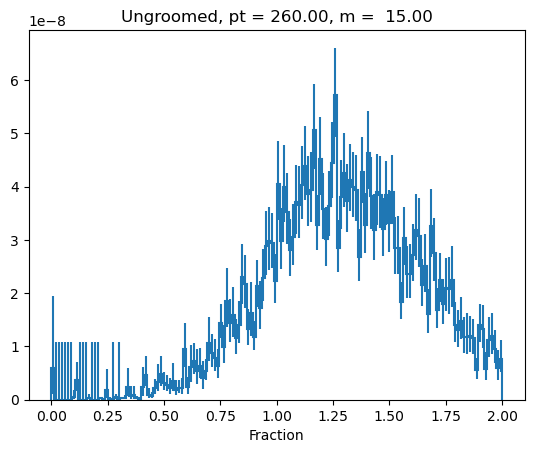

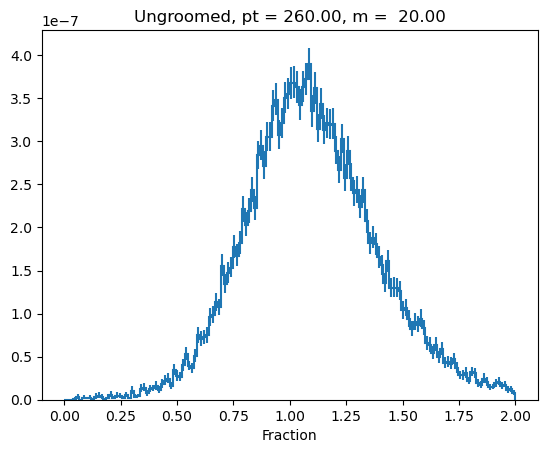

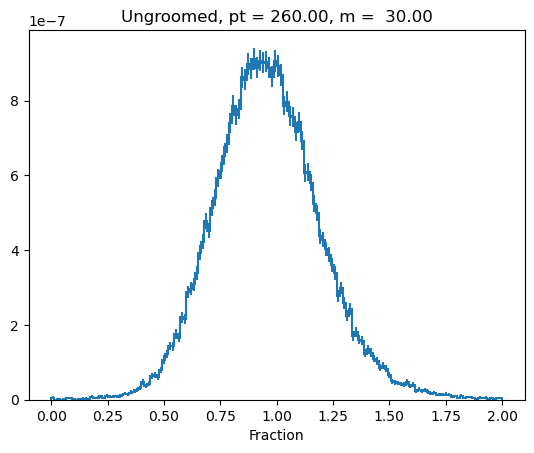

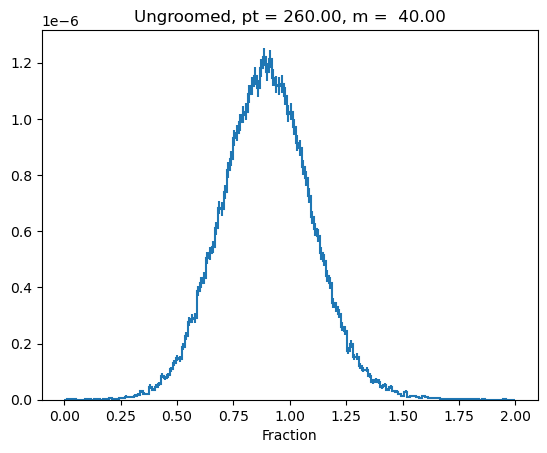

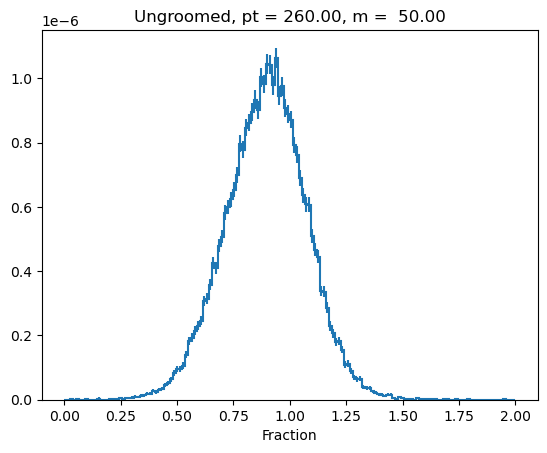

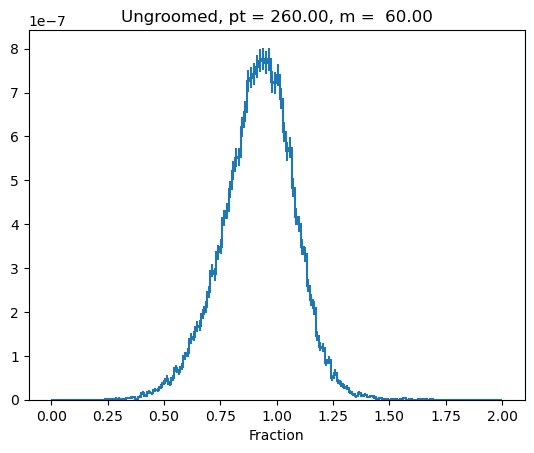

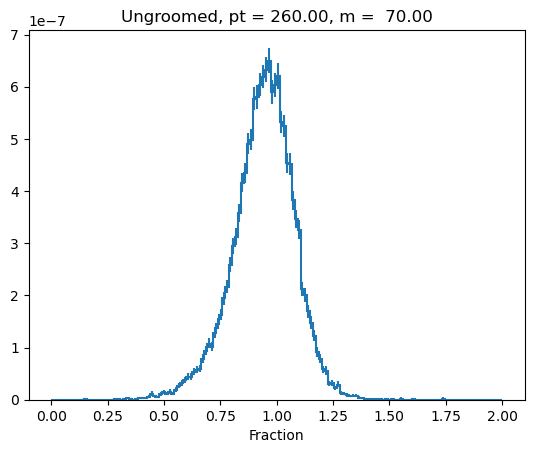

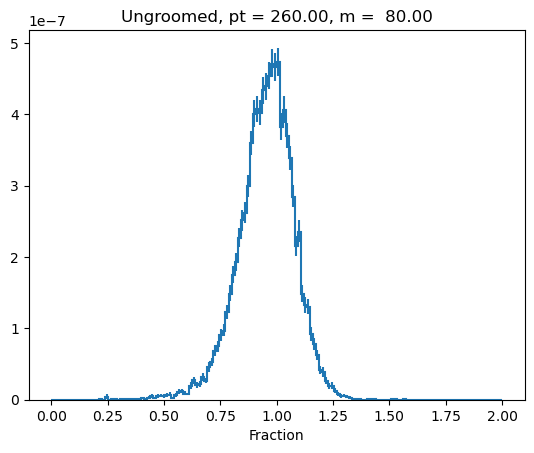

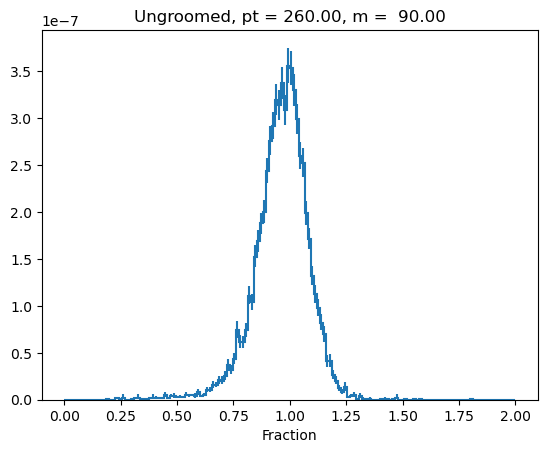

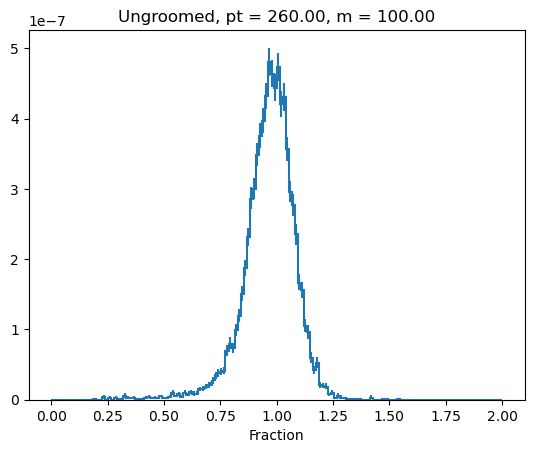

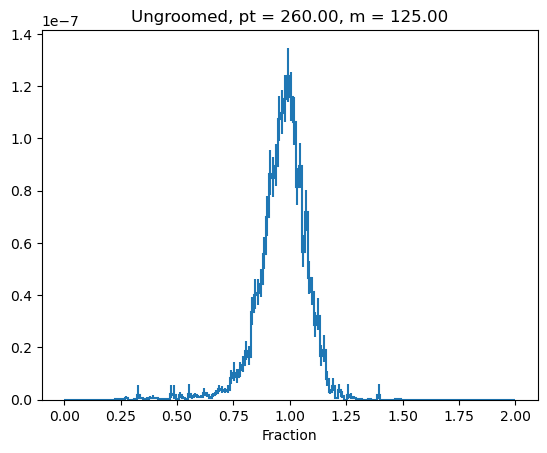

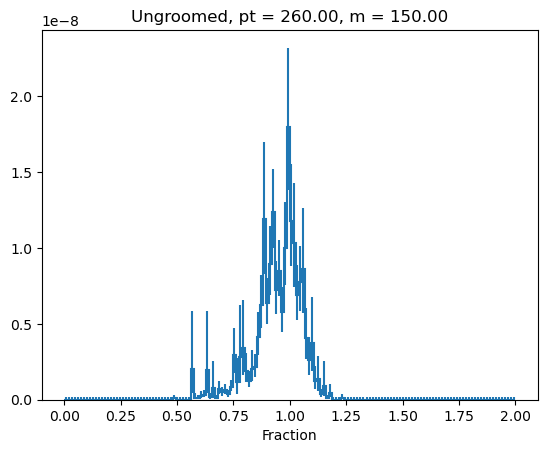

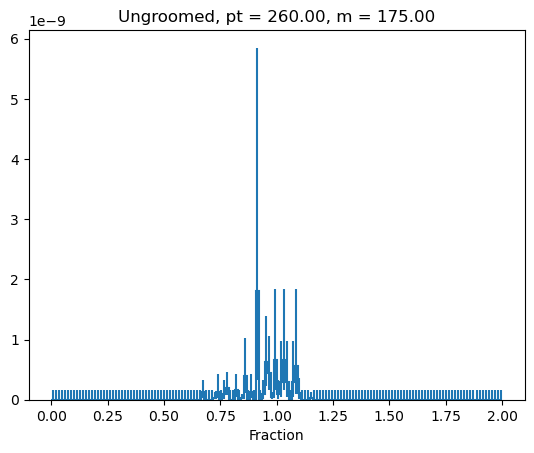

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


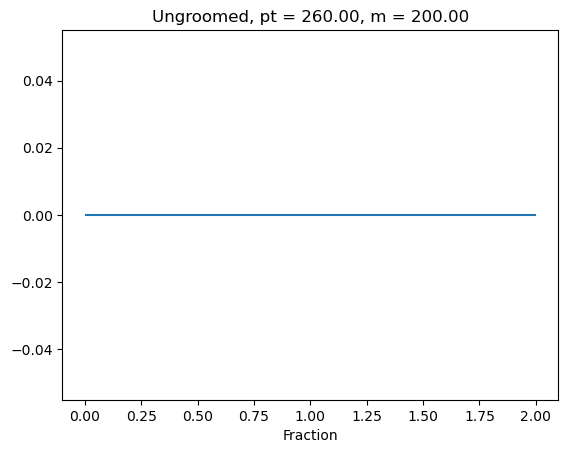

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


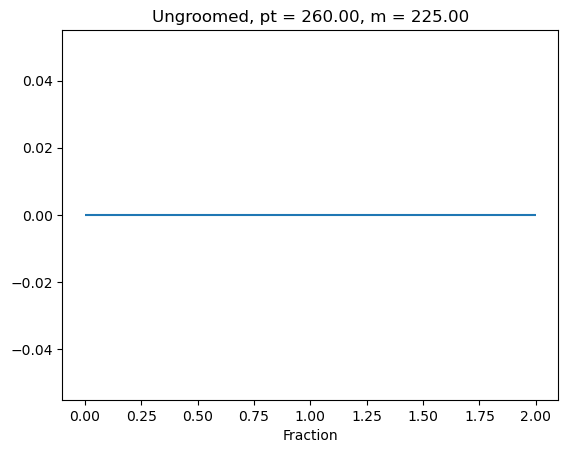

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


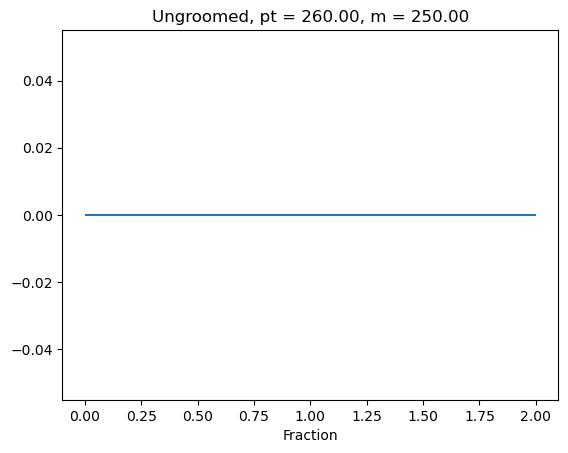

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


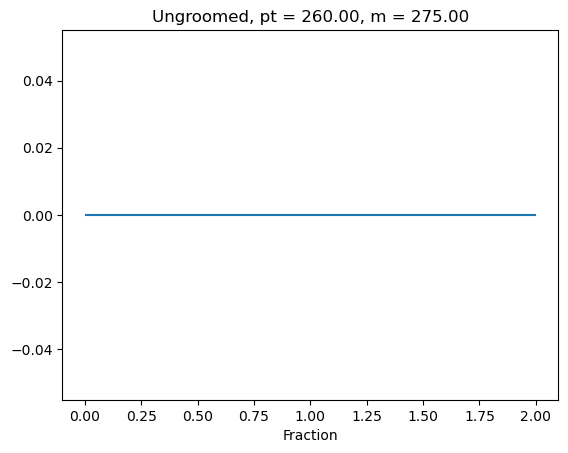

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


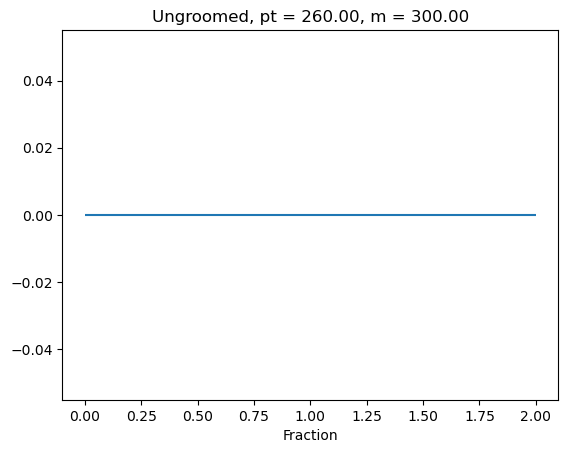

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


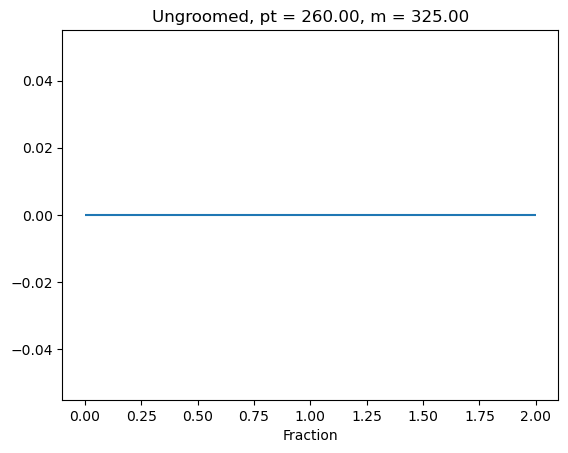

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


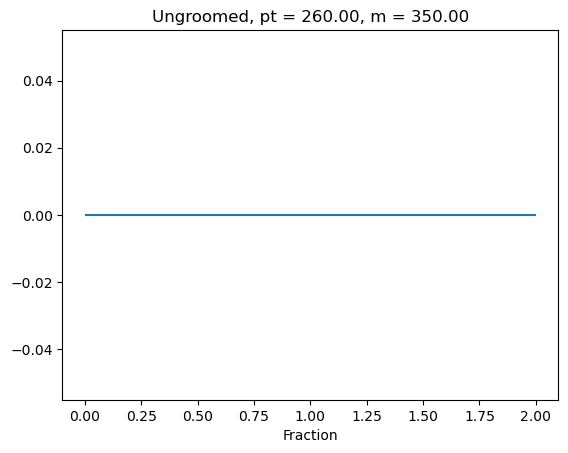

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


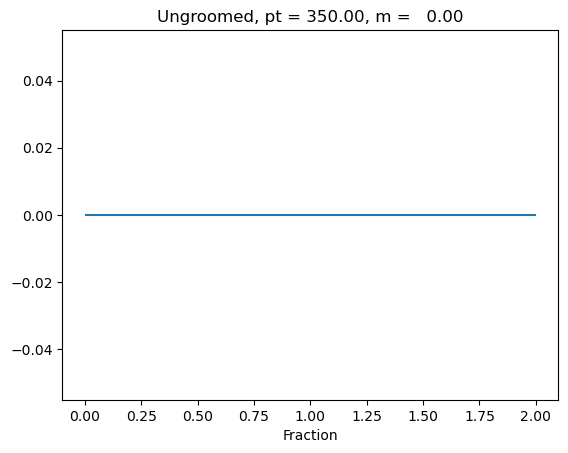

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


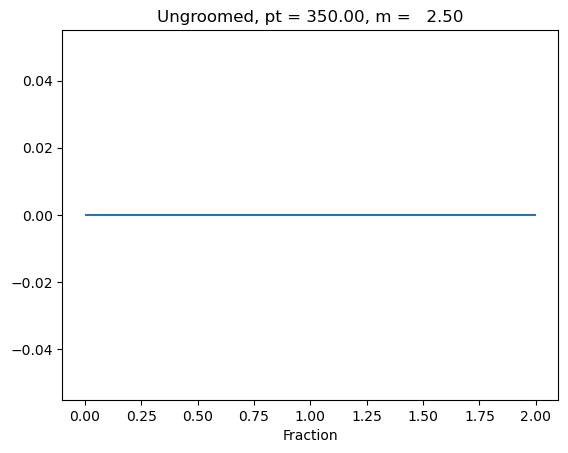

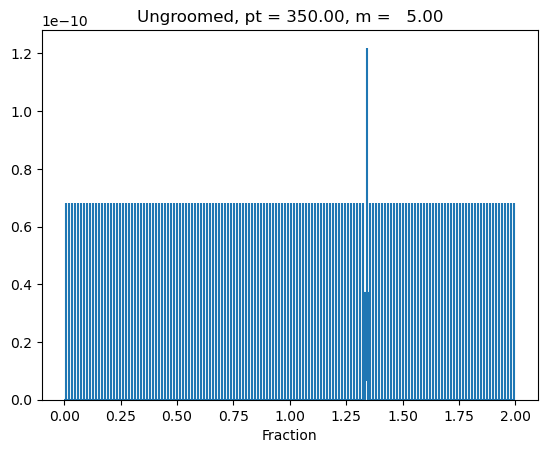

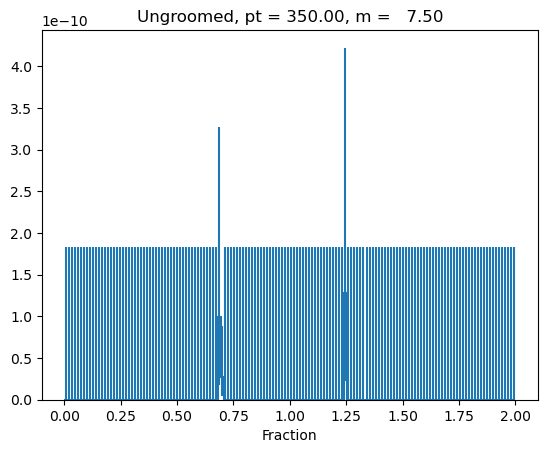

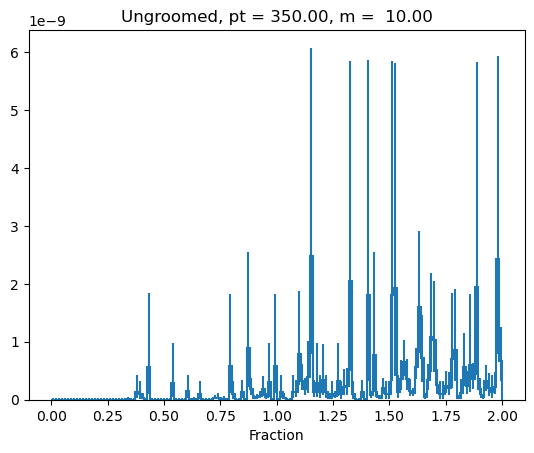

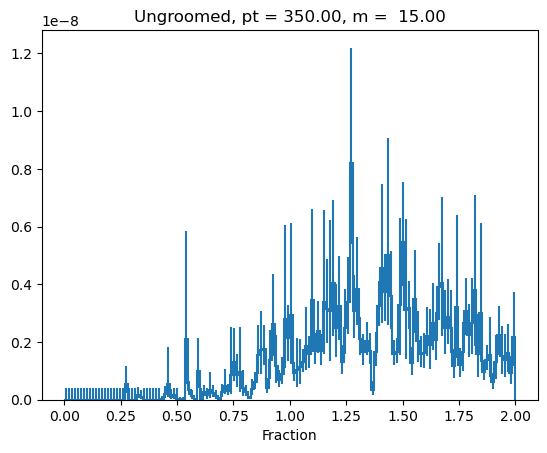

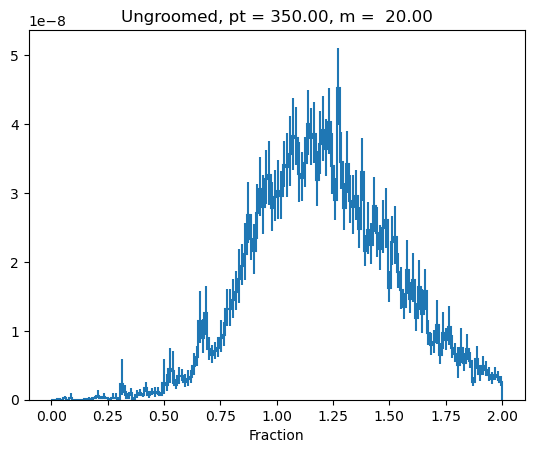

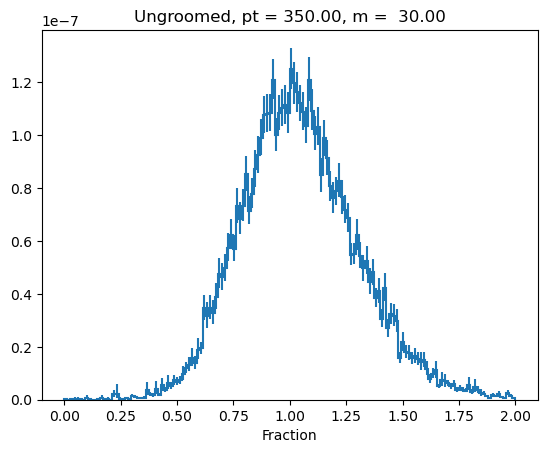

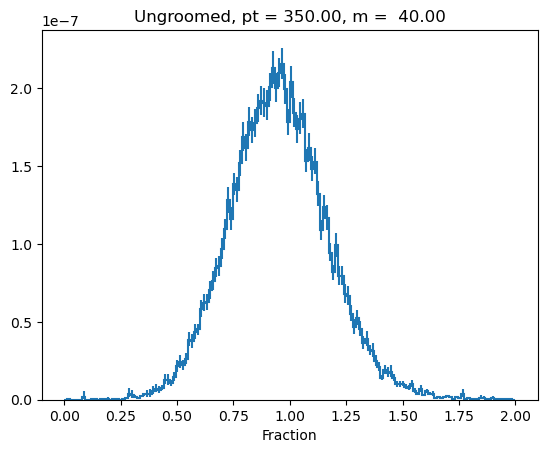

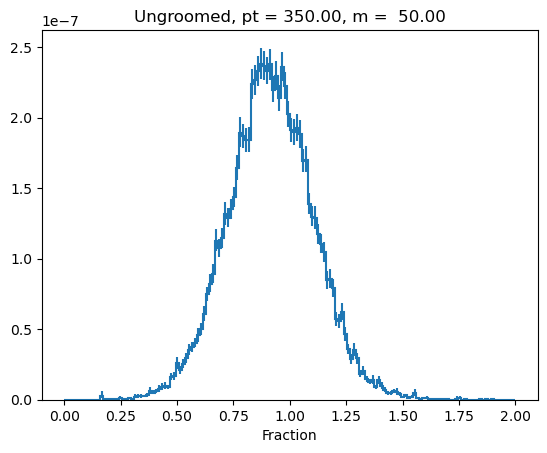

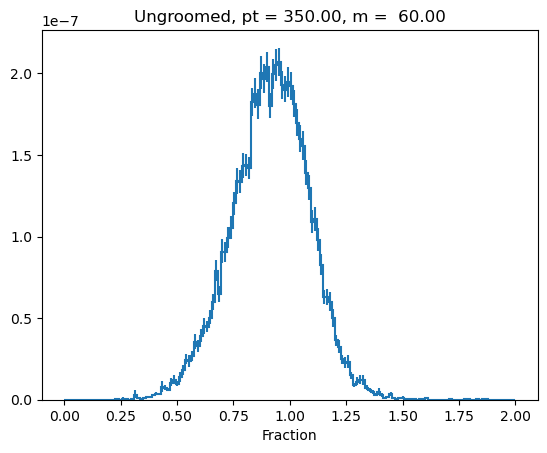

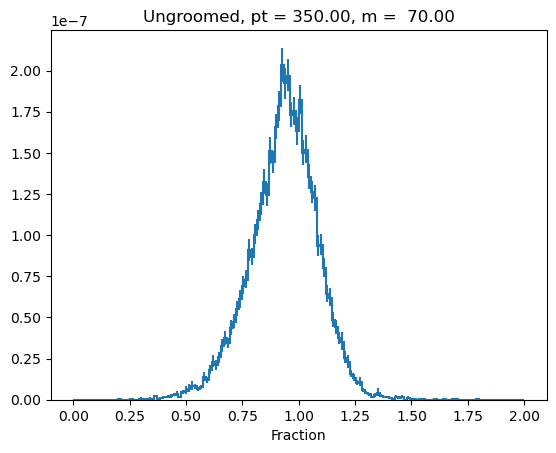

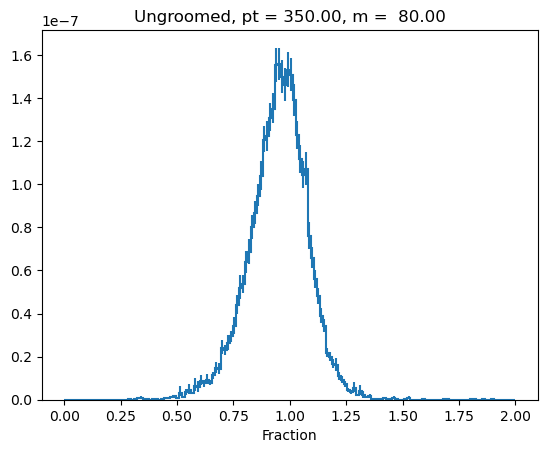

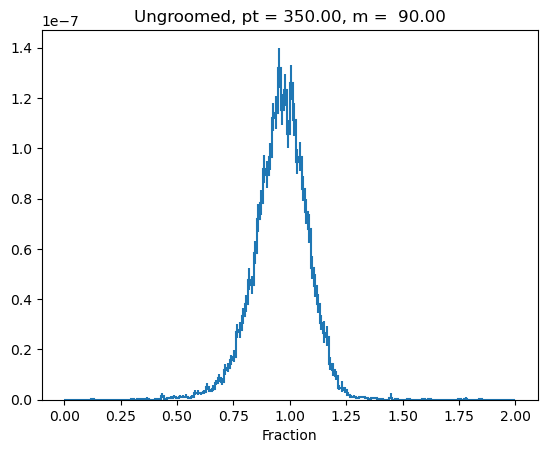

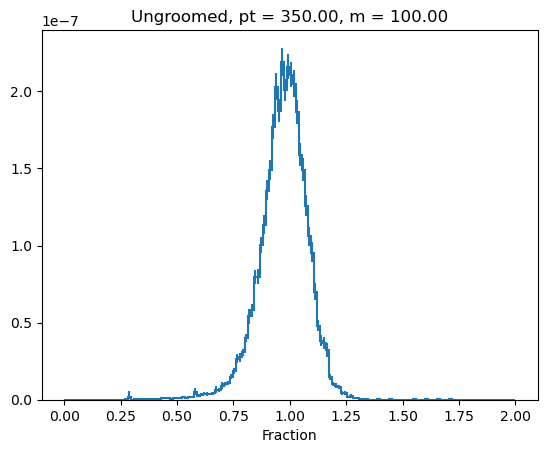

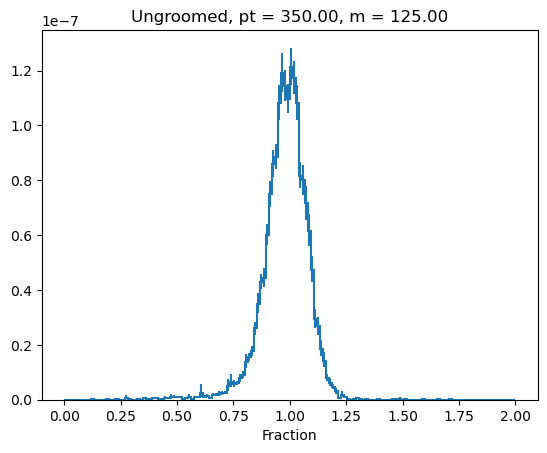

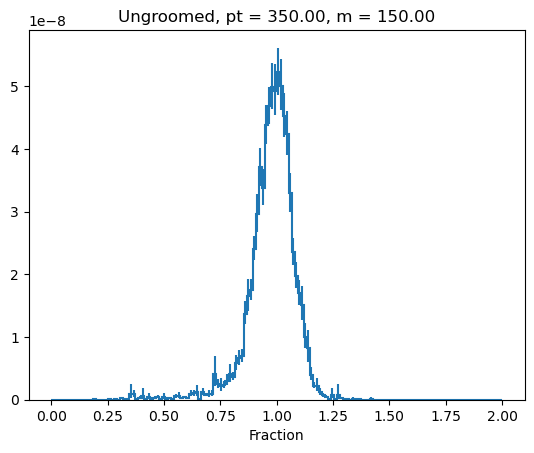

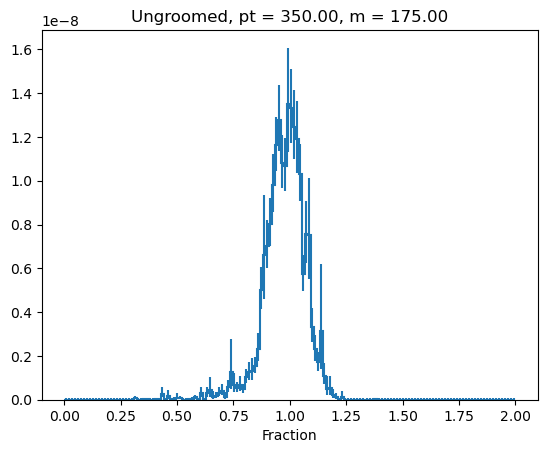

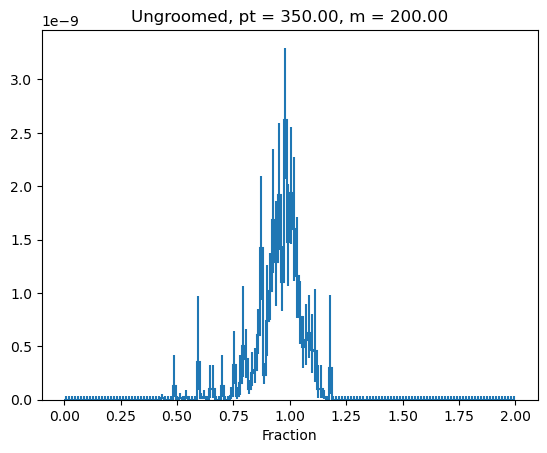

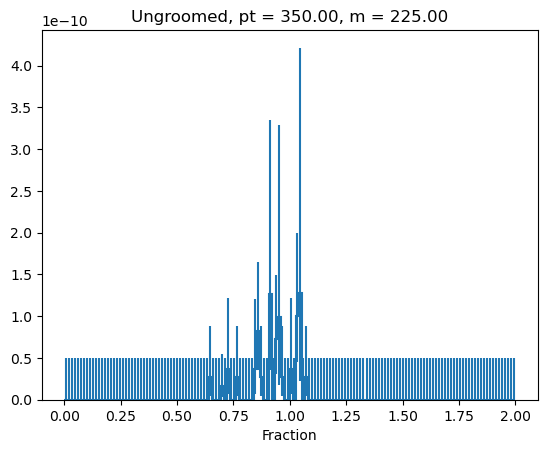

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


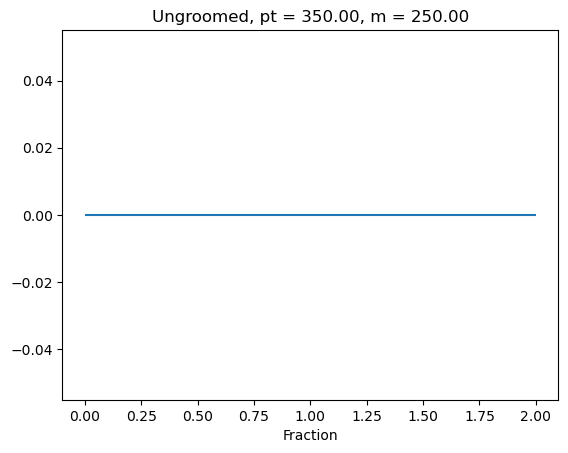

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


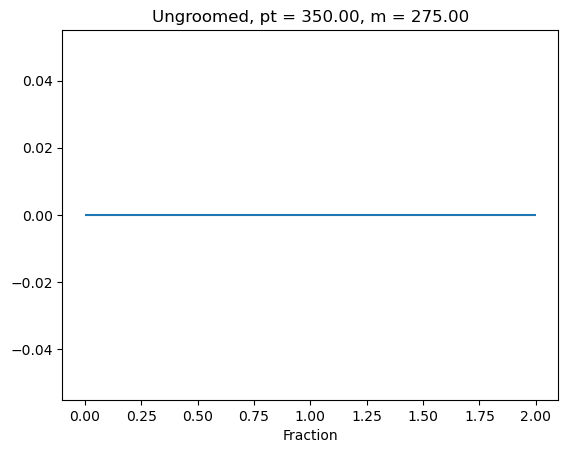

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


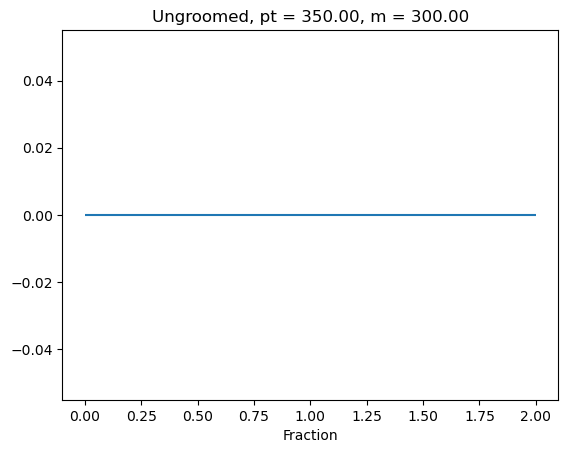

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


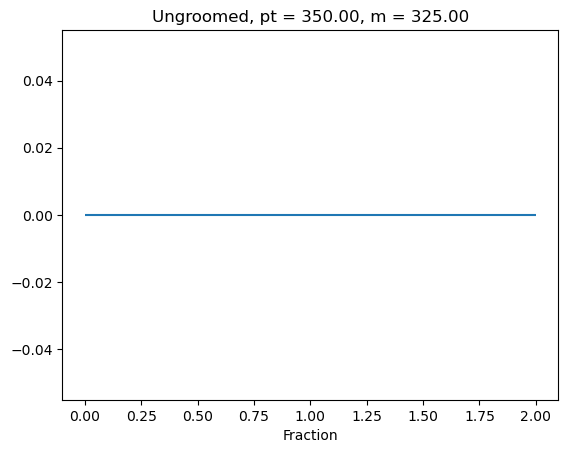

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


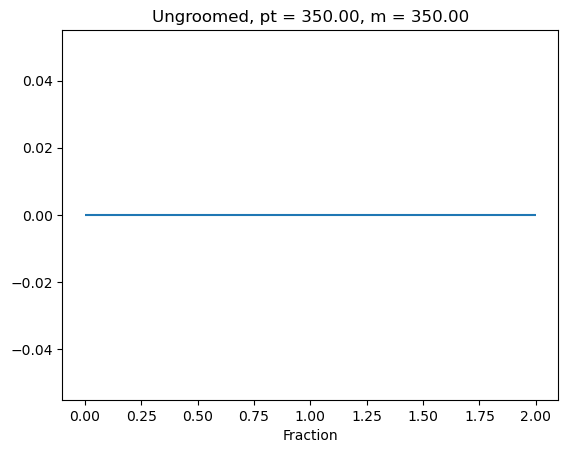

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


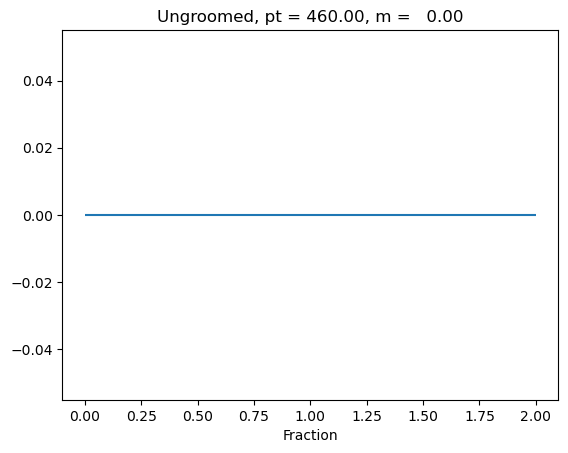

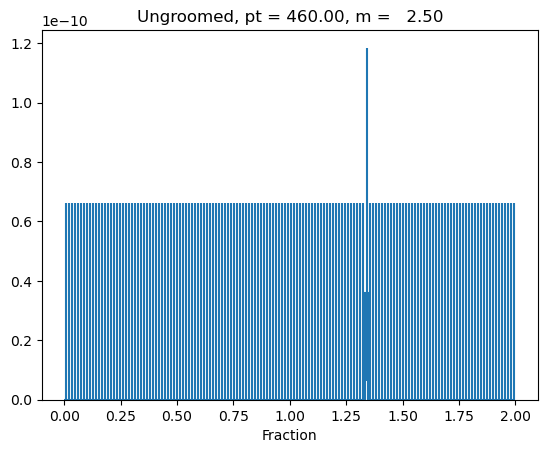

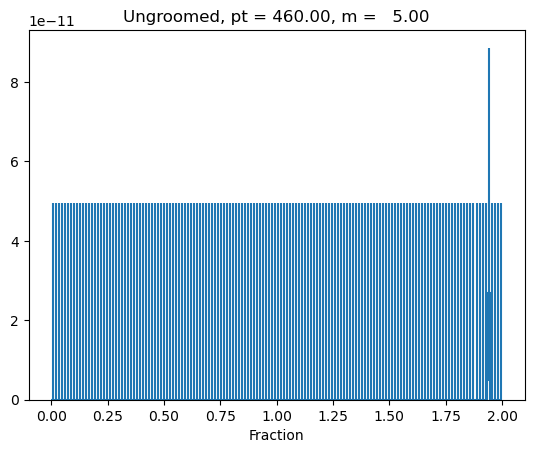

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


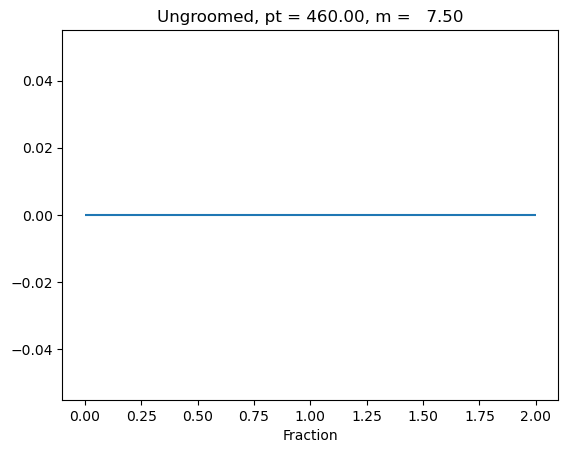

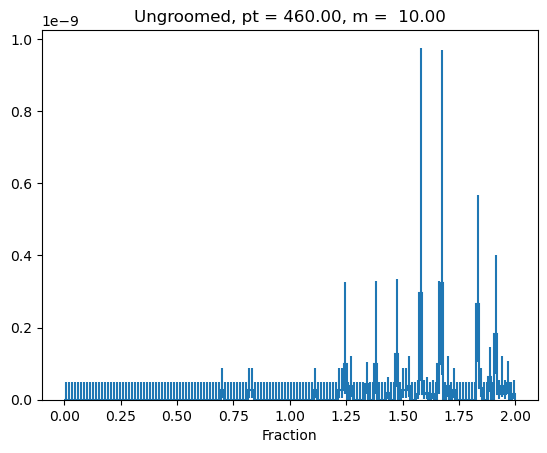

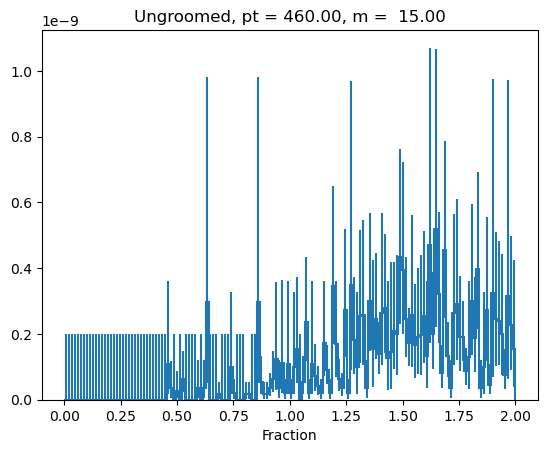

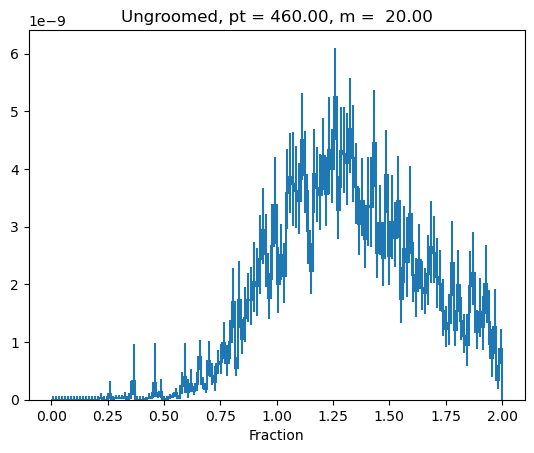

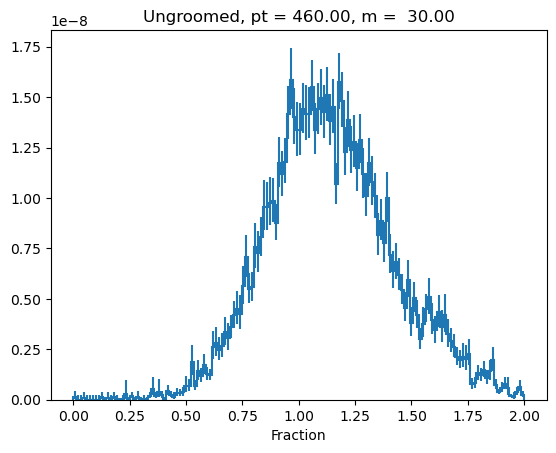

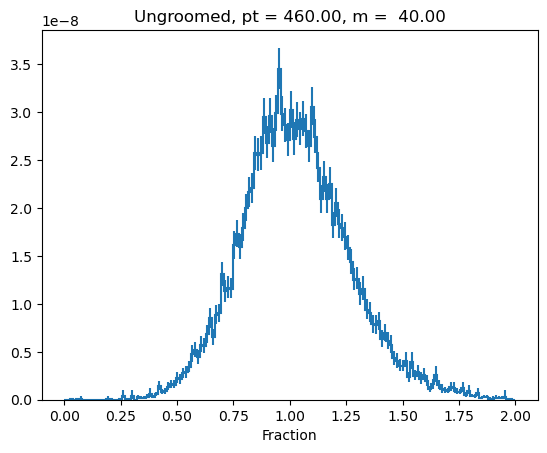

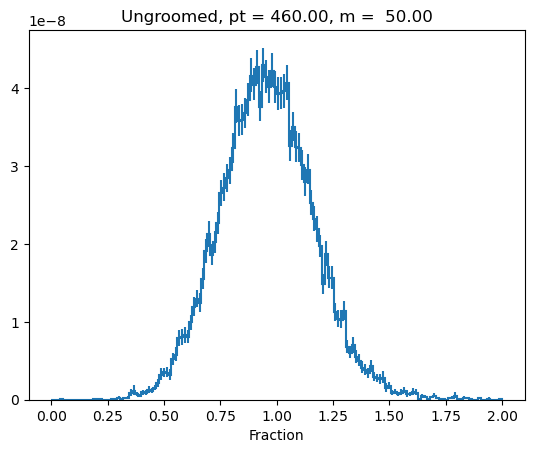

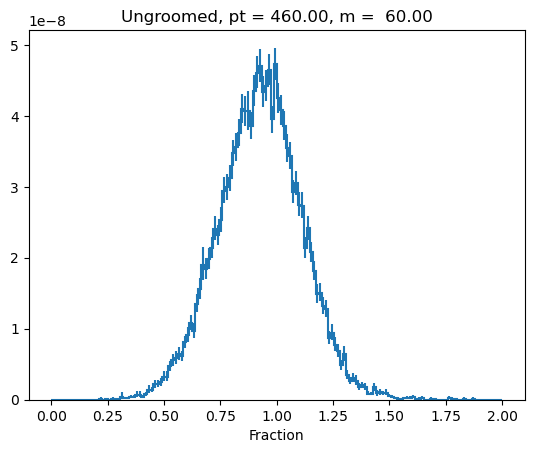

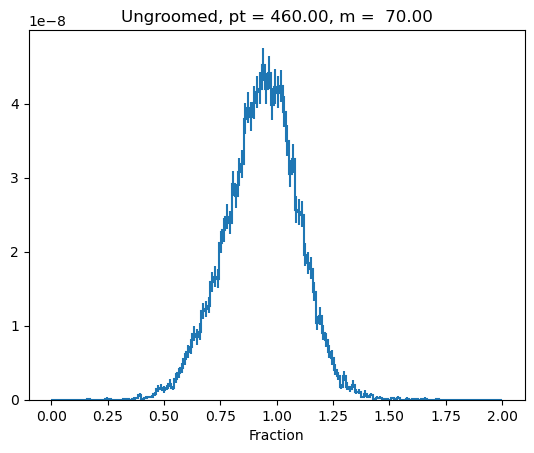

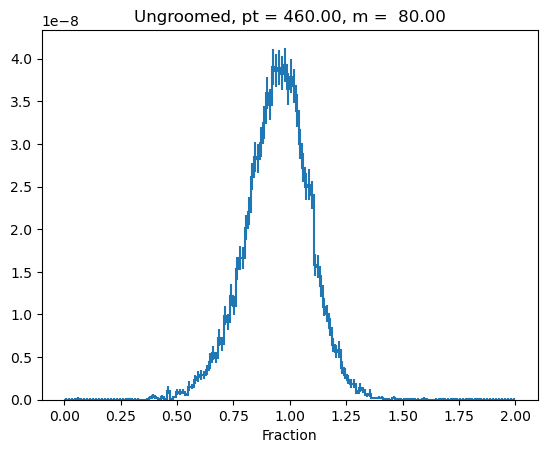

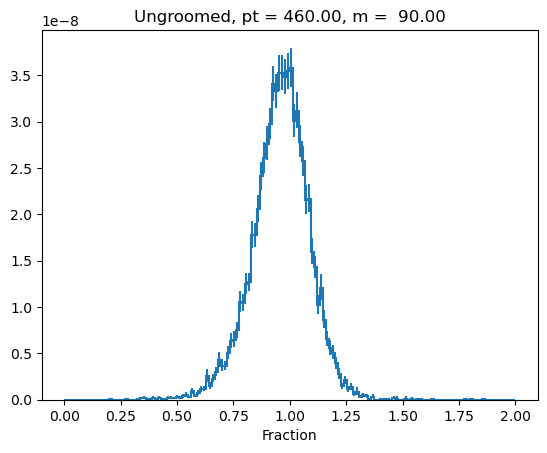

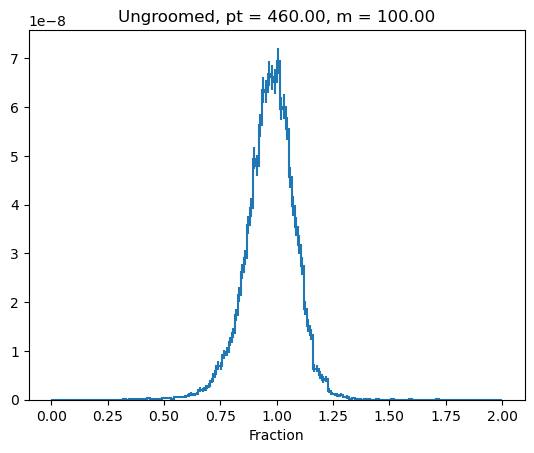

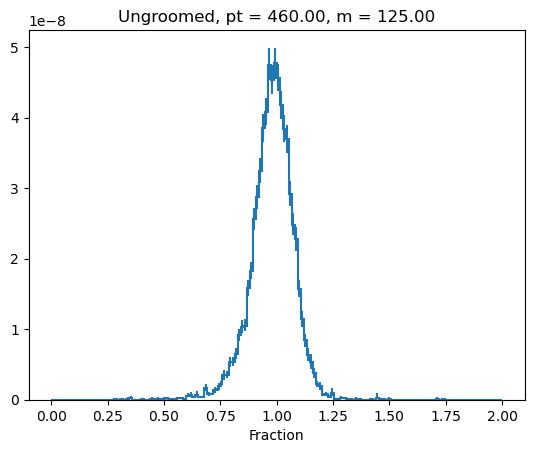

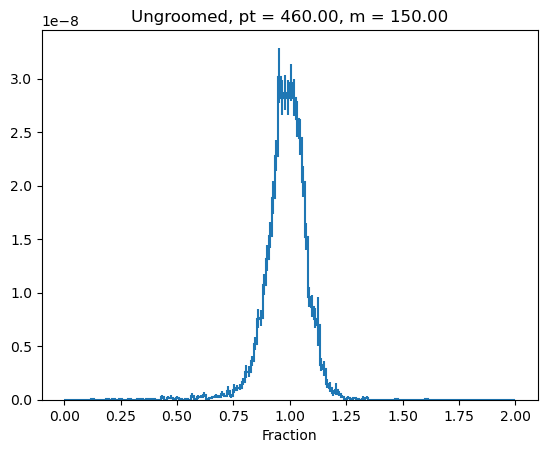

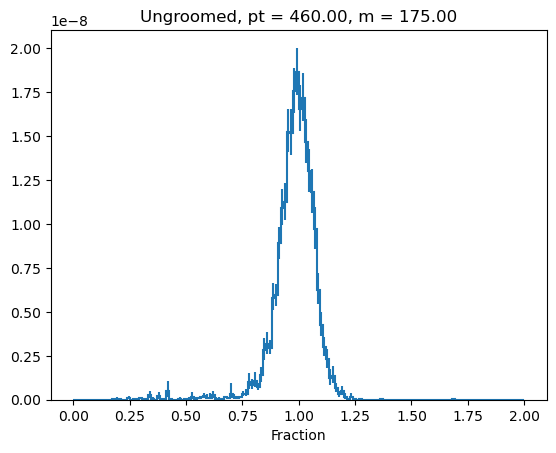

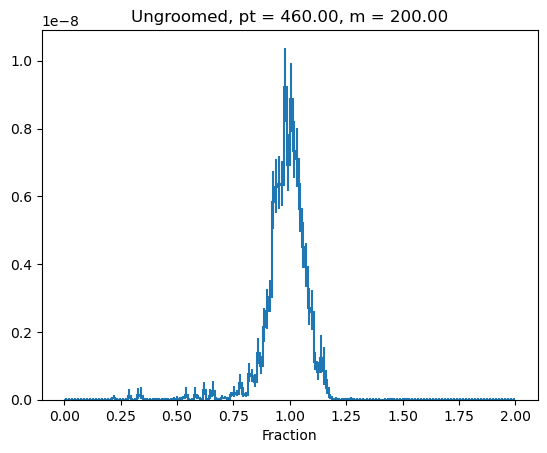

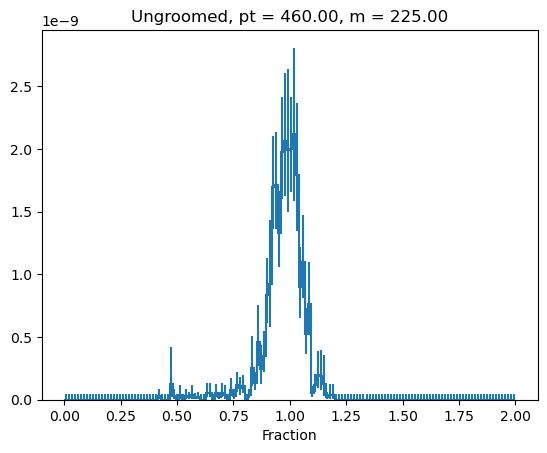

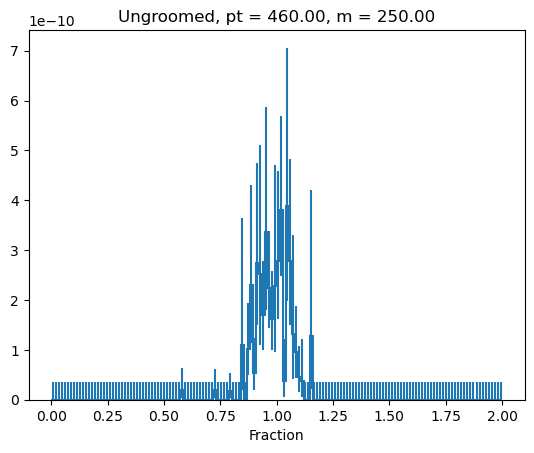

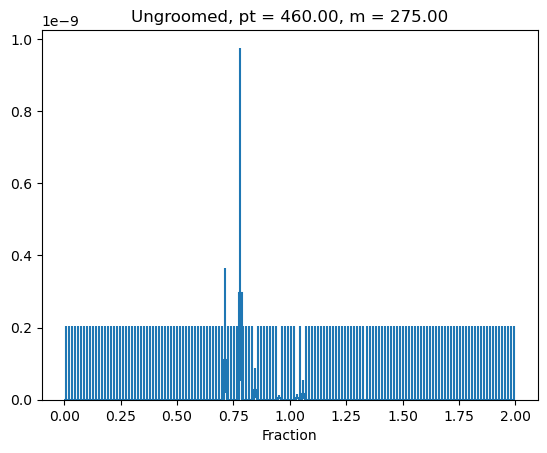

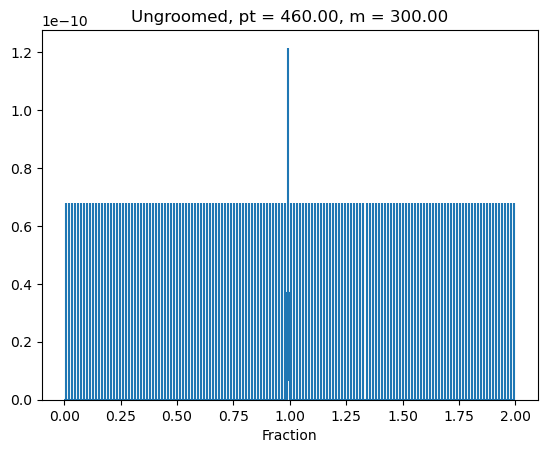

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


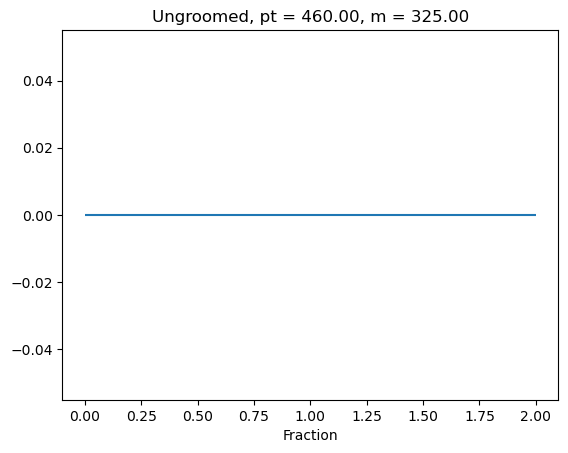

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


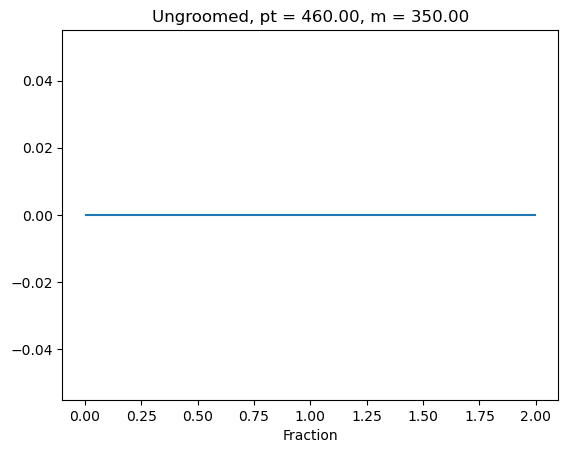

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


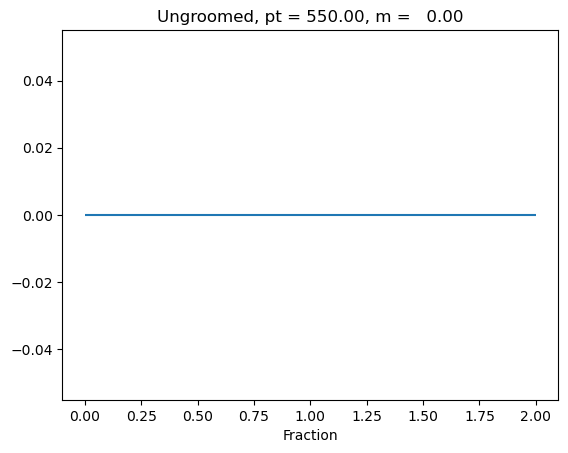

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


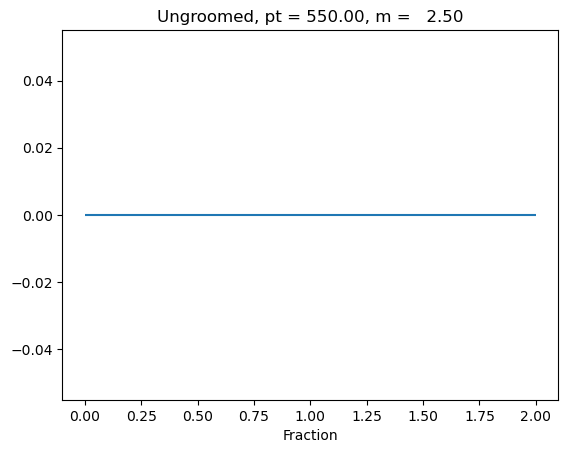

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


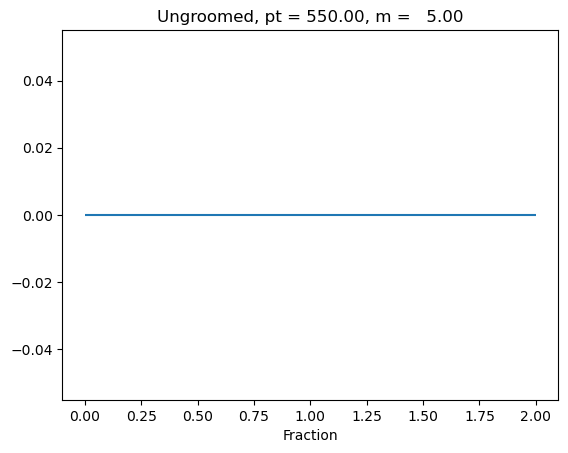

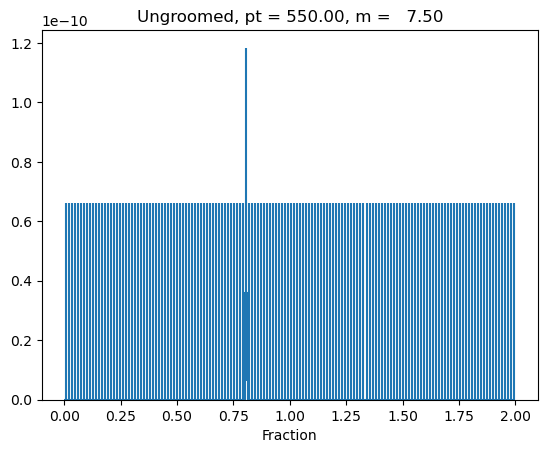

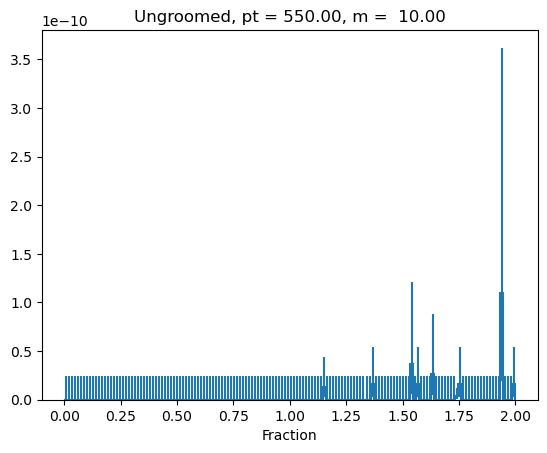

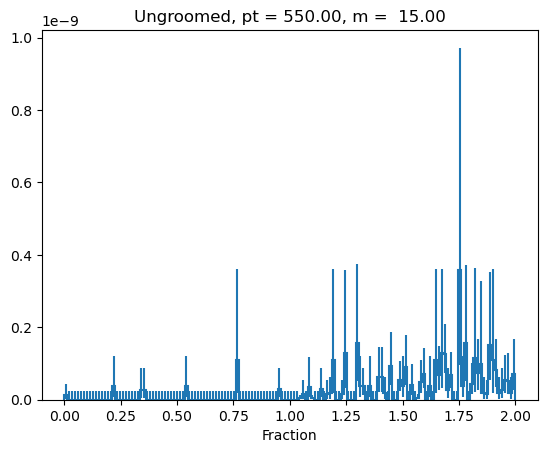

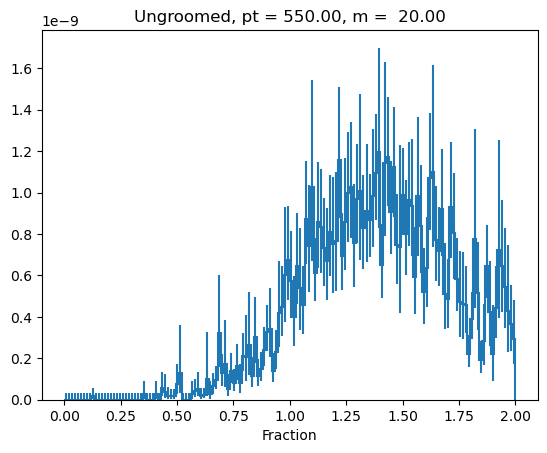

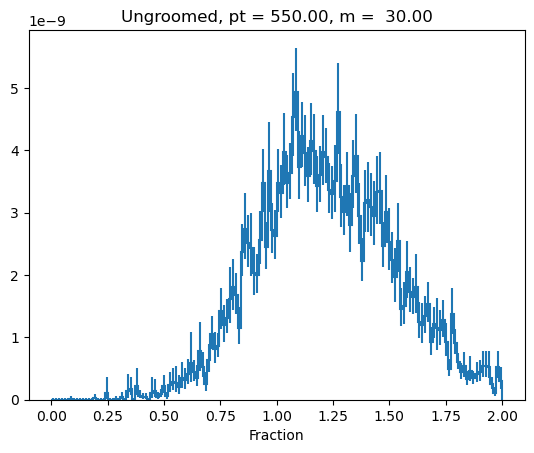

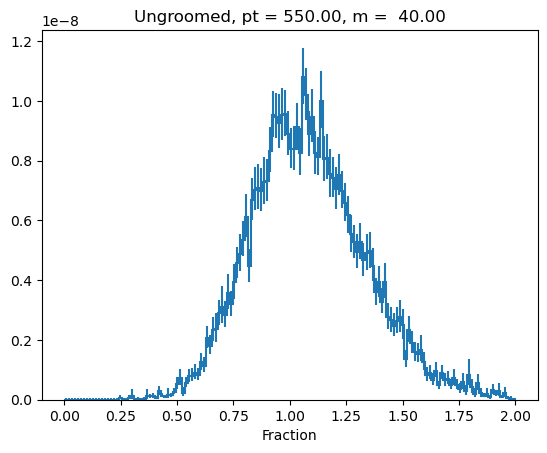

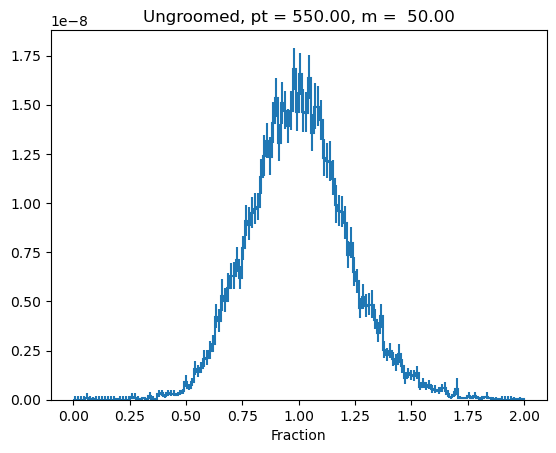

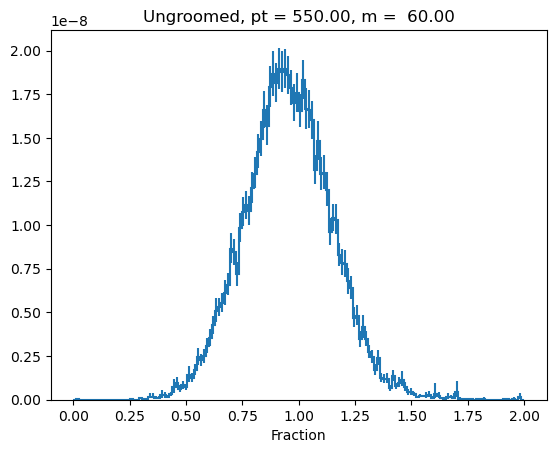

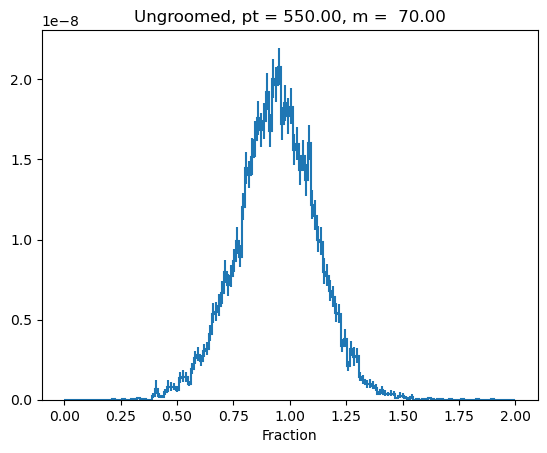

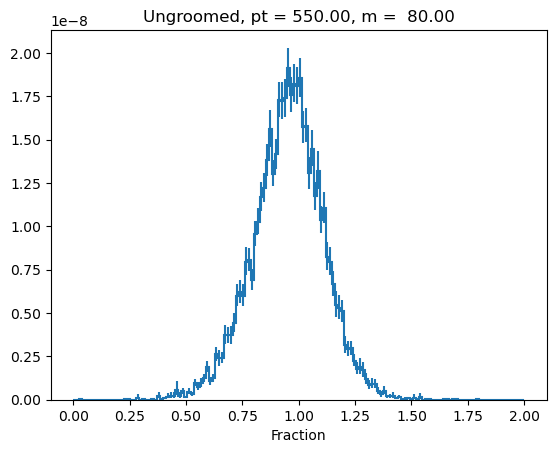

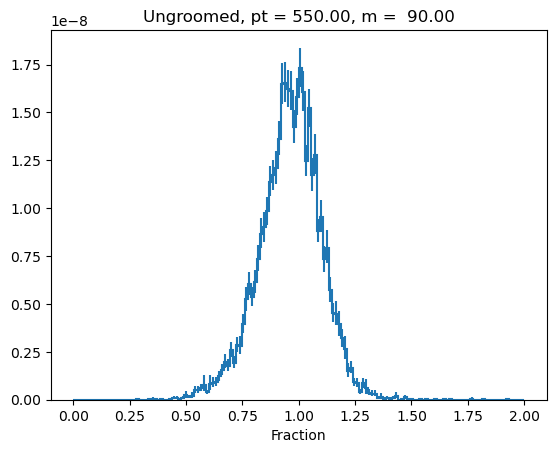

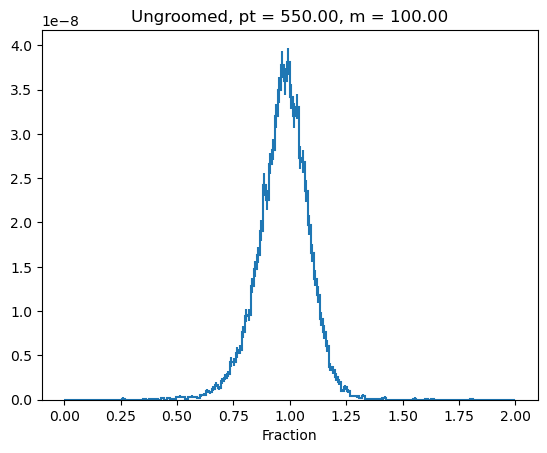

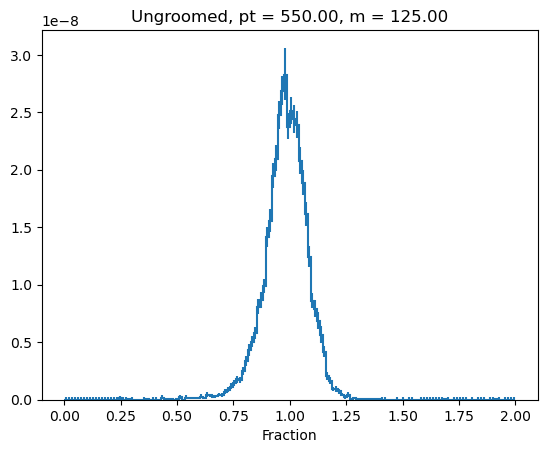

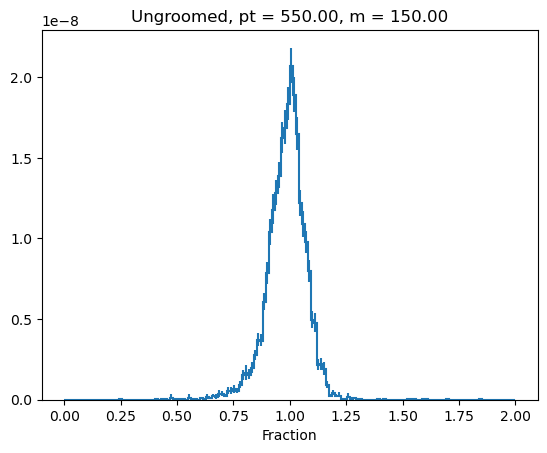

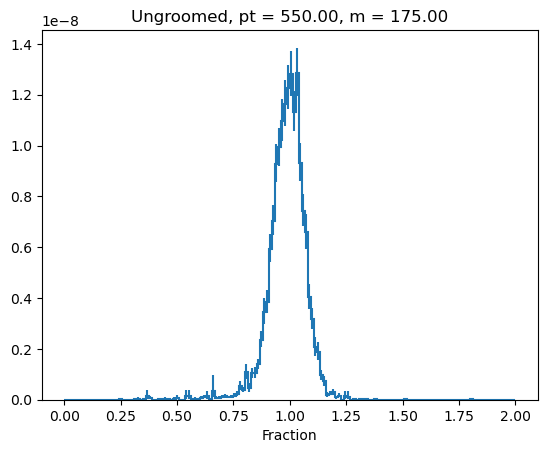

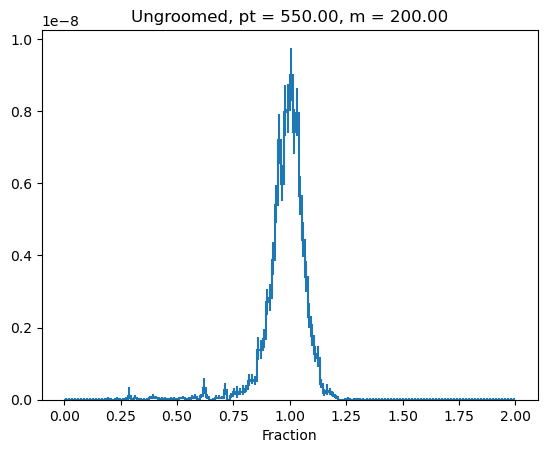

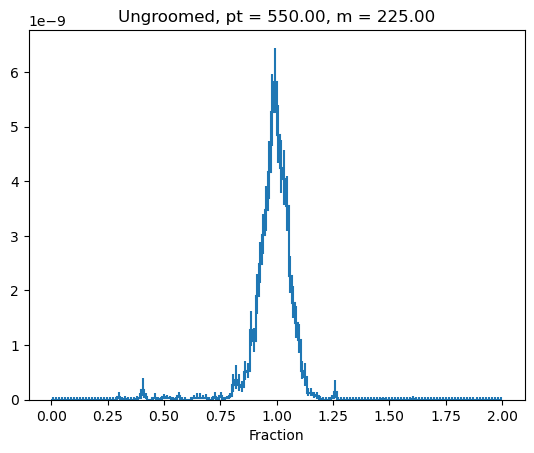

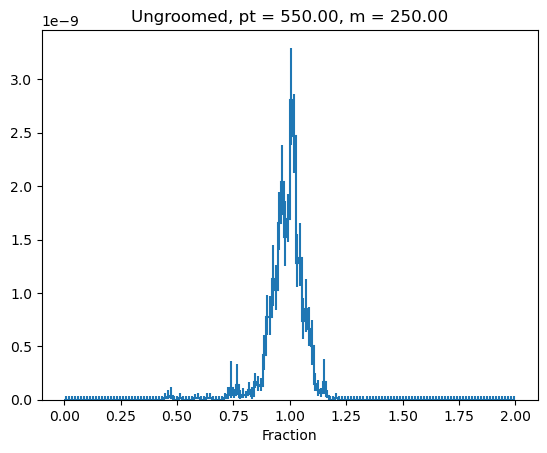

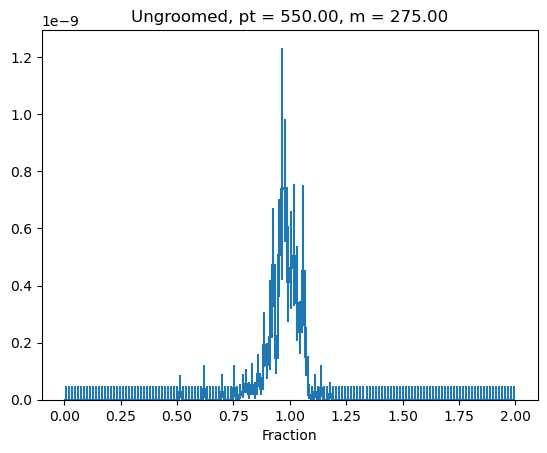

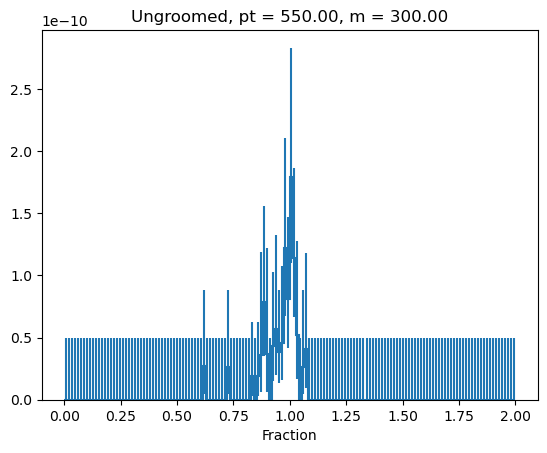

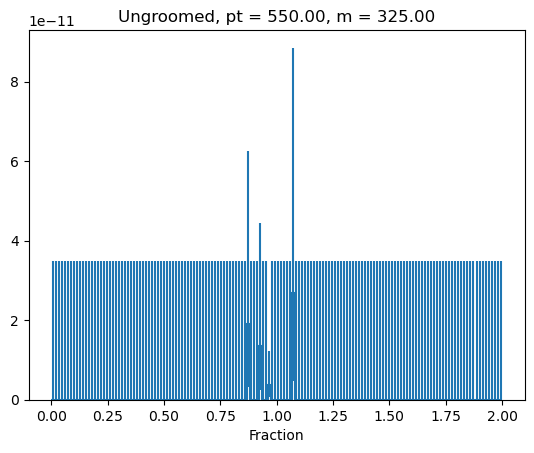

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


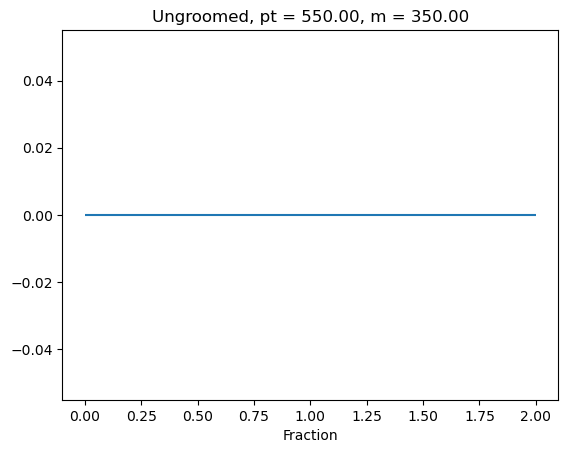

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


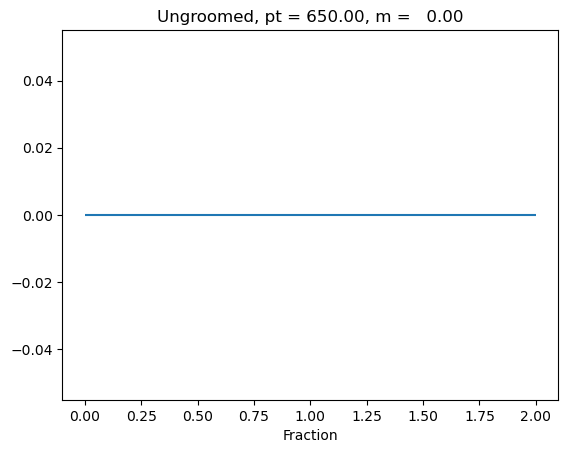

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


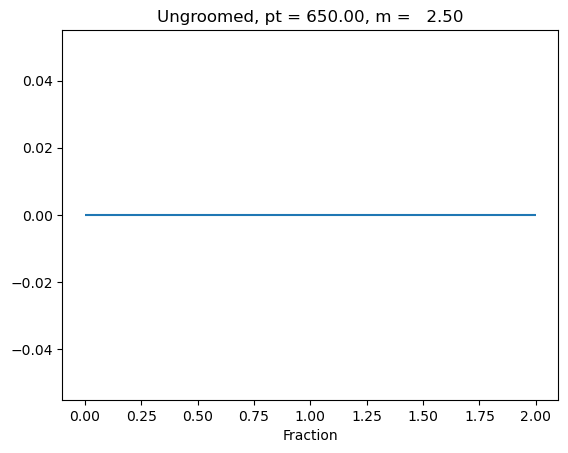

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


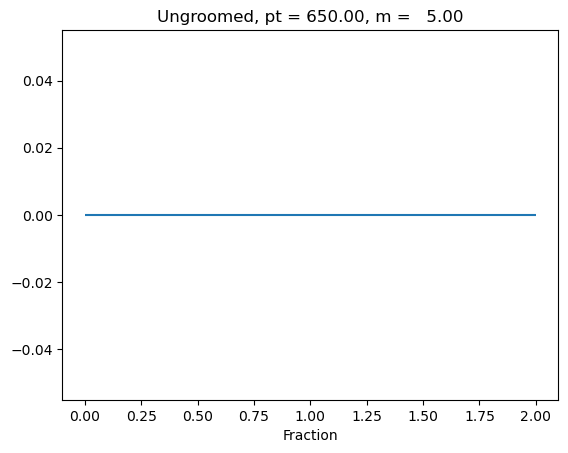

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


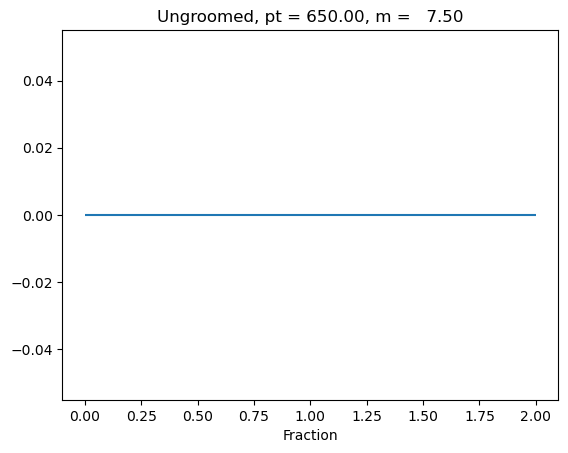

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


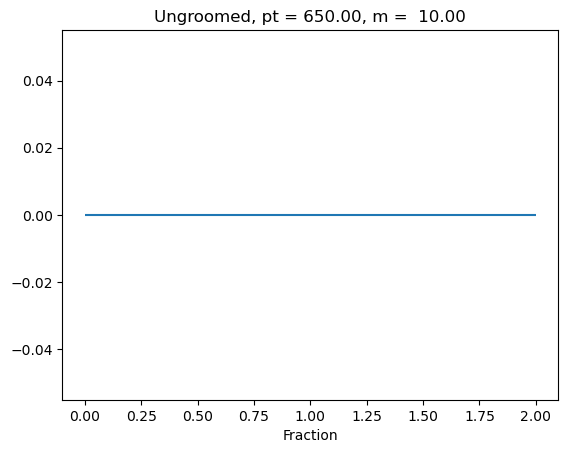

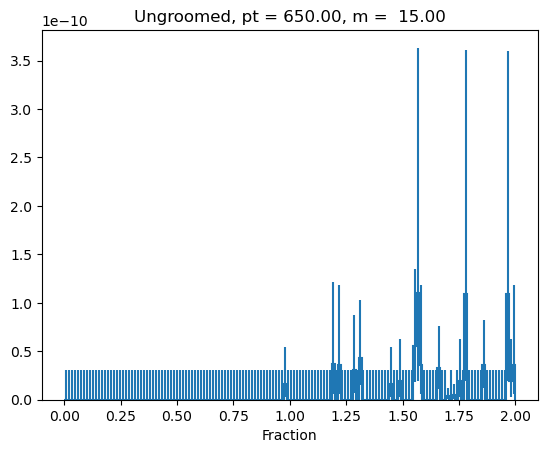

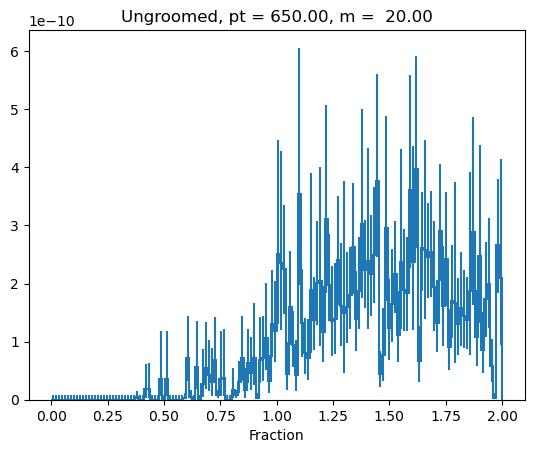

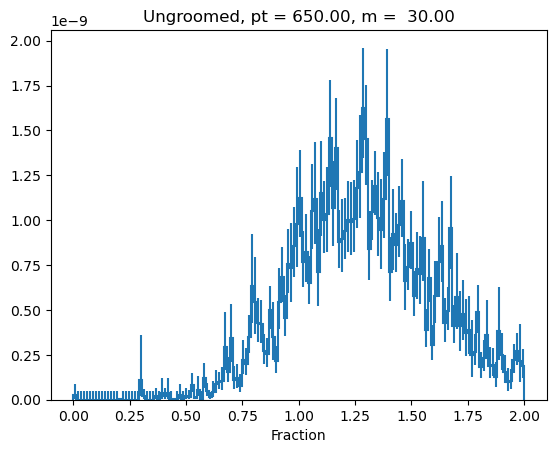

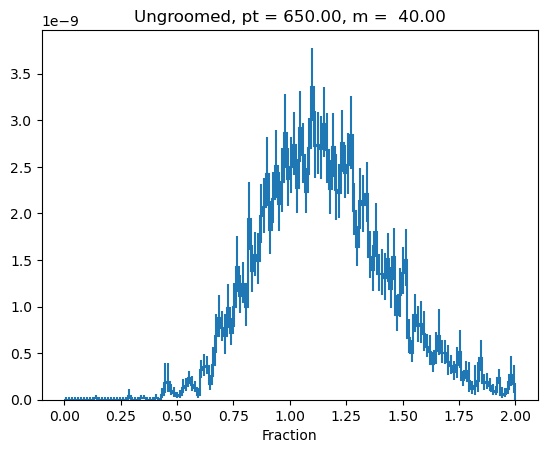

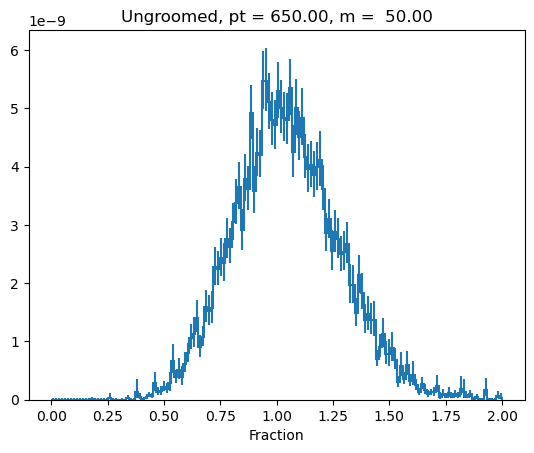

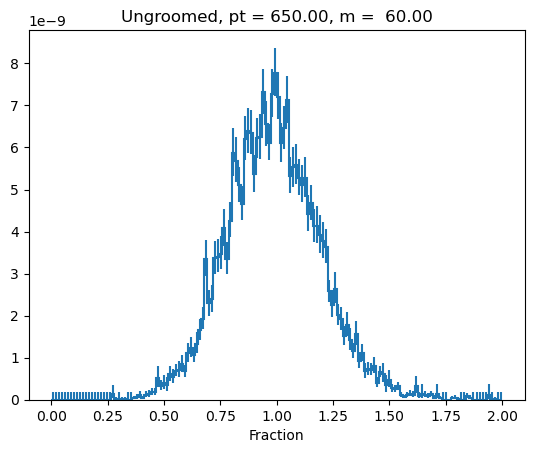

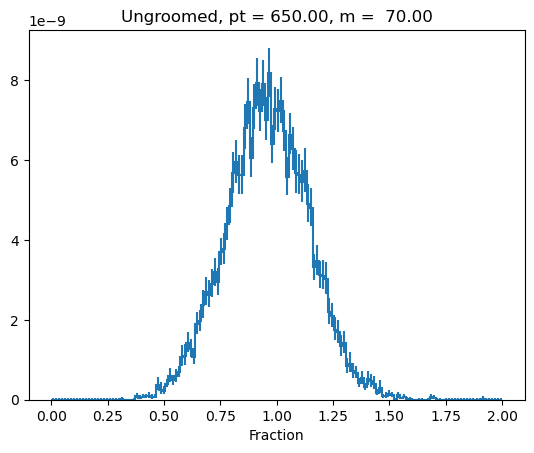

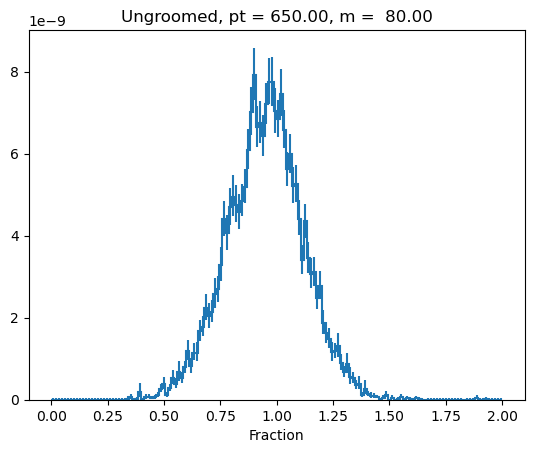

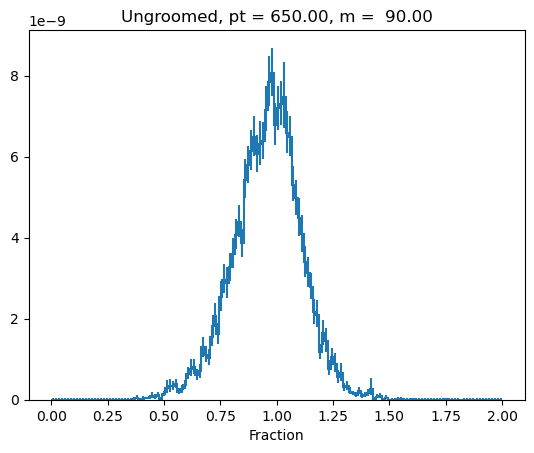

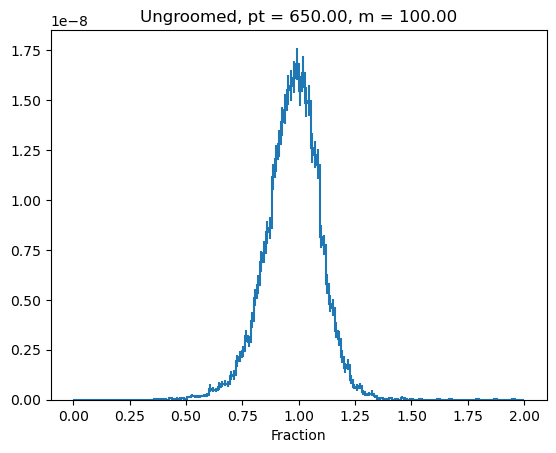

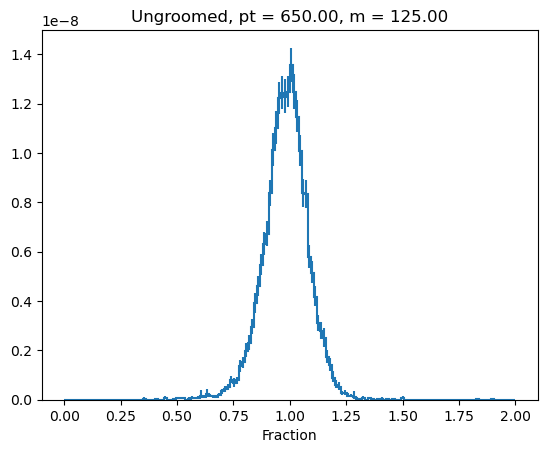

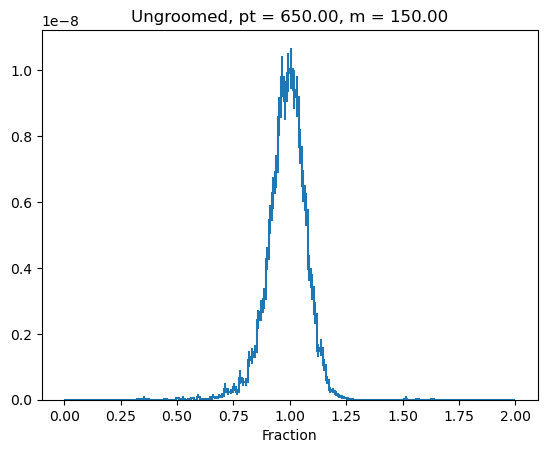

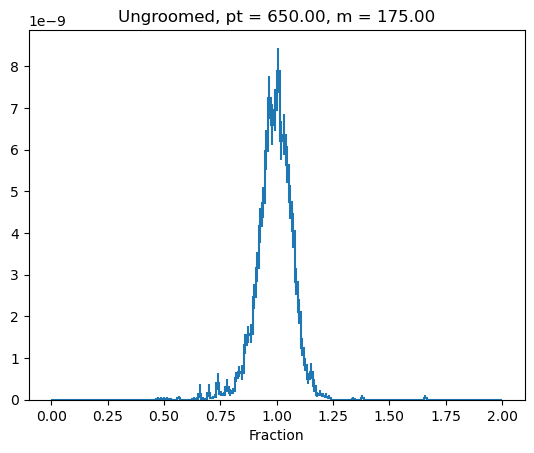

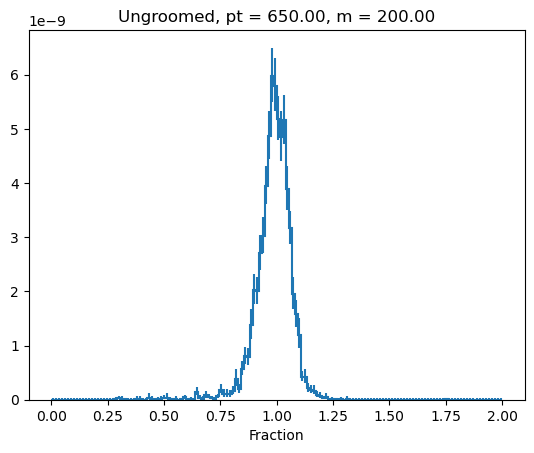

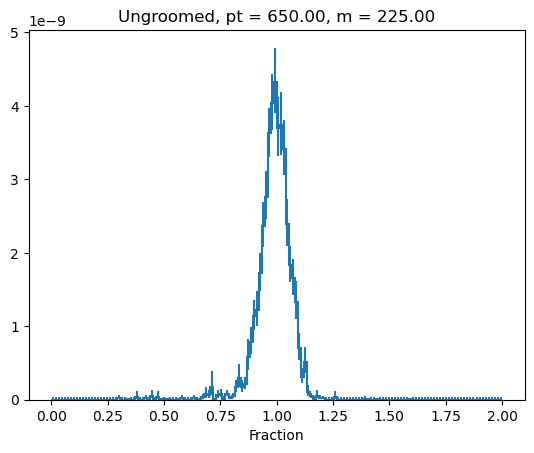

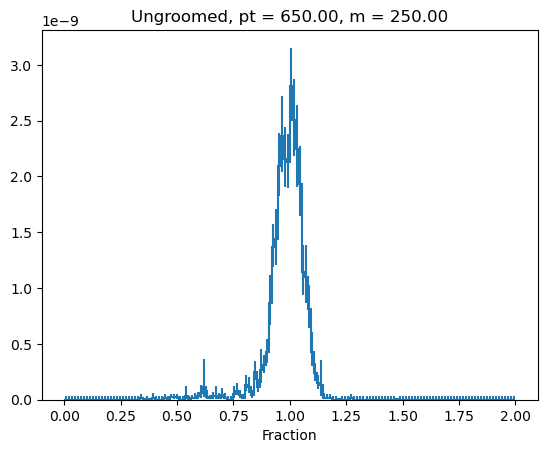

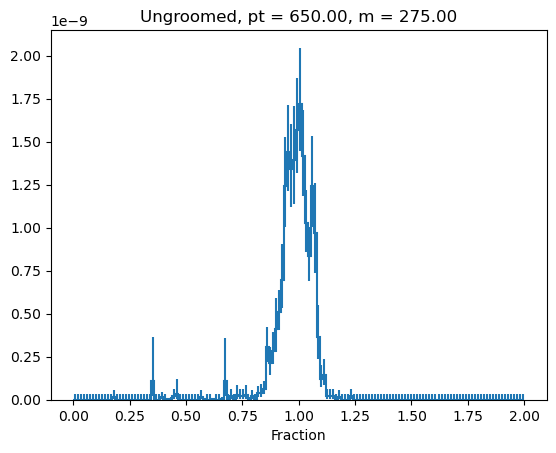

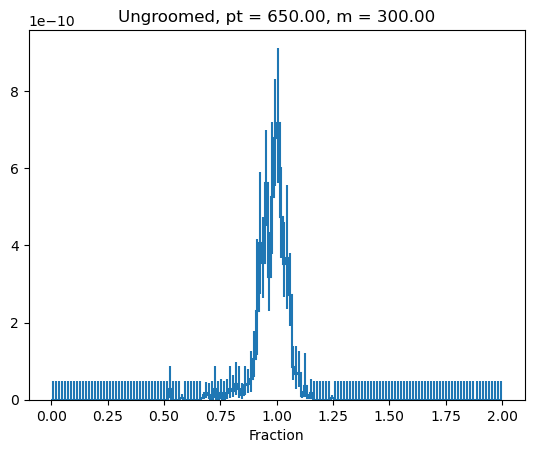

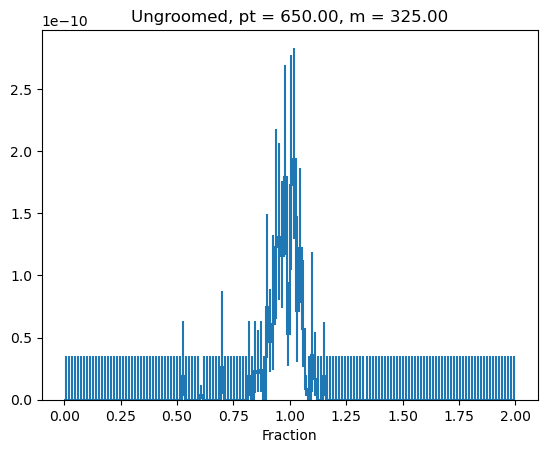

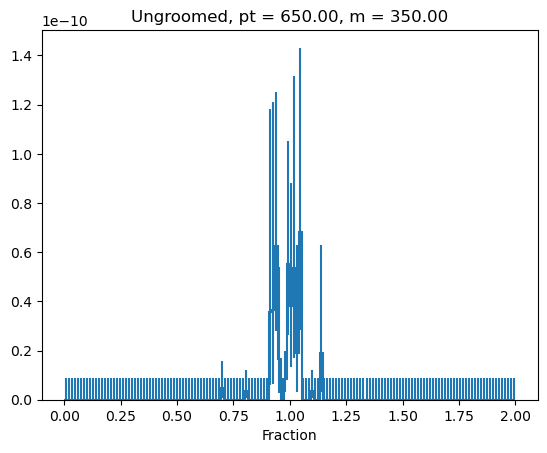

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


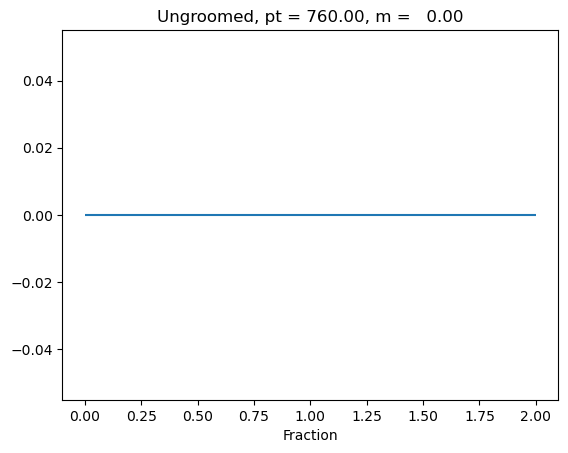

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


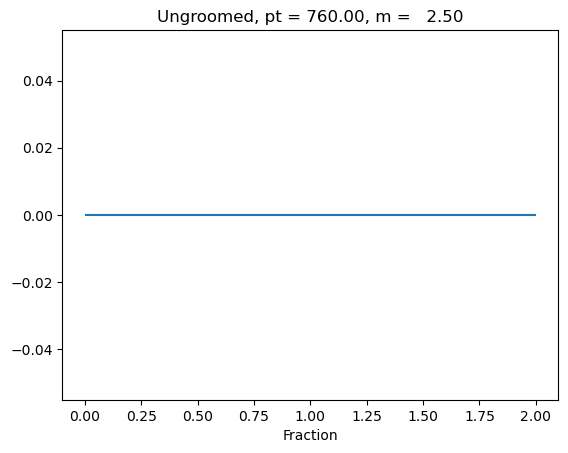

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


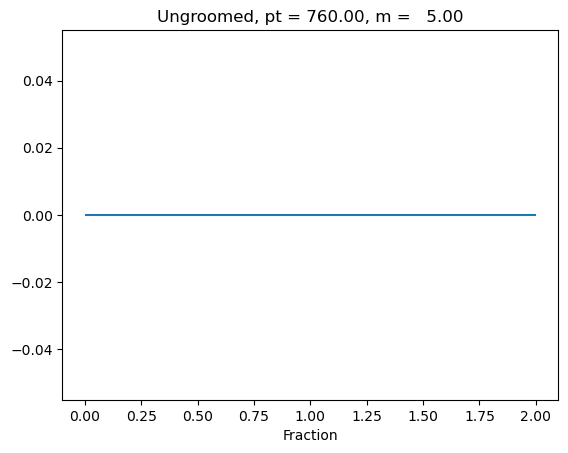

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


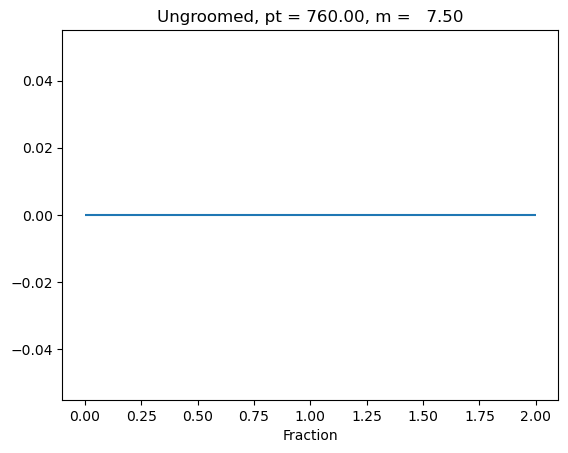

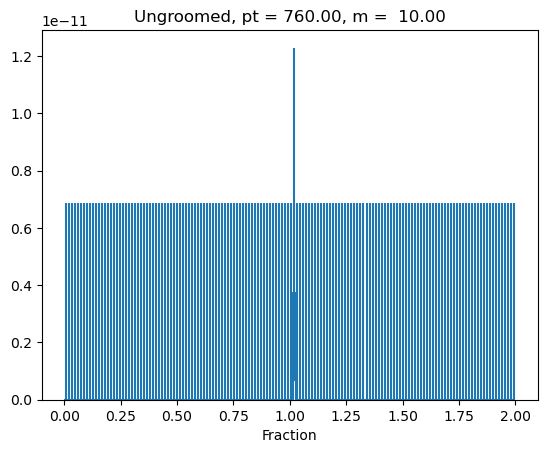

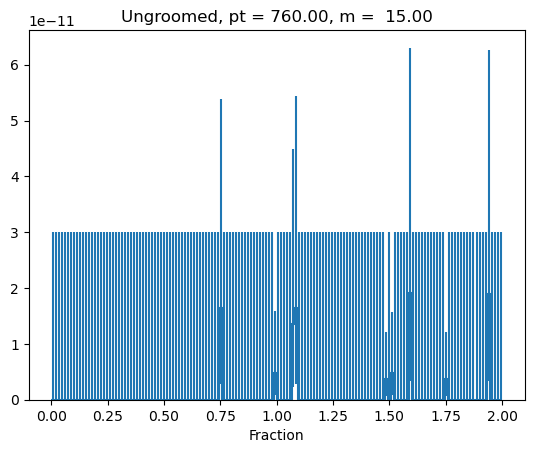

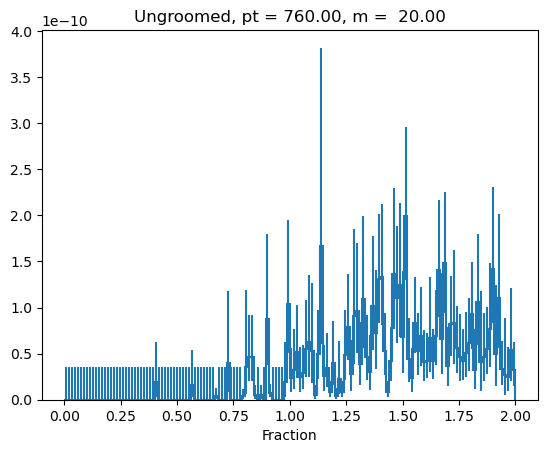

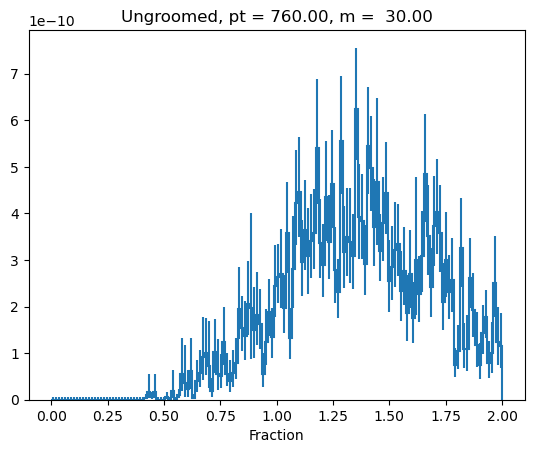

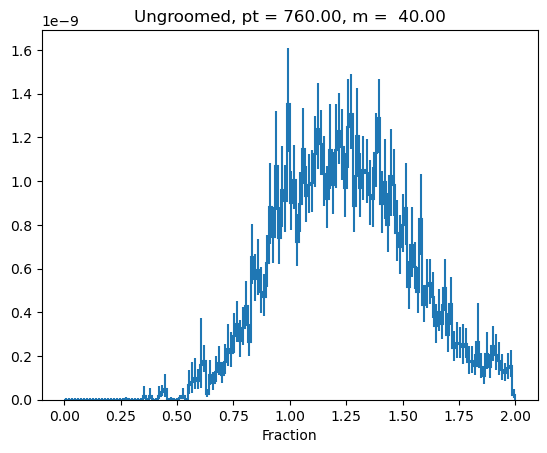

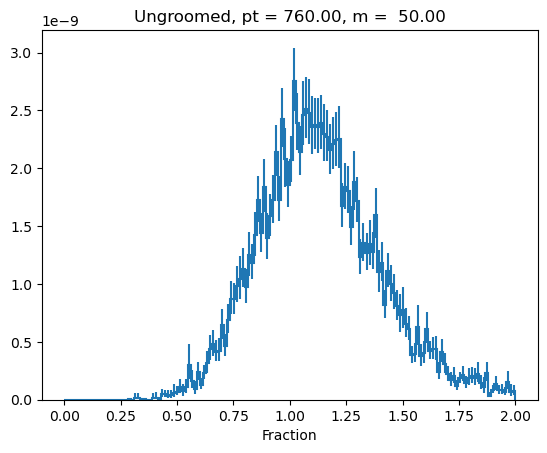

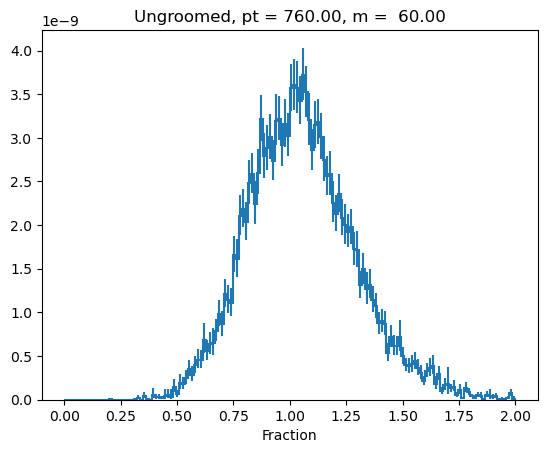

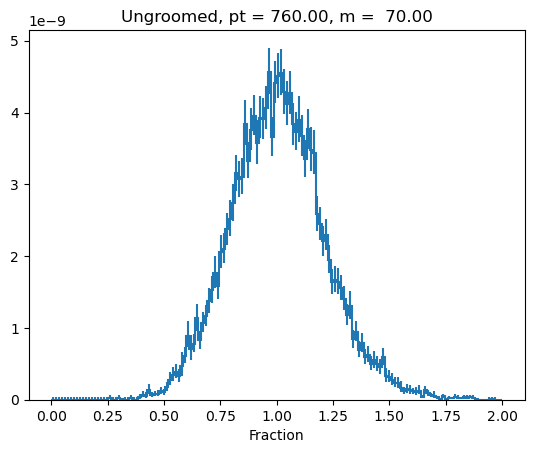

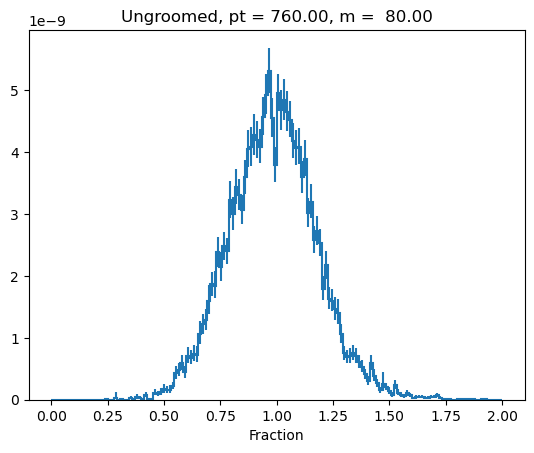

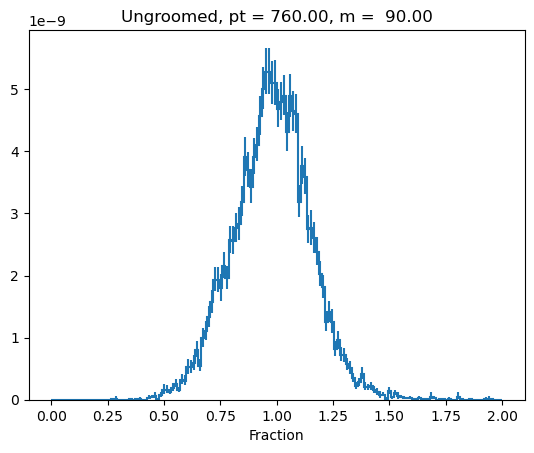

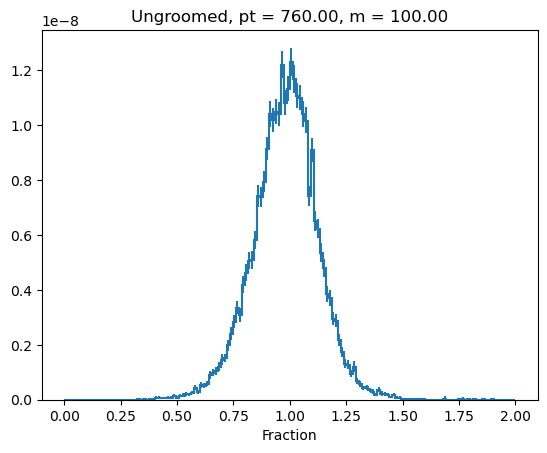

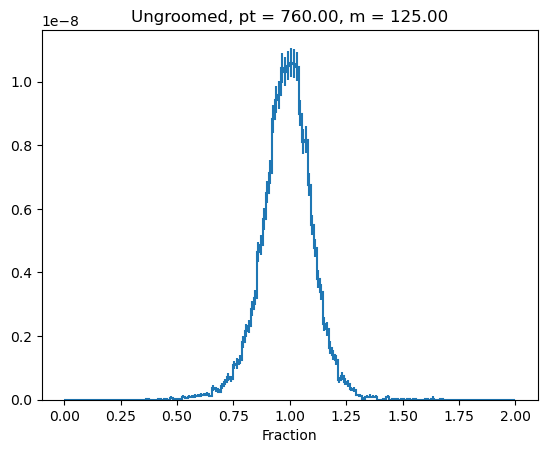

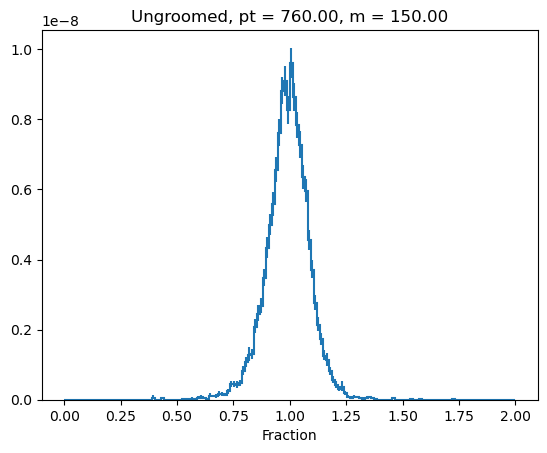

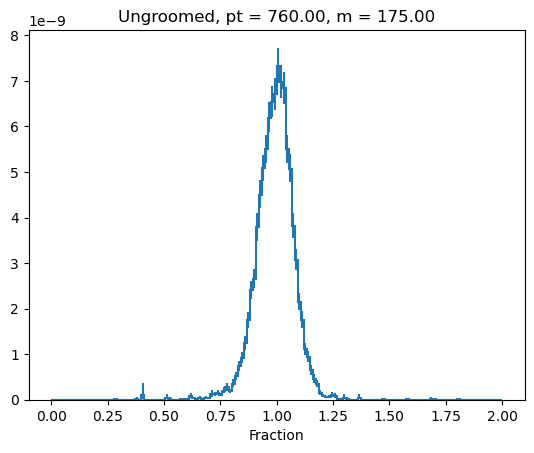

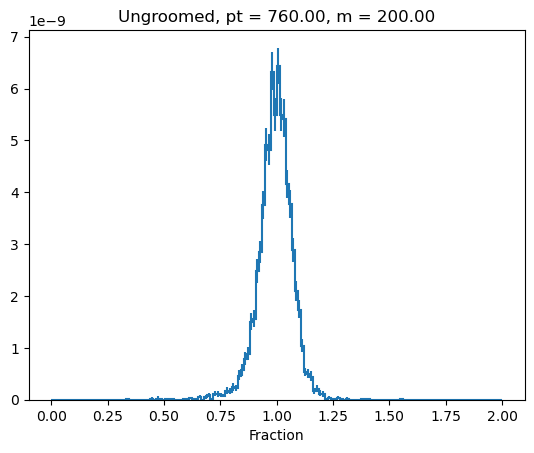

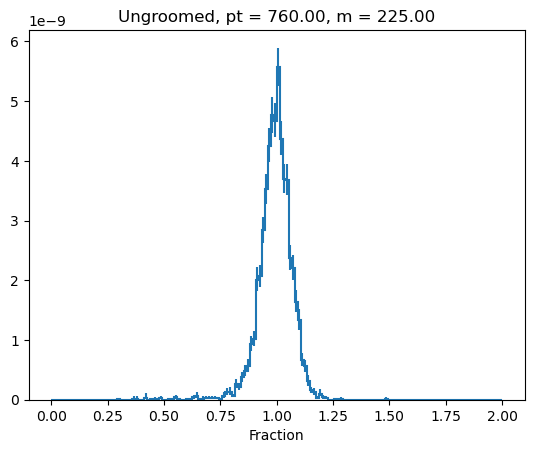

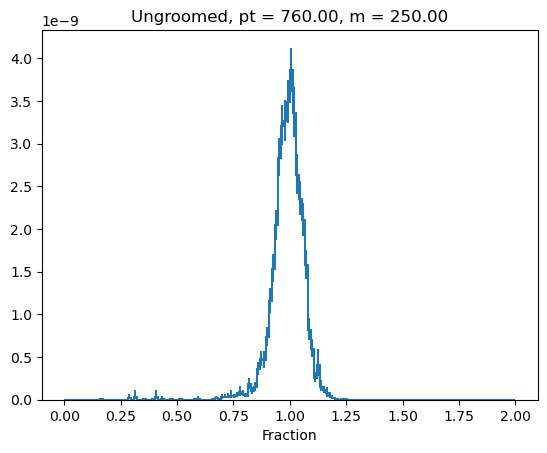

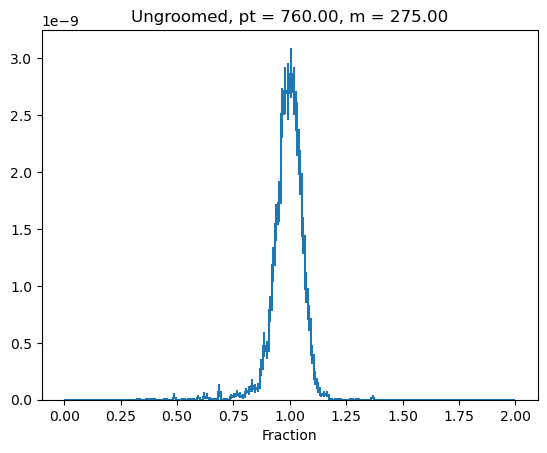

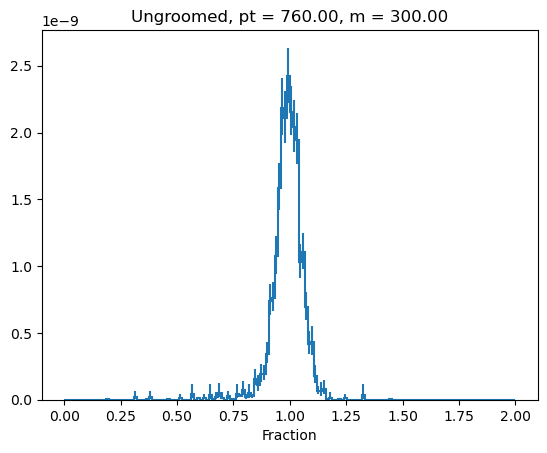

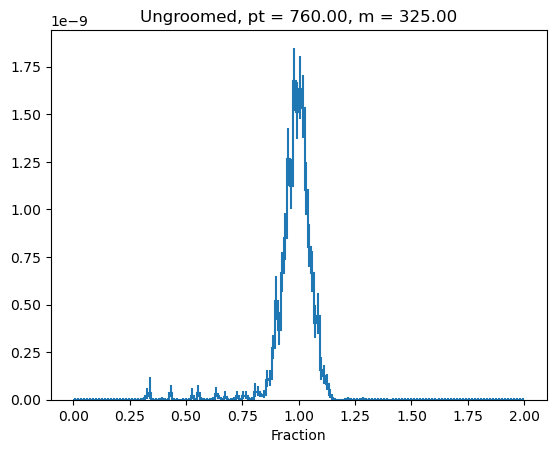

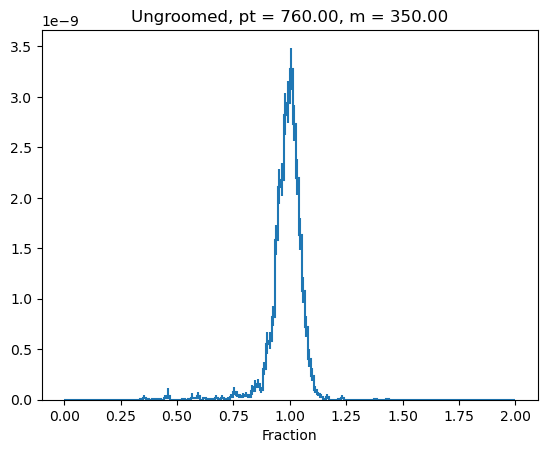

In [48]:
for i in range(nptbins):
    for j in range(nmassbins): 
        resolutions_u[i,j,:].plot()
        plt.title("Ungroomed, pt = %6.2f, m = %6.2f" % (ptvals.value(i), mvals.value(j)) )
        plt.show()